In [1]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 

import numpy as np
from numpy import array, zeros_like
from scipy.ndimage import zoom

import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
from pathlib import Path

from skimage import data
from skimage import color
from skimage import img_as_float
from skimage import exposure
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.transform import rotate
from skimage import io
from scipy.ndimage import rotate as rotate_nd

from PIL import Image

#parallel computing packages
from numba import jit
import psutil
from multiprocess import Pool

#function for showing volume images
def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [2]:
df=pd.read_pickle('/mnt/e/Image Processing/Brats Project/final_pickle.pkl')

## Data Augmentation 

In [3]:
#check for only tumor indexes, to augment only images with tumors
def check_tumor(data, col): 
    indexes = []
    counter=0
    for i,y in enumerate(data.loc[:, col]): 
        if len(np.unique(y)) == 4:
            print(i)
            indexes.append(i)
            counter += 1
    print('All done!The number of images with tumors is {} and number of images without tumor is {}'.format(counter, len(data.index)-counter))
    return indexes




def go_and_augment(data,indexes, col=['X', 'Y'], augmentation = ['hor_flip','vert_flip', 'rotate_10_m10']):
    counter = len(data.index)
    
    for index, image in enumerate(data.loc[:, col[0]]):
        
        if index in indexes:
            
            #augmented_image = np.zeros((240,240,3), dtype='uint8') #empty arrays for augmented image
            #augmented_label = np.zeros((240,240), dtype='uint8') #for labels
            
            if augmentation[0]=='hor_flip':
                augmented_image = image[:, ::-1]
                augmented_label = data.loc[index, col[1]][:, ::-1]
                
                data.at[counter, col[0]] = augmented_image
                data.at[counter, col[1]] = augmented_label
            
                print('{} {} DONE!...images added to {}'.format(index, augmentation[0], counter))
                counter += 1
                
            if augmentation[1]=='vert_flip':
                augmented_image=image[::-1, :]
                augmented_label = data.loc[index, col[1]][::-1, :]
                
                data.at[counter, col[0]] = augmented_image
                data.at[counter, col[1]] = augmented_label
                
                
                print('{} {} DONE!...'.format(index, augmentation[1], counter))
                counter += 1
            
            if augmentation[2]=='rotate_10_m10':
                
                augmented_image=rotate(image, -10)
                augmented_label=rotate(data.loc[index, col[1]], -10)
                
                data.at[counter, col[0]] = augmented_image
                data.at[counter, col[1]] = augmented_label
                counter += 1
                print('{} {} DONE!...'.format(index, augmentation[2], counter))
                
                augmented_image=rotate(image, 10)
                augmented_label=rotate(data.loc[index, col[1]], 10)
                
                data.at[counter, col[0]] = augmented_image
                data.at[counter, col[1]] = augmented_label
                counter += 1
                print('{} {} DONE!...'.format(index, augmentation[2], counter))
            
            
df = df.append(df.iloc[0], ignore_index=True)            
            
            
            
            

In [4]:
ind = check_tumor(df, 'Y') #creating list of indexes to augment

go_and_augment(df, ind) #go and augment, rotations 10 -10, vertical and horizontal flips! images and labels

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
76
77
78
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734


5912
5913
5914
5915
5916
5917
5918
5919
5920
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6437
6438
6439
6440
6441
6442
6443
6444
6445
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468
6469
6470
6471
6472
6473
6474
6475
6476
6477
6478
6552
6553
6554
6555
6556
6557
6559
6560
6561
6562
6563
6564
6565
6566
6567
6568
6569
6570
6571
6572
6573
6574
6575
6576
6577
6578
6579
6580
6581
6582
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609


11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
1231

16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
17367
17368
17369
17370
17371
17372
17373
17374
17375
17376
17377
17378
17379
17380
1738

21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
21635
21636
21637
21638
21639
21640
21641
21642
21643
21644
21645
21646
21647
21648
21649
21650
21651
21652
21653
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
2178

25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
25827
25828
25829
25830
25831
25832
25833
25834
25835
25836
25837
25838
25839
25840
25841
25842
25843
25845
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
26037
26038
26039
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
26050
26051
26052
26053
26054
26055
26056
26057
26058
26059
26060
26061
26062
26063
26064
26065
26066
26067
26068
26069
26070
26071
26072
26073
26074
26075
26076
26077
26078
26079
26080
26081
26082
26083
26084
26085
26086
26087
26088
26089
26090
26181
26182
2618

33358
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33382
33383
33469
33470
33471
33472
33473
33474
33475
33476
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33686
33687
33688
33694
33695
33696
33697
33698
33699
33700
33701
33702
33703
33704
33705
33706
33707
33708
33709
33710
33711
33712
33713
33714
33715
33716
33717
33718
33719
33720
33721
33722
33723
33724
33725
33726
33727
33728
33729
33730
33731
33732
33733
33734
33743
33744
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
34035
34036
34037
34038
34039
34040
34129
34130
34131
34132
34133
34134
34135
34136
34137
34138
34139
34140
34141
34142
34143
34144
34145
3414

65 rotate_10_m10 DONE!...
66 hor_flip DONE!...images added to 37227
66 vert_flip DONE!...
66 rotate_10_m10 DONE!...
66 rotate_10_m10 DONE!...
67 hor_flip DONE!...images added to 37231
67 vert_flip DONE!...
67 rotate_10_m10 DONE!...
67 rotate_10_m10 DONE!...
68 hor_flip DONE!...images added to 37235
68 vert_flip DONE!...
68 rotate_10_m10 DONE!...
68 rotate_10_m10 DONE!...
69 hor_flip DONE!...images added to 37239
69 vert_flip DONE!...
69 rotate_10_m10 DONE!...
69 rotate_10_m10 DONE!...
70 hor_flip DONE!...images added to 37243
70 vert_flip DONE!...
70 rotate_10_m10 DONE!...
70 rotate_10_m10 DONE!...
71 hor_flip DONE!...images added to 37247
71 vert_flip DONE!...
71 rotate_10_m10 DONE!...
71 rotate_10_m10 DONE!...
72 hor_flip DONE!...images added to 37251
72 vert_flip DONE!...
72 rotate_10_m10 DONE!...
72 rotate_10_m10 DONE!...
73 hor_flip DONE!...images added to 37255
73 vert_flip DONE!...
73 rotate_10_m10 DONE!...
73 rotate_10_m10 DONE!...
74 hor_flip DONE!...images added to 37259
74 v

311 rotate_10_m10 DONE!...
312 hor_flip DONE!...images added to 37523
312 vert_flip DONE!...
312 rotate_10_m10 DONE!...
312 rotate_10_m10 DONE!...
313 hor_flip DONE!...images added to 37527
313 vert_flip DONE!...
313 rotate_10_m10 DONE!...
313 rotate_10_m10 DONE!...
314 hor_flip DONE!...images added to 37531
314 vert_flip DONE!...
314 rotate_10_m10 DONE!...
314 rotate_10_m10 DONE!...
315 hor_flip DONE!...images added to 37535
315 vert_flip DONE!...
315 rotate_10_m10 DONE!...
315 rotate_10_m10 DONE!...
316 hor_flip DONE!...images added to 37539
316 vert_flip DONE!...
316 rotate_10_m10 DONE!...
316 rotate_10_m10 DONE!...
317 hor_flip DONE!...images added to 37543
317 vert_flip DONE!...
317 rotate_10_m10 DONE!...
317 rotate_10_m10 DONE!...
318 hor_flip DONE!...images added to 37547
318 vert_flip DONE!...
318 rotate_10_m10 DONE!...
318 rotate_10_m10 DONE!...
319 hor_flip DONE!...images added to 37551
319 vert_flip DONE!...
319 rotate_10_m10 DONE!...
319 rotate_10_m10 DONE!...
320 hor_flip 

555 rotate_10_m10 DONE!...
556 hor_flip DONE!...images added to 37811
556 vert_flip DONE!...
556 rotate_10_m10 DONE!...
556 rotate_10_m10 DONE!...
557 hor_flip DONE!...images added to 37815
557 vert_flip DONE!...
557 rotate_10_m10 DONE!...
557 rotate_10_m10 DONE!...
558 hor_flip DONE!...images added to 37819
558 vert_flip DONE!...
558 rotate_10_m10 DONE!...
558 rotate_10_m10 DONE!...
559 hor_flip DONE!...images added to 37823
559 vert_flip DONE!...
559 rotate_10_m10 DONE!...
559 rotate_10_m10 DONE!...
560 hor_flip DONE!...images added to 37827
560 vert_flip DONE!...
560 rotate_10_m10 DONE!...
560 rotate_10_m10 DONE!...
561 hor_flip DONE!...images added to 37831
561 vert_flip DONE!...
561 rotate_10_m10 DONE!...
561 rotate_10_m10 DONE!...
562 hor_flip DONE!...images added to 37835
562 vert_flip DONE!...
562 rotate_10_m10 DONE!...
562 rotate_10_m10 DONE!...
563 hor_flip DONE!...images added to 37839
563 vert_flip DONE!...
563 rotate_10_m10 DONE!...
563 rotate_10_m10 DONE!...
564 hor_flip 

731 rotate_10_m10 DONE!...
731 rotate_10_m10 DONE!...
732 hor_flip DONE!...images added to 38095
732 vert_flip DONE!...
732 rotate_10_m10 DONE!...
732 rotate_10_m10 DONE!...
733 hor_flip DONE!...images added to 38099
733 vert_flip DONE!...
733 rotate_10_m10 DONE!...
733 rotate_10_m10 DONE!...
734 hor_flip DONE!...images added to 38103
734 vert_flip DONE!...
734 rotate_10_m10 DONE!...
734 rotate_10_m10 DONE!...
735 hor_flip DONE!...images added to 38107
735 vert_flip DONE!...
735 rotate_10_m10 DONE!...
735 rotate_10_m10 DONE!...
736 hor_flip DONE!...images added to 38111
736 vert_flip DONE!...
736 rotate_10_m10 DONE!...
736 rotate_10_m10 DONE!...
737 hor_flip DONE!...images added to 38115
737 vert_flip DONE!...
737 rotate_10_m10 DONE!...
737 rotate_10_m10 DONE!...
738 hor_flip DONE!...images added to 38119
738 vert_flip DONE!...
738 rotate_10_m10 DONE!...
738 rotate_10_m10 DONE!...
739 hor_flip DONE!...images added to 38123
739 vert_flip DONE!...
739 rotate_10_m10 DONE!...
739 rotate_10

976 hor_flip DONE!...images added to 38367
976 vert_flip DONE!...
976 rotate_10_m10 DONE!...
976 rotate_10_m10 DONE!...
977 hor_flip DONE!...images added to 38371
977 vert_flip DONE!...
977 rotate_10_m10 DONE!...
977 rotate_10_m10 DONE!...
978 hor_flip DONE!...images added to 38375
978 vert_flip DONE!...
978 rotate_10_m10 DONE!...
978 rotate_10_m10 DONE!...
979 hor_flip DONE!...images added to 38379
979 vert_flip DONE!...
979 rotate_10_m10 DONE!...
979 rotate_10_m10 DONE!...
980 hor_flip DONE!...images added to 38383
980 vert_flip DONE!...
980 rotate_10_m10 DONE!...
980 rotate_10_m10 DONE!...
981 hor_flip DONE!...images added to 38387
981 vert_flip DONE!...
981 rotate_10_m10 DONE!...
981 rotate_10_m10 DONE!...
982 hor_flip DONE!...images added to 38391
982 vert_flip DONE!...
982 rotate_10_m10 DONE!...
982 rotate_10_m10 DONE!...
983 hor_flip DONE!...images added to 38395
983 vert_flip DONE!...
983 rotate_10_m10 DONE!...
983 rotate_10_m10 DONE!...
984 hor_flip DONE!...images added to 383

1125 rotate_10_m10 DONE!...
1125 rotate_10_m10 DONE!...
1126 hor_flip DONE!...images added to 38647
1126 vert_flip DONE!...
1126 rotate_10_m10 DONE!...
1126 rotate_10_m10 DONE!...
1127 hor_flip DONE!...images added to 38651
1127 vert_flip DONE!...
1127 rotate_10_m10 DONE!...
1127 rotate_10_m10 DONE!...
1128 hor_flip DONE!...images added to 38655
1128 vert_flip DONE!...
1128 rotate_10_m10 DONE!...
1128 rotate_10_m10 DONE!...
1129 hor_flip DONE!...images added to 38659
1129 vert_flip DONE!...
1129 rotate_10_m10 DONE!...
1129 rotate_10_m10 DONE!...
1130 hor_flip DONE!...images added to 38663
1130 vert_flip DONE!...
1130 rotate_10_m10 DONE!...
1130 rotate_10_m10 DONE!...
1131 hor_flip DONE!...images added to 38667
1131 vert_flip DONE!...
1131 rotate_10_m10 DONE!...
1131 rotate_10_m10 DONE!...
1132 hor_flip DONE!...images added to 38671
1132 vert_flip DONE!...
1132 rotate_10_m10 DONE!...
1132 rotate_10_m10 DONE!...
1133 hor_flip DONE!...images added to 38675
1133 vert_flip DONE!...
1133 rot

1261 vert_flip DONE!...
1261 rotate_10_m10 DONE!...
1261 rotate_10_m10 DONE!...
1262 hor_flip DONE!...images added to 38915
1262 vert_flip DONE!...
1262 rotate_10_m10 DONE!...
1262 rotate_10_m10 DONE!...
1263 hor_flip DONE!...images added to 38919
1263 vert_flip DONE!...
1263 rotate_10_m10 DONE!...
1263 rotate_10_m10 DONE!...
1264 hor_flip DONE!...images added to 38923
1264 vert_flip DONE!...
1264 rotate_10_m10 DONE!...
1264 rotate_10_m10 DONE!...
1326 hor_flip DONE!...images added to 38927
1326 vert_flip DONE!...
1326 rotate_10_m10 DONE!...
1326 rotate_10_m10 DONE!...
1327 hor_flip DONE!...images added to 38931
1327 vert_flip DONE!...
1327 rotate_10_m10 DONE!...
1327 rotate_10_m10 DONE!...
1328 hor_flip DONE!...images added to 38935
1328 vert_flip DONE!...
1328 rotate_10_m10 DONE!...
1328 rotate_10_m10 DONE!...
1329 hor_flip DONE!...images added to 38939
1329 vert_flip DONE!...
1329 rotate_10_m10 DONE!...
1329 rotate_10_m10 DONE!...
1330 hor_flip DONE!...images added to 38943
1330 ver

1467 hor_flip DONE!...images added to 39179
1467 vert_flip DONE!...
1467 rotate_10_m10 DONE!...
1467 rotate_10_m10 DONE!...
1468 hor_flip DONE!...images added to 39183
1468 vert_flip DONE!...
1468 rotate_10_m10 DONE!...
1468 rotate_10_m10 DONE!...
1469 hor_flip DONE!...images added to 39187
1469 vert_flip DONE!...
1469 rotate_10_m10 DONE!...
1469 rotate_10_m10 DONE!...
1470 hor_flip DONE!...images added to 39191
1470 vert_flip DONE!...
1470 rotate_10_m10 DONE!...
1470 rotate_10_m10 DONE!...
1471 hor_flip DONE!...images added to 39195
1471 vert_flip DONE!...
1471 rotate_10_m10 DONE!...
1471 rotate_10_m10 DONE!...
1472 hor_flip DONE!...images added to 39199
1472 vert_flip DONE!...
1472 rotate_10_m10 DONE!...
1472 rotate_10_m10 DONE!...
1473 hor_flip DONE!...images added to 39203
1473 vert_flip DONE!...
1473 rotate_10_m10 DONE!...
1473 rotate_10_m10 DONE!...
1474 hor_flip DONE!...images added to 39207
1474 vert_flip DONE!...
1474 rotate_10_m10 DONE!...
1474 rotate_10_m10 DONE!...
1475 hor

1643 rotate_10_m10 DONE!...
1644 hor_flip DONE!...images added to 39447
1644 vert_flip DONE!...
1644 rotate_10_m10 DONE!...
1644 rotate_10_m10 DONE!...
1645 hor_flip DONE!...images added to 39451
1645 vert_flip DONE!...
1645 rotate_10_m10 DONE!...
1645 rotate_10_m10 DONE!...
1646 hor_flip DONE!...images added to 39455
1646 vert_flip DONE!...
1646 rotate_10_m10 DONE!...
1646 rotate_10_m10 DONE!...
1647 hor_flip DONE!...images added to 39459
1647 vert_flip DONE!...
1647 rotate_10_m10 DONE!...
1647 rotate_10_m10 DONE!...
1648 hor_flip DONE!...images added to 39463
1648 vert_flip DONE!...
1648 rotate_10_m10 DONE!...
1648 rotate_10_m10 DONE!...
1649 hor_flip DONE!...images added to 39467
1649 vert_flip DONE!...
1649 rotate_10_m10 DONE!...
1649 rotate_10_m10 DONE!...
1650 hor_flip DONE!...images added to 39471
1650 vert_flip DONE!...
1650 rotate_10_m10 DONE!...
1650 rotate_10_m10 DONE!...
1651 hor_flip DONE!...images added to 39475
1651 vert_flip DONE!...
1651 rotate_10_m10 DONE!...
1651 rot

1865 hor_flip DONE!...images added to 39715
1865 vert_flip DONE!...
1865 rotate_10_m10 DONE!...
1865 rotate_10_m10 DONE!...
1866 hor_flip DONE!...images added to 39719
1866 vert_flip DONE!...
1866 rotate_10_m10 DONE!...
1866 rotate_10_m10 DONE!...
1867 hor_flip DONE!...images added to 39723
1867 vert_flip DONE!...
1867 rotate_10_m10 DONE!...
1867 rotate_10_m10 DONE!...
1868 hor_flip DONE!...images added to 39727
1868 vert_flip DONE!...
1868 rotate_10_m10 DONE!...
1868 rotate_10_m10 DONE!...
1869 hor_flip DONE!...images added to 39731
1869 vert_flip DONE!...
1869 rotate_10_m10 DONE!...
1869 rotate_10_m10 DONE!...
1870 hor_flip DONE!...images added to 39735
1870 vert_flip DONE!...
1870 rotate_10_m10 DONE!...
1870 rotate_10_m10 DONE!...
1871 hor_flip DONE!...images added to 39739
1871 vert_flip DONE!...
1871 rotate_10_m10 DONE!...
1871 rotate_10_m10 DONE!...
1872 hor_flip DONE!...images added to 39743
1872 vert_flip DONE!...
1872 rotate_10_m10 DONE!...
1872 rotate_10_m10 DONE!...
1873 hor

2124 rotate_10_m10 DONE!...
2124 rotate_10_m10 DONE!...
2125 hor_flip DONE!...images added to 39987
2125 vert_flip DONE!...
2125 rotate_10_m10 DONE!...
2125 rotate_10_m10 DONE!...
2126 hor_flip DONE!...images added to 39991
2126 vert_flip DONE!...
2126 rotate_10_m10 DONE!...
2126 rotate_10_m10 DONE!...
2127 hor_flip DONE!...images added to 39995
2127 vert_flip DONE!...
2127 rotate_10_m10 DONE!...
2127 rotate_10_m10 DONE!...
2128 hor_flip DONE!...images added to 39999
2128 vert_flip DONE!...
2128 rotate_10_m10 DONE!...
2128 rotate_10_m10 DONE!...
2129 hor_flip DONE!...images added to 40003
2129 vert_flip DONE!...
2129 rotate_10_m10 DONE!...
2129 rotate_10_m10 DONE!...
2130 hor_flip DONE!...images added to 40007
2130 vert_flip DONE!...
2130 rotate_10_m10 DONE!...
2130 rotate_10_m10 DONE!...
2131 hor_flip DONE!...images added to 40011
2131 vert_flip DONE!...
2131 rotate_10_m10 DONE!...
2131 rotate_10_m10 DONE!...
2132 hor_flip DONE!...images added to 40015
2132 vert_flip DONE!...
2132 rot

2295 hor_flip DONE!...images added to 40259
2295 vert_flip DONE!...
2295 rotate_10_m10 DONE!...
2295 rotate_10_m10 DONE!...
2296 hor_flip DONE!...images added to 40263
2296 vert_flip DONE!...
2296 rotate_10_m10 DONE!...
2296 rotate_10_m10 DONE!...
2297 hor_flip DONE!...images added to 40267
2297 vert_flip DONE!...
2297 rotate_10_m10 DONE!...
2297 rotate_10_m10 DONE!...
2298 hor_flip DONE!...images added to 40271
2298 vert_flip DONE!...
2298 rotate_10_m10 DONE!...
2298 rotate_10_m10 DONE!...
2299 hor_flip DONE!...images added to 40275
2299 vert_flip DONE!...
2299 rotate_10_m10 DONE!...
2299 rotate_10_m10 DONE!...
2300 hor_flip DONE!...images added to 40279
2300 vert_flip DONE!...
2300 rotate_10_m10 DONE!...
2300 rotate_10_m10 DONE!...
2301 hor_flip DONE!...images added to 40283
2301 vert_flip DONE!...
2301 rotate_10_m10 DONE!...
2301 rotate_10_m10 DONE!...
2302 hor_flip DONE!...images added to 40287
2302 vert_flip DONE!...
2302 rotate_10_m10 DONE!...
2302 rotate_10_m10 DONE!...
2303 hor

2445 rotate_10_m10 DONE!...
2445 rotate_10_m10 DONE!...
2446 hor_flip DONE!...images added to 40531
2446 vert_flip DONE!...
2446 rotate_10_m10 DONE!...
2446 rotate_10_m10 DONE!...
2447 hor_flip DONE!...images added to 40535
2447 vert_flip DONE!...
2447 rotate_10_m10 DONE!...
2447 rotate_10_m10 DONE!...
2448 hor_flip DONE!...images added to 40539
2448 vert_flip DONE!...
2448 rotate_10_m10 DONE!...
2448 rotate_10_m10 DONE!...
2449 hor_flip DONE!...images added to 40543
2449 vert_flip DONE!...
2449 rotate_10_m10 DONE!...
2449 rotate_10_m10 DONE!...
2450 hor_flip DONE!...images added to 40547
2450 vert_flip DONE!...
2450 rotate_10_m10 DONE!...
2450 rotate_10_m10 DONE!...
2451 hor_flip DONE!...images added to 40551
2451 vert_flip DONE!...
2451 rotate_10_m10 DONE!...
2451 rotate_10_m10 DONE!...
2452 hor_flip DONE!...images added to 40555
2452 vert_flip DONE!...
2452 rotate_10_m10 DONE!...
2452 rotate_10_m10 DONE!...
2453 hor_flip DONE!...images added to 40559
2453 vert_flip DONE!...
2453 rot

2640 rotate_10_m10 DONE!...
2640 rotate_10_m10 DONE!...
2641 hor_flip DONE!...images added to 40811
2641 vert_flip DONE!...
2641 rotate_10_m10 DONE!...
2641 rotate_10_m10 DONE!...
2642 hor_flip DONE!...images added to 40815
2642 vert_flip DONE!...
2642 rotate_10_m10 DONE!...
2642 rotate_10_m10 DONE!...
2643 hor_flip DONE!...images added to 40819
2643 vert_flip DONE!...
2643 rotate_10_m10 DONE!...
2643 rotate_10_m10 DONE!...
2644 hor_flip DONE!...images added to 40823
2644 vert_flip DONE!...
2644 rotate_10_m10 DONE!...
2644 rotate_10_m10 DONE!...
2645 hor_flip DONE!...images added to 40827
2645 vert_flip DONE!...
2645 rotate_10_m10 DONE!...
2645 rotate_10_m10 DONE!...
2646 hor_flip DONE!...images added to 40831
2646 vert_flip DONE!...
2646 rotate_10_m10 DONE!...
2646 rotate_10_m10 DONE!...
2647 hor_flip DONE!...images added to 40835
2647 vert_flip DONE!...
2647 rotate_10_m10 DONE!...
2647 rotate_10_m10 DONE!...
2648 hor_flip DONE!...images added to 40839
2648 vert_flip DONE!...
2648 rot

2916 rotate_10_m10 DONE!...
2917 hor_flip DONE!...images added to 41075
2917 vert_flip DONE!...
2917 rotate_10_m10 DONE!...
2917 rotate_10_m10 DONE!...
2918 hor_flip DONE!...images added to 41079
2918 vert_flip DONE!...
2918 rotate_10_m10 DONE!...
2918 rotate_10_m10 DONE!...
2919 hor_flip DONE!...images added to 41083
2919 vert_flip DONE!...
2919 rotate_10_m10 DONE!...
2919 rotate_10_m10 DONE!...
2920 hor_flip DONE!...images added to 41087
2920 vert_flip DONE!...
2920 rotate_10_m10 DONE!...
2920 rotate_10_m10 DONE!...
2921 hor_flip DONE!...images added to 41091
2921 vert_flip DONE!...
2921 rotate_10_m10 DONE!...
2921 rotate_10_m10 DONE!...
2922 hor_flip DONE!...images added to 41095
2922 vert_flip DONE!...
2922 rotate_10_m10 DONE!...
2922 rotate_10_m10 DONE!...
2923 hor_flip DONE!...images added to 41099
2923 vert_flip DONE!...
2923 rotate_10_m10 DONE!...
2923 rotate_10_m10 DONE!...
2924 hor_flip DONE!...images added to 41103
2924 vert_flip DONE!...
2924 rotate_10_m10 DONE!...
2924 rot

3211 vert_flip DONE!...
3211 rotate_10_m10 DONE!...
3211 rotate_10_m10 DONE!...
3212 hor_flip DONE!...images added to 41359
3212 vert_flip DONE!...
3212 rotate_10_m10 DONE!...
3212 rotate_10_m10 DONE!...
3213 hor_flip DONE!...images added to 41363
3213 vert_flip DONE!...
3213 rotate_10_m10 DONE!...
3213 rotate_10_m10 DONE!...
3214 hor_flip DONE!...images added to 41367
3214 vert_flip DONE!...
3214 rotate_10_m10 DONE!...
3214 rotate_10_m10 DONE!...
3215 hor_flip DONE!...images added to 41371
3215 vert_flip DONE!...
3215 rotate_10_m10 DONE!...
3215 rotate_10_m10 DONE!...
3216 hor_flip DONE!...images added to 41375
3216 vert_flip DONE!...
3216 rotate_10_m10 DONE!...
3216 rotate_10_m10 DONE!...
3217 hor_flip DONE!...images added to 41379
3217 vert_flip DONE!...
3217 rotate_10_m10 DONE!...
3217 rotate_10_m10 DONE!...
3218 hor_flip DONE!...images added to 41383
3218 vert_flip DONE!...
3218 rotate_10_m10 DONE!...
3218 rotate_10_m10 DONE!...
3219 hor_flip DONE!...images added to 41387
3219 ver

3358 rotate_10_m10 DONE!...
3358 rotate_10_m10 DONE!...
3359 hor_flip DONE!...images added to 41635
3359 vert_flip DONE!...
3359 rotate_10_m10 DONE!...
3359 rotate_10_m10 DONE!...
3360 hor_flip DONE!...images added to 41639
3360 vert_flip DONE!...
3360 rotate_10_m10 DONE!...
3360 rotate_10_m10 DONE!...
3361 hor_flip DONE!...images added to 41643
3361 vert_flip DONE!...
3361 rotate_10_m10 DONE!...
3361 rotate_10_m10 DONE!...
3411 hor_flip DONE!...images added to 41647
3411 vert_flip DONE!...
3411 rotate_10_m10 DONE!...
3411 rotate_10_m10 DONE!...
3412 hor_flip DONE!...images added to 41651
3412 vert_flip DONE!...
3412 rotate_10_m10 DONE!...
3412 rotate_10_m10 DONE!...
3414 hor_flip DONE!...images added to 41655
3414 vert_flip DONE!...
3414 rotate_10_m10 DONE!...
3414 rotate_10_m10 DONE!...
3415 hor_flip DONE!...images added to 41659
3415 vert_flip DONE!...
3415 rotate_10_m10 DONE!...
3415 rotate_10_m10 DONE!...
3416 hor_flip DONE!...images added to 41663
3416 vert_flip DONE!...
3416 rot

3693 rotate_10_m10 DONE!...
3694 hor_flip DONE!...images added to 41899
3694 vert_flip DONE!...
3694 rotate_10_m10 DONE!...
3694 rotate_10_m10 DONE!...
3695 hor_flip DONE!...images added to 41903
3695 vert_flip DONE!...
3695 rotate_10_m10 DONE!...
3695 rotate_10_m10 DONE!...
3696 hor_flip DONE!...images added to 41907
3696 vert_flip DONE!...
3696 rotate_10_m10 DONE!...
3696 rotate_10_m10 DONE!...
3697 hor_flip DONE!...images added to 41911
3697 vert_flip DONE!...
3697 rotate_10_m10 DONE!...
3697 rotate_10_m10 DONE!...
3698 hor_flip DONE!...images added to 41915
3698 vert_flip DONE!...
3698 rotate_10_m10 DONE!...
3698 rotate_10_m10 DONE!...
3699 hor_flip DONE!...images added to 41919
3699 vert_flip DONE!...
3699 rotate_10_m10 DONE!...
3699 rotate_10_m10 DONE!...
3700 hor_flip DONE!...images added to 41923
3700 vert_flip DONE!...
3700 rotate_10_m10 DONE!...
3700 rotate_10_m10 DONE!...
3701 hor_flip DONE!...images added to 41927
3701 vert_flip DONE!...
3701 rotate_10_m10 DONE!...
3701 rot

3965 rotate_10_m10 DONE!...
3966 hor_flip DONE!...images added to 42167
3966 vert_flip DONE!...
3966 rotate_10_m10 DONE!...
3966 rotate_10_m10 DONE!...
3967 hor_flip DONE!...images added to 42171
3967 vert_flip DONE!...
3967 rotate_10_m10 DONE!...
3967 rotate_10_m10 DONE!...
3968 hor_flip DONE!...images added to 42175
3968 vert_flip DONE!...
3968 rotate_10_m10 DONE!...
3968 rotate_10_m10 DONE!...
3969 hor_flip DONE!...images added to 42179
3969 vert_flip DONE!...
3969 rotate_10_m10 DONE!...
3969 rotate_10_m10 DONE!...
3970 hor_flip DONE!...images added to 42183
3970 vert_flip DONE!...
3970 rotate_10_m10 DONE!...
3970 rotate_10_m10 DONE!...
3971 hor_flip DONE!...images added to 42187
3971 vert_flip DONE!...
3971 rotate_10_m10 DONE!...
3971 rotate_10_m10 DONE!...
3972 hor_flip DONE!...images added to 42191
3972 vert_flip DONE!...
3972 rotate_10_m10 DONE!...
3972 rotate_10_m10 DONE!...
3973 hor_flip DONE!...images added to 42195
3973 vert_flip DONE!...
3973 rotate_10_m10 DONE!...
3973 rot

4243 rotate_10_m10 DONE!...
4243 rotate_10_m10 DONE!...
4244 hor_flip DONE!...images added to 42451
4244 vert_flip DONE!...
4244 rotate_10_m10 DONE!...
4244 rotate_10_m10 DONE!...
4245 hor_flip DONE!...images added to 42455
4245 vert_flip DONE!...
4245 rotate_10_m10 DONE!...
4245 rotate_10_m10 DONE!...
4246 hor_flip DONE!...images added to 42459
4246 vert_flip DONE!...
4246 rotate_10_m10 DONE!...
4246 rotate_10_m10 DONE!...
4247 hor_flip DONE!...images added to 42463
4247 vert_flip DONE!...
4247 rotate_10_m10 DONE!...
4247 rotate_10_m10 DONE!...
4248 hor_flip DONE!...images added to 42467
4248 vert_flip DONE!...
4248 rotate_10_m10 DONE!...
4248 rotate_10_m10 DONE!...
4311 hor_flip DONE!...images added to 42471
4311 vert_flip DONE!...
4311 rotate_10_m10 DONE!...
4311 rotate_10_m10 DONE!...
4312 hor_flip DONE!...images added to 42475
4312 vert_flip DONE!...
4312 rotate_10_m10 DONE!...
4312 rotate_10_m10 DONE!...
4313 hor_flip DONE!...images added to 42479
4313 vert_flip DONE!...
4313 rot

4489 rotate_10_m10 DONE!...
4490 hor_flip DONE!...images added to 42727
4490 vert_flip DONE!...
4490 rotate_10_m10 DONE!...
4490 rotate_10_m10 DONE!...
4491 hor_flip DONE!...images added to 42731
4491 vert_flip DONE!...
4491 rotate_10_m10 DONE!...
4491 rotate_10_m10 DONE!...
4492 hor_flip DONE!...images added to 42735
4492 vert_flip DONE!...
4492 rotate_10_m10 DONE!...
4492 rotate_10_m10 DONE!...
4493 hor_flip DONE!...images added to 42739
4493 vert_flip DONE!...
4493 rotate_10_m10 DONE!...
4493 rotate_10_m10 DONE!...
4494 hor_flip DONE!...images added to 42743
4494 vert_flip DONE!...
4494 rotate_10_m10 DONE!...
4494 rotate_10_m10 DONE!...
4495 hor_flip DONE!...images added to 42747
4495 vert_flip DONE!...
4495 rotate_10_m10 DONE!...
4495 rotate_10_m10 DONE!...
4496 hor_flip DONE!...images added to 42751
4496 vert_flip DONE!...
4496 rotate_10_m10 DONE!...
4496 rotate_10_m10 DONE!...
4618 hor_flip DONE!...images added to 42755
4618 vert_flip DONE!...
4618 rotate_10_m10 DONE!...
4618 rot

4751 rotate_10_m10 DONE!...
4751 rotate_10_m10 DONE!...
4752 hor_flip DONE!...images added to 43011
4752 vert_flip DONE!...
4752 rotate_10_m10 DONE!...
4752 rotate_10_m10 DONE!...
4753 hor_flip DONE!...images added to 43015
4753 vert_flip DONE!...
4753 rotate_10_m10 DONE!...
4753 rotate_10_m10 DONE!...
4754 hor_flip DONE!...images added to 43019
4754 vert_flip DONE!...
4754 rotate_10_m10 DONE!...
4754 rotate_10_m10 DONE!...
4755 hor_flip DONE!...images added to 43023
4755 vert_flip DONE!...
4755 rotate_10_m10 DONE!...
4755 rotate_10_m10 DONE!...
4869 hor_flip DONE!...images added to 43027
4869 vert_flip DONE!...
4869 rotate_10_m10 DONE!...
4869 rotate_10_m10 DONE!...
4870 hor_flip DONE!...images added to 43031
4870 vert_flip DONE!...
4870 rotate_10_m10 DONE!...
4870 rotate_10_m10 DONE!...
4871 hor_flip DONE!...images added to 43035
4871 vert_flip DONE!...
4871 rotate_10_m10 DONE!...
4871 rotate_10_m10 DONE!...
4872 hor_flip DONE!...images added to 43039
4872 vert_flip DONE!...
4872 rot

5102 rotate_10_m10 DONE!...
5103 hor_flip DONE!...images added to 43279
5103 vert_flip DONE!...
5103 rotate_10_m10 DONE!...
5103 rotate_10_m10 DONE!...
5104 hor_flip DONE!...images added to 43283
5104 vert_flip DONE!...
5104 rotate_10_m10 DONE!...
5104 rotate_10_m10 DONE!...
5105 hor_flip DONE!...images added to 43287
5105 vert_flip DONE!...
5105 rotate_10_m10 DONE!...
5105 rotate_10_m10 DONE!...
5106 hor_flip DONE!...images added to 43291
5106 vert_flip DONE!...
5106 rotate_10_m10 DONE!...
5106 rotate_10_m10 DONE!...
5107 hor_flip DONE!...images added to 43295
5107 vert_flip DONE!...
5107 rotate_10_m10 DONE!...
5107 rotate_10_m10 DONE!...
5108 hor_flip DONE!...images added to 43299
5108 vert_flip DONE!...
5108 rotate_10_m10 DONE!...
5108 rotate_10_m10 DONE!...
5109 hor_flip DONE!...images added to 43303
5109 vert_flip DONE!...
5109 rotate_10_m10 DONE!...
5109 rotate_10_m10 DONE!...
5110 hor_flip DONE!...images added to 43307
5110 vert_flip DONE!...
5110 rotate_10_m10 DONE!...
5110 rot

5405 hor_flip DONE!...images added to 43559
5405 vert_flip DONE!...
5405 rotate_10_m10 DONE!...
5405 rotate_10_m10 DONE!...
5406 hor_flip DONE!...images added to 43563
5406 vert_flip DONE!...
5406 rotate_10_m10 DONE!...
5406 rotate_10_m10 DONE!...
5407 hor_flip DONE!...images added to 43567
5407 vert_flip DONE!...
5407 rotate_10_m10 DONE!...
5407 rotate_10_m10 DONE!...
5408 hor_flip DONE!...images added to 43571
5408 vert_flip DONE!...
5408 rotate_10_m10 DONE!...
5408 rotate_10_m10 DONE!...
5409 hor_flip DONE!...images added to 43575
5409 vert_flip DONE!...
5409 rotate_10_m10 DONE!...
5409 rotate_10_m10 DONE!...
5410 hor_flip DONE!...images added to 43579
5410 vert_flip DONE!...
5410 rotate_10_m10 DONE!...
5410 rotate_10_m10 DONE!...
5411 hor_flip DONE!...images added to 43583
5411 vert_flip DONE!...
5411 rotate_10_m10 DONE!...
5411 rotate_10_m10 DONE!...
5412 hor_flip DONE!...images added to 43587
5412 vert_flip DONE!...
5412 rotate_10_m10 DONE!...
5412 rotate_10_m10 DONE!...
5413 hor

5625 rotate_10_m10 DONE!...
5625 rotate_10_m10 DONE!...
5626 hor_flip DONE!...images added to 43843
5626 vert_flip DONE!...
5626 rotate_10_m10 DONE!...
5626 rotate_10_m10 DONE!...
5627 hor_flip DONE!...images added to 43847
5627 vert_flip DONE!...
5627 rotate_10_m10 DONE!...
5627 rotate_10_m10 DONE!...
5628 hor_flip DONE!...images added to 43851
5628 vert_flip DONE!...
5628 rotate_10_m10 DONE!...
5628 rotate_10_m10 DONE!...
5629 hor_flip DONE!...images added to 43855
5629 vert_flip DONE!...
5629 rotate_10_m10 DONE!...
5629 rotate_10_m10 DONE!...
5630 hor_flip DONE!...images added to 43859
5630 vert_flip DONE!...
5630 rotate_10_m10 DONE!...
5630 rotate_10_m10 DONE!...
5631 hor_flip DONE!...images added to 43863
5631 vert_flip DONE!...
5631 rotate_10_m10 DONE!...
5631 rotate_10_m10 DONE!...
5632 hor_flip DONE!...images added to 43867
5632 vert_flip DONE!...
5632 rotate_10_m10 DONE!...
5632 rotate_10_m10 DONE!...
5633 hor_flip DONE!...images added to 43871
5633 vert_flip DONE!...
5633 rot

5804 rotate_10_m10 DONE!...
5804 rotate_10_m10 DONE!...
5805 hor_flip DONE!...images added to 44111
5805 vert_flip DONE!...
5805 rotate_10_m10 DONE!...
5805 rotate_10_m10 DONE!...
5806 hor_flip DONE!...images added to 44115
5806 vert_flip DONE!...
5806 rotate_10_m10 DONE!...
5806 rotate_10_m10 DONE!...
5807 hor_flip DONE!...images added to 44119
5807 vert_flip DONE!...
5807 rotate_10_m10 DONE!...
5807 rotate_10_m10 DONE!...
5808 hor_flip DONE!...images added to 44123
5808 vert_flip DONE!...
5808 rotate_10_m10 DONE!...
5808 rotate_10_m10 DONE!...
5809 hor_flip DONE!...images added to 44127
5809 vert_flip DONE!...
5809 rotate_10_m10 DONE!...
5809 rotate_10_m10 DONE!...
5810 hor_flip DONE!...images added to 44131
5810 vert_flip DONE!...
5810 rotate_10_m10 DONE!...
5810 rotate_10_m10 DONE!...
5811 hor_flip DONE!...images added to 44135
5811 vert_flip DONE!...
5811 rotate_10_m10 DONE!...
5811 rotate_10_m10 DONE!...
5812 hor_flip DONE!...images added to 44139
5812 vert_flip DONE!...
5812 rot

5909 vert_flip DONE!...
5909 rotate_10_m10 DONE!...
5909 rotate_10_m10 DONE!...
5910 hor_flip DONE!...images added to 44387
5910 vert_flip DONE!...
5910 rotate_10_m10 DONE!...
5910 rotate_10_m10 DONE!...
5911 hor_flip DONE!...images added to 44391
5911 vert_flip DONE!...
5911 rotate_10_m10 DONE!...
5911 rotate_10_m10 DONE!...
5912 hor_flip DONE!...images added to 44395
5912 vert_flip DONE!...
5912 rotate_10_m10 DONE!...
5912 rotate_10_m10 DONE!...
5913 hor_flip DONE!...images added to 44399
5913 vert_flip DONE!...
5913 rotate_10_m10 DONE!...
5913 rotate_10_m10 DONE!...
5914 hor_flip DONE!...images added to 44403
5914 vert_flip DONE!...
5914 rotate_10_m10 DONE!...
5914 rotate_10_m10 DONE!...
5915 hor_flip DONE!...images added to 44407
5915 vert_flip DONE!...
5915 rotate_10_m10 DONE!...
5915 rotate_10_m10 DONE!...
5916 hor_flip DONE!...images added to 44411
5916 vert_flip DONE!...
5916 rotate_10_m10 DONE!...
5916 rotate_10_m10 DONE!...
5917 hor_flip DONE!...images added to 44415
5917 ver

6151 rotate_10_m10 DONE!...
6151 rotate_10_m10 DONE!...
6152 hor_flip DONE!...images added to 44659
6152 vert_flip DONE!...
6152 rotate_10_m10 DONE!...
6152 rotate_10_m10 DONE!...
6153 hor_flip DONE!...images added to 44663
6153 vert_flip DONE!...
6153 rotate_10_m10 DONE!...
6153 rotate_10_m10 DONE!...
6154 hor_flip DONE!...images added to 44667
6154 vert_flip DONE!...
6154 rotate_10_m10 DONE!...
6154 rotate_10_m10 DONE!...
6155 hor_flip DONE!...images added to 44671
6155 vert_flip DONE!...
6155 rotate_10_m10 DONE!...
6155 rotate_10_m10 DONE!...
6156 hor_flip DONE!...images added to 44675
6156 vert_flip DONE!...
6156 rotate_10_m10 DONE!...
6156 rotate_10_m10 DONE!...
6157 hor_flip DONE!...images added to 44679
6157 vert_flip DONE!...
6157 rotate_10_m10 DONE!...
6157 rotate_10_m10 DONE!...
6158 hor_flip DONE!...images added to 44683
6158 vert_flip DONE!...
6158 rotate_10_m10 DONE!...
6158 rotate_10_m10 DONE!...
6159 hor_flip DONE!...images added to 44687
6159 vert_flip DONE!...
6159 rot

6469 rotate_10_m10 DONE!...
6469 rotate_10_m10 DONE!...
6470 hor_flip DONE!...images added to 44931
6470 vert_flip DONE!...
6470 rotate_10_m10 DONE!...
6470 rotate_10_m10 DONE!...
6471 hor_flip DONE!...images added to 44935
6471 vert_flip DONE!...
6471 rotate_10_m10 DONE!...
6471 rotate_10_m10 DONE!...
6472 hor_flip DONE!...images added to 44939
6472 vert_flip DONE!...
6472 rotate_10_m10 DONE!...
6472 rotate_10_m10 DONE!...
6473 hor_flip DONE!...images added to 44943
6473 vert_flip DONE!...
6473 rotate_10_m10 DONE!...
6473 rotate_10_m10 DONE!...
6474 hor_flip DONE!...images added to 44947
6474 vert_flip DONE!...
6474 rotate_10_m10 DONE!...
6474 rotate_10_m10 DONE!...
6475 hor_flip DONE!...images added to 44951
6475 vert_flip DONE!...
6475 rotate_10_m10 DONE!...
6475 rotate_10_m10 DONE!...
6476 hor_flip DONE!...images added to 44955
6476 vert_flip DONE!...
6476 rotate_10_m10 DONE!...
6476 rotate_10_m10 DONE!...
6477 hor_flip DONE!...images added to 44959
6477 vert_flip DONE!...
6477 rot

6610 rotate_10_m10 DONE!...
6610 rotate_10_m10 DONE!...
6611 hor_flip DONE!...images added to 45199
6611 vert_flip DONE!...
6611 rotate_10_m10 DONE!...
6611 rotate_10_m10 DONE!...
6612 hor_flip DONE!...images added to 45203
6612 vert_flip DONE!...
6612 rotate_10_m10 DONE!...
6612 rotate_10_m10 DONE!...
6613 hor_flip DONE!...images added to 45207
6613 vert_flip DONE!...
6613 rotate_10_m10 DONE!...
6613 rotate_10_m10 DONE!...
6614 hor_flip DONE!...images added to 45211
6614 vert_flip DONE!...
6614 rotate_10_m10 DONE!...
6614 rotate_10_m10 DONE!...
6722 hor_flip DONE!...images added to 45215
6722 vert_flip DONE!...
6722 rotate_10_m10 DONE!...
6722 rotate_10_m10 DONE!...
6723 hor_flip DONE!...images added to 45219
6723 vert_flip DONE!...
6723 rotate_10_m10 DONE!...
6723 rotate_10_m10 DONE!...
6724 hor_flip DONE!...images added to 45223
6724 vert_flip DONE!...
6724 rotate_10_m10 DONE!...
6724 rotate_10_m10 DONE!...
6725 hor_flip DONE!...images added to 45227
6725 vert_flip DONE!...
6725 rot

6853 rotate_10_m10 DONE!...
6854 hor_flip DONE!...images added to 45467
6854 vert_flip DONE!...
6854 rotate_10_m10 DONE!...
6854 rotate_10_m10 DONE!...
6855 hor_flip DONE!...images added to 45471
6855 vert_flip DONE!...
6855 rotate_10_m10 DONE!...
6855 rotate_10_m10 DONE!...
6856 hor_flip DONE!...images added to 45475
6856 vert_flip DONE!...
6856 rotate_10_m10 DONE!...
6856 rotate_10_m10 DONE!...
6857 hor_flip DONE!...images added to 45479
6857 vert_flip DONE!...
6857 rotate_10_m10 DONE!...
6857 rotate_10_m10 DONE!...
6858 hor_flip DONE!...images added to 45483
6858 vert_flip DONE!...
6858 rotate_10_m10 DONE!...
6858 rotate_10_m10 DONE!...
6859 hor_flip DONE!...images added to 45487
6859 vert_flip DONE!...
6859 rotate_10_m10 DONE!...
6859 rotate_10_m10 DONE!...
6860 hor_flip DONE!...images added to 45491
6860 vert_flip DONE!...
6860 rotate_10_m10 DONE!...
6860 rotate_10_m10 DONE!...
6861 hor_flip DONE!...images added to 45495
6861 vert_flip DONE!...
6861 rotate_10_m10 DONE!...
6861 rot

7013 hor_flip DONE!...images added to 45735
7013 vert_flip DONE!...
7013 rotate_10_m10 DONE!...
7013 rotate_10_m10 DONE!...
7014 hor_flip DONE!...images added to 45739
7014 vert_flip DONE!...
7014 rotate_10_m10 DONE!...
7014 rotate_10_m10 DONE!...
7047 hor_flip DONE!...images added to 45743
7047 vert_flip DONE!...
7047 rotate_10_m10 DONE!...
7047 rotate_10_m10 DONE!...
7048 hor_flip DONE!...images added to 45747
7048 vert_flip DONE!...
7048 rotate_10_m10 DONE!...
7048 rotate_10_m10 DONE!...
7049 hor_flip DONE!...images added to 45751
7049 vert_flip DONE!...
7049 rotate_10_m10 DONE!...
7049 rotate_10_m10 DONE!...
7050 hor_flip DONE!...images added to 45755
7050 vert_flip DONE!...
7050 rotate_10_m10 DONE!...
7050 rotate_10_m10 DONE!...
7051 hor_flip DONE!...images added to 45759
7051 vert_flip DONE!...
7051 rotate_10_m10 DONE!...
7051 rotate_10_m10 DONE!...
7052 hor_flip DONE!...images added to 45763
7052 vert_flip DONE!...
7052 rotate_10_m10 DONE!...
7052 rotate_10_m10 DONE!...
7053 hor

7234 vert_flip DONE!...
7234 rotate_10_m10 DONE!...
7234 rotate_10_m10 DONE!...
7235 hor_flip DONE!...images added to 46007
7235 vert_flip DONE!...
7235 rotate_10_m10 DONE!...
7235 rotate_10_m10 DONE!...
7328 hor_flip DONE!...images added to 46011
7328 vert_flip DONE!...
7328 rotate_10_m10 DONE!...
7328 rotate_10_m10 DONE!...
7329 hor_flip DONE!...images added to 46015
7329 vert_flip DONE!...
7329 rotate_10_m10 DONE!...
7329 rotate_10_m10 DONE!...
7330 hor_flip DONE!...images added to 46019
7330 vert_flip DONE!...
7330 rotate_10_m10 DONE!...
7330 rotate_10_m10 DONE!...
7331 hor_flip DONE!...images added to 46023
7331 vert_flip DONE!...
7331 rotate_10_m10 DONE!...
7331 rotate_10_m10 DONE!...
7332 hor_flip DONE!...images added to 46027
7332 vert_flip DONE!...
7332 rotate_10_m10 DONE!...
7332 rotate_10_m10 DONE!...
7333 hor_flip DONE!...images added to 46031
7333 vert_flip DONE!...
7333 rotate_10_m10 DONE!...
7333 rotate_10_m10 DONE!...
7334 hor_flip DONE!...images added to 46035
7334 ver

7496 vert_flip DONE!...
7496 rotate_10_m10 DONE!...
7496 rotate_10_m10 DONE!...
7497 hor_flip DONE!...images added to 46275
7497 vert_flip DONE!...
7497 rotate_10_m10 DONE!...
7497 rotate_10_m10 DONE!...
7498 hor_flip DONE!...images added to 46279
7498 vert_flip DONE!...
7498 rotate_10_m10 DONE!...
7498 rotate_10_m10 DONE!...
7499 hor_flip DONE!...images added to 46283
7499 vert_flip DONE!...
7499 rotate_10_m10 DONE!...
7499 rotate_10_m10 DONE!...
7500 hor_flip DONE!...images added to 46287
7500 vert_flip DONE!...
7500 rotate_10_m10 DONE!...
7500 rotate_10_m10 DONE!...
7501 hor_flip DONE!...images added to 46291
7501 vert_flip DONE!...
7501 rotate_10_m10 DONE!...
7501 rotate_10_m10 DONE!...
7502 hor_flip DONE!...images added to 46295
7502 vert_flip DONE!...
7502 rotate_10_m10 DONE!...
7502 rotate_10_m10 DONE!...
7503 hor_flip DONE!...images added to 46299
7503 vert_flip DONE!...
7503 rotate_10_m10 DONE!...
7503 rotate_10_m10 DONE!...
7504 hor_flip DONE!...images added to 46303
7504 ver

7713 vert_flip DONE!...
7713 rotate_10_m10 DONE!...
7713 rotate_10_m10 DONE!...
7714 hor_flip DONE!...images added to 46551
7714 vert_flip DONE!...
7714 rotate_10_m10 DONE!...
7714 rotate_10_m10 DONE!...
7715 hor_flip DONE!...images added to 46555
7715 vert_flip DONE!...
7715 rotate_10_m10 DONE!...
7715 rotate_10_m10 DONE!...
7716 hor_flip DONE!...images added to 46559
7716 vert_flip DONE!...
7716 rotate_10_m10 DONE!...
7716 rotate_10_m10 DONE!...
7717 hor_flip DONE!...images added to 46563
7717 vert_flip DONE!...
7717 rotate_10_m10 DONE!...
7717 rotate_10_m10 DONE!...
7718 hor_flip DONE!...images added to 46567
7718 vert_flip DONE!...
7718 rotate_10_m10 DONE!...
7718 rotate_10_m10 DONE!...
7719 hor_flip DONE!...images added to 46571
7719 vert_flip DONE!...
7719 rotate_10_m10 DONE!...
7719 rotate_10_m10 DONE!...
7720 hor_flip DONE!...images added to 46575
7720 vert_flip DONE!...
7720 rotate_10_m10 DONE!...
7720 rotate_10_m10 DONE!...
7721 hor_flip DONE!...images added to 46579
7721 ver

8001 vert_flip DONE!...
8001 rotate_10_m10 DONE!...
8001 rotate_10_m10 DONE!...
8002 hor_flip DONE!...images added to 46831
8002 vert_flip DONE!...
8002 rotate_10_m10 DONE!...
8002 rotate_10_m10 DONE!...
8003 hor_flip DONE!...images added to 46835
8003 vert_flip DONE!...
8003 rotate_10_m10 DONE!...
8003 rotate_10_m10 DONE!...
8004 hor_flip DONE!...images added to 46839
8004 vert_flip DONE!...
8004 rotate_10_m10 DONE!...
8004 rotate_10_m10 DONE!...
8005 hor_flip DONE!...images added to 46843
8005 vert_flip DONE!...
8005 rotate_10_m10 DONE!...
8005 rotate_10_m10 DONE!...
8006 hor_flip DONE!...images added to 46847
8006 vert_flip DONE!...
8006 rotate_10_m10 DONE!...
8006 rotate_10_m10 DONE!...
8007 hor_flip DONE!...images added to 46851
8007 vert_flip DONE!...
8007 rotate_10_m10 DONE!...
8007 rotate_10_m10 DONE!...
8008 hor_flip DONE!...images added to 46855
8008 vert_flip DONE!...
8008 rotate_10_m10 DONE!...
8008 rotate_10_m10 DONE!...
8009 hor_flip DONE!...images added to 46859
8009 ver

8365 vert_flip DONE!...
8365 rotate_10_m10 DONE!...
8365 rotate_10_m10 DONE!...
8366 hor_flip DONE!...images added to 47103
8366 vert_flip DONE!...
8366 rotate_10_m10 DONE!...
8366 rotate_10_m10 DONE!...
8367 hor_flip DONE!...images added to 47107
8367 vert_flip DONE!...
8367 rotate_10_m10 DONE!...
8367 rotate_10_m10 DONE!...
8368 hor_flip DONE!...images added to 47111
8368 vert_flip DONE!...
8368 rotate_10_m10 DONE!...
8368 rotate_10_m10 DONE!...
8369 hor_flip DONE!...images added to 47115
8369 vert_flip DONE!...
8369 rotate_10_m10 DONE!...
8369 rotate_10_m10 DONE!...
8370 hor_flip DONE!...images added to 47119
8370 vert_flip DONE!...
8370 rotate_10_m10 DONE!...
8370 rotate_10_m10 DONE!...
8371 hor_flip DONE!...images added to 47123
8371 vert_flip DONE!...
8371 rotate_10_m10 DONE!...
8371 rotate_10_m10 DONE!...
8372 hor_flip DONE!...images added to 47127
8372 vert_flip DONE!...
8372 rotate_10_m10 DONE!...
8372 rotate_10_m10 DONE!...
8373 hor_flip DONE!...images added to 47131
8373 ver

8490 rotate_10_m10 DONE!...
8492 hor_flip DONE!...images added to 47379
8492 vert_flip DONE!...
8492 rotate_10_m10 DONE!...
8492 rotate_10_m10 DONE!...
8628 hor_flip DONE!...images added to 47383
8628 vert_flip DONE!...
8628 rotate_10_m10 DONE!...
8628 rotate_10_m10 DONE!...
8630 hor_flip DONE!...images added to 47387
8630 vert_flip DONE!...
8630 rotate_10_m10 DONE!...
8630 rotate_10_m10 DONE!...
8631 hor_flip DONE!...images added to 47391
8631 vert_flip DONE!...
8631 rotate_10_m10 DONE!...
8631 rotate_10_m10 DONE!...
8632 hor_flip DONE!...images added to 47395
8632 vert_flip DONE!...
8632 rotate_10_m10 DONE!...
8632 rotate_10_m10 DONE!...
8633 hor_flip DONE!...images added to 47399
8633 vert_flip DONE!...
8633 rotate_10_m10 DONE!...
8633 rotate_10_m10 DONE!...
8634 hor_flip DONE!...images added to 47403
8634 vert_flip DONE!...
8634 rotate_10_m10 DONE!...
8634 rotate_10_m10 DONE!...
8635 hor_flip DONE!...images added to 47407
8635 vert_flip DONE!...
8635 rotate_10_m10 DONE!...
8635 rot

8756 hor_flip DONE!...images added to 47655
8756 vert_flip DONE!...
8756 rotate_10_m10 DONE!...
8756 rotate_10_m10 DONE!...
8757 hor_flip DONE!...images added to 47659
8757 vert_flip DONE!...
8757 rotate_10_m10 DONE!...
8757 rotate_10_m10 DONE!...
8758 hor_flip DONE!...images added to 47663
8758 vert_flip DONE!...
8758 rotate_10_m10 DONE!...
8758 rotate_10_m10 DONE!...
8759 hor_flip DONE!...images added to 47667
8759 vert_flip DONE!...
8759 rotate_10_m10 DONE!...
8759 rotate_10_m10 DONE!...
8760 hor_flip DONE!...images added to 47671
8760 vert_flip DONE!...
8760 rotate_10_m10 DONE!...
8760 rotate_10_m10 DONE!...
8761 hor_flip DONE!...images added to 47675
8761 vert_flip DONE!...
8761 rotate_10_m10 DONE!...
8761 rotate_10_m10 DONE!...
8901 hor_flip DONE!...images added to 47679
8901 vert_flip DONE!...
8901 rotate_10_m10 DONE!...
8901 rotate_10_m10 DONE!...
8902 hor_flip DONE!...images added to 47683
8902 vert_flip DONE!...
8902 rotate_10_m10 DONE!...
8902 rotate_10_m10 DONE!...
8903 hor

9037 hor_flip DONE!...images added to 47927
9037 vert_flip DONE!...
9037 rotate_10_m10 DONE!...
9037 rotate_10_m10 DONE!...
9038 hor_flip DONE!...images added to 47931
9038 vert_flip DONE!...
9038 rotate_10_m10 DONE!...
9038 rotate_10_m10 DONE!...
9039 hor_flip DONE!...images added to 47935
9039 vert_flip DONE!...
9039 rotate_10_m10 DONE!...
9039 rotate_10_m10 DONE!...
9040 hor_flip DONE!...images added to 47939
9040 vert_flip DONE!...
9040 rotate_10_m10 DONE!...
9040 rotate_10_m10 DONE!...
9041 hor_flip DONE!...images added to 47943
9041 vert_flip DONE!...
9041 rotate_10_m10 DONE!...
9041 rotate_10_m10 DONE!...
9042 hor_flip DONE!...images added to 47947
9042 vert_flip DONE!...
9042 rotate_10_m10 DONE!...
9042 rotate_10_m10 DONE!...
9043 hor_flip DONE!...images added to 47951
9043 vert_flip DONE!...
9043 rotate_10_m10 DONE!...
9043 rotate_10_m10 DONE!...
9044 hor_flip DONE!...images added to 47955
9044 vert_flip DONE!...
9044 rotate_10_m10 DONE!...
9044 rotate_10_m10 DONE!...
9045 hor

9322 hor_flip DONE!...images added to 48199
9322 vert_flip DONE!...
9322 rotate_10_m10 DONE!...
9322 rotate_10_m10 DONE!...
9323 hor_flip DONE!...images added to 48203
9323 vert_flip DONE!...
9323 rotate_10_m10 DONE!...
9323 rotate_10_m10 DONE!...
9324 hor_flip DONE!...images added to 48207
9324 vert_flip DONE!...
9324 rotate_10_m10 DONE!...
9324 rotate_10_m10 DONE!...
9325 hor_flip DONE!...images added to 48211
9325 vert_flip DONE!...
9325 rotate_10_m10 DONE!...
9325 rotate_10_m10 DONE!...
9326 hor_flip DONE!...images added to 48215
9326 vert_flip DONE!...
9326 rotate_10_m10 DONE!...
9326 rotate_10_m10 DONE!...
9327 hor_flip DONE!...images added to 48219
9327 vert_flip DONE!...
9327 rotate_10_m10 DONE!...
9327 rotate_10_m10 DONE!...
9328 hor_flip DONE!...images added to 48223
9328 vert_flip DONE!...
9328 rotate_10_m10 DONE!...
9328 rotate_10_m10 DONE!...
9329 hor_flip DONE!...images added to 48227
9329 vert_flip DONE!...
9329 rotate_10_m10 DONE!...
9329 rotate_10_m10 DONE!...
9330 hor

9544 rotate_10_m10 DONE!...
9545 hor_flip DONE!...images added to 48471
9545 vert_flip DONE!...
9545 rotate_10_m10 DONE!...
9545 rotate_10_m10 DONE!...
9546 hor_flip DONE!...images added to 48475
9546 vert_flip DONE!...
9546 rotate_10_m10 DONE!...
9546 rotate_10_m10 DONE!...
9547 hor_flip DONE!...images added to 48479
9547 vert_flip DONE!...
9547 rotate_10_m10 DONE!...
9547 rotate_10_m10 DONE!...
9548 hor_flip DONE!...images added to 48483
9548 vert_flip DONE!...
9548 rotate_10_m10 DONE!...
9548 rotate_10_m10 DONE!...
9549 hor_flip DONE!...images added to 48487
9549 vert_flip DONE!...
9549 rotate_10_m10 DONE!...
9549 rotate_10_m10 DONE!...
9550 hor_flip DONE!...images added to 48491
9550 vert_flip DONE!...
9550 rotate_10_m10 DONE!...
9550 rotate_10_m10 DONE!...
9551 hor_flip DONE!...images added to 48495
9551 vert_flip DONE!...
9551 rotate_10_m10 DONE!...
9551 rotate_10_m10 DONE!...
9552 hor_flip DONE!...images added to 48499
9552 vert_flip DONE!...
9552 rotate_10_m10 DONE!...
9552 rot

9702 rotate_10_m10 DONE!...
9703 hor_flip DONE!...images added to 48743
9703 vert_flip DONE!...
9703 rotate_10_m10 DONE!...
9703 rotate_10_m10 DONE!...
9819 hor_flip DONE!...images added to 48747
9819 vert_flip DONE!...
9819 rotate_10_m10 DONE!...
9819 rotate_10_m10 DONE!...
9820 hor_flip DONE!...images added to 48751
9820 vert_flip DONE!...
9820 rotate_10_m10 DONE!...
9820 rotate_10_m10 DONE!...
9821 hor_flip DONE!...images added to 48755
9821 vert_flip DONE!...
9821 rotate_10_m10 DONE!...
9821 rotate_10_m10 DONE!...
9822 hor_flip DONE!...images added to 48759
9822 vert_flip DONE!...
9822 rotate_10_m10 DONE!...
9822 rotate_10_m10 DONE!...
9823 hor_flip DONE!...images added to 48763
9823 vert_flip DONE!...
9823 rotate_10_m10 DONE!...
9823 rotate_10_m10 DONE!...
9824 hor_flip DONE!...images added to 48767
9824 vert_flip DONE!...
9824 rotate_10_m10 DONE!...
9824 rotate_10_m10 DONE!...
9825 hor_flip DONE!...images added to 48771
9825 vert_flip DONE!...
9825 rotate_10_m10 DONE!...
9825 rot

9975 rotate_10_m10 DONE!...
9975 rotate_10_m10 DONE!...
9976 hor_flip DONE!...images added to 49019
9976 vert_flip DONE!...
9976 rotate_10_m10 DONE!...
9976 rotate_10_m10 DONE!...
9977 hor_flip DONE!...images added to 49023
9977 vert_flip DONE!...
9977 rotate_10_m10 DONE!...
9977 rotate_10_m10 DONE!...
9978 hor_flip DONE!...images added to 49027
9978 vert_flip DONE!...
9978 rotate_10_m10 DONE!...
9978 rotate_10_m10 DONE!...
9979 hor_flip DONE!...images added to 49031
9979 vert_flip DONE!...
9979 rotate_10_m10 DONE!...
9979 rotate_10_m10 DONE!...
9980 hor_flip DONE!...images added to 49035
9980 vert_flip DONE!...
9980 rotate_10_m10 DONE!...
9980 rotate_10_m10 DONE!...
9981 hor_flip DONE!...images added to 49039
9981 vert_flip DONE!...
9981 rotate_10_m10 DONE!...
9981 rotate_10_m10 DONE!...
9982 hor_flip DONE!...images added to 49043
9982 vert_flip DONE!...
9982 rotate_10_m10 DONE!...
9982 rotate_10_m10 DONE!...
9983 hor_flip DONE!...images added to 49047
9983 vert_flip DONE!...
9983 rot

10203 rotate_10_m10 DONE!...
10204 hor_flip DONE!...images added to 49283
10204 vert_flip DONE!...
10204 rotate_10_m10 DONE!...
10204 rotate_10_m10 DONE!...
10205 hor_flip DONE!...images added to 49287
10205 vert_flip DONE!...
10205 rotate_10_m10 DONE!...
10205 rotate_10_m10 DONE!...
10304 hor_flip DONE!...images added to 49291
10304 vert_flip DONE!...
10304 rotate_10_m10 DONE!...
10304 rotate_10_m10 DONE!...
10305 hor_flip DONE!...images added to 49295
10305 vert_flip DONE!...
10305 rotate_10_m10 DONE!...
10305 rotate_10_m10 DONE!...
10306 hor_flip DONE!...images added to 49299
10306 vert_flip DONE!...
10306 rotate_10_m10 DONE!...
10306 rotate_10_m10 DONE!...
10307 hor_flip DONE!...images added to 49303
10307 vert_flip DONE!...
10307 rotate_10_m10 DONE!...
10307 rotate_10_m10 DONE!...
10308 hor_flip DONE!...images added to 49307
10308 vert_flip DONE!...
10308 rotate_10_m10 DONE!...
10308 rotate_10_m10 DONE!...
10309 hor_flip DONE!...images added to 49311
10309 vert_flip DONE!...
10309

10464 rotate_10_m10 DONE!...
10464 rotate_10_m10 DONE!...
10465 hor_flip DONE!...images added to 49555
10465 vert_flip DONE!...
10465 rotate_10_m10 DONE!...
10465 rotate_10_m10 DONE!...
10466 hor_flip DONE!...images added to 49559
10466 vert_flip DONE!...
10466 rotate_10_m10 DONE!...
10466 rotate_10_m10 DONE!...
10467 hor_flip DONE!...images added to 49563
10467 vert_flip DONE!...
10467 rotate_10_m10 DONE!...
10467 rotate_10_m10 DONE!...
10468 hor_flip DONE!...images added to 49567
10468 vert_flip DONE!...
10468 rotate_10_m10 DONE!...
10468 rotate_10_m10 DONE!...
10469 hor_flip DONE!...images added to 49571
10469 vert_flip DONE!...
10469 rotate_10_m10 DONE!...
10469 rotate_10_m10 DONE!...
10470 hor_flip DONE!...images added to 49575
10470 vert_flip DONE!...
10470 rotate_10_m10 DONE!...
10470 rotate_10_m10 DONE!...
10471 hor_flip DONE!...images added to 49579
10471 vert_flip DONE!...
10471 rotate_10_m10 DONE!...
10471 rotate_10_m10 DONE!...
10472 hor_flip DONE!...images added to 49583
1

10739 hor_flip DONE!...images added to 49815
10739 vert_flip DONE!...
10739 rotate_10_m10 DONE!...
10739 rotate_10_m10 DONE!...
10740 hor_flip DONE!...images added to 49819
10740 vert_flip DONE!...
10740 rotate_10_m10 DONE!...
10740 rotate_10_m10 DONE!...
10741 hor_flip DONE!...images added to 49823
10741 vert_flip DONE!...
10741 rotate_10_m10 DONE!...
10741 rotate_10_m10 DONE!...
10742 hor_flip DONE!...images added to 49827
10742 vert_flip DONE!...
10742 rotate_10_m10 DONE!...
10742 rotate_10_m10 DONE!...
10743 hor_flip DONE!...images added to 49831
10743 vert_flip DONE!...
10743 rotate_10_m10 DONE!...
10743 rotate_10_m10 DONE!...
10744 hor_flip DONE!...images added to 49835
10744 vert_flip DONE!...
10744 rotate_10_m10 DONE!...
10744 rotate_10_m10 DONE!...
10745 hor_flip DONE!...images added to 49839
10745 vert_flip DONE!...
10745 rotate_10_m10 DONE!...
10745 rotate_10_m10 DONE!...
10746 hor_flip DONE!...images added to 49843
10746 vert_flip DONE!...
10746 rotate_10_m10 DONE!...
10746

11113 vert_flip DONE!...
11113 rotate_10_m10 DONE!...
11113 rotate_10_m10 DONE!...
11114 hor_flip DONE!...images added to 50087
11114 vert_flip DONE!...
11114 rotate_10_m10 DONE!...
11114 rotate_10_m10 DONE!...
11115 hor_flip DONE!...images added to 50091
11115 vert_flip DONE!...
11115 rotate_10_m10 DONE!...
11115 rotate_10_m10 DONE!...
11116 hor_flip DONE!...images added to 50095
11116 vert_flip DONE!...
11116 rotate_10_m10 DONE!...
11116 rotate_10_m10 DONE!...
11117 hor_flip DONE!...images added to 50099
11117 vert_flip DONE!...
11117 rotate_10_m10 DONE!...
11117 rotate_10_m10 DONE!...
11118 hor_flip DONE!...images added to 50103
11118 vert_flip DONE!...
11118 rotate_10_m10 DONE!...
11118 rotate_10_m10 DONE!...
11119 hor_flip DONE!...images added to 50107
11119 vert_flip DONE!...
11119 rotate_10_m10 DONE!...
11119 rotate_10_m10 DONE!...
11120 hor_flip DONE!...images added to 50111
11120 vert_flip DONE!...
11120 rotate_10_m10 DONE!...
11120 rotate_10_m10 DONE!...
11121 hor_flip DONE!.

11271 rotate_10_m10 DONE!...
11272 hor_flip DONE!...images added to 50343
11272 vert_flip DONE!...
11272 rotate_10_m10 DONE!...
11272 rotate_10_m10 DONE!...
11273 hor_flip DONE!...images added to 50347
11273 vert_flip DONE!...
11273 rotate_10_m10 DONE!...
11273 rotate_10_m10 DONE!...
11274 hor_flip DONE!...images added to 50351
11274 vert_flip DONE!...
11274 rotate_10_m10 DONE!...
11274 rotate_10_m10 DONE!...
11275 hor_flip DONE!...images added to 50355
11275 vert_flip DONE!...
11275 rotate_10_m10 DONE!...
11275 rotate_10_m10 DONE!...
11276 hor_flip DONE!...images added to 50359
11276 vert_flip DONE!...
11276 rotate_10_m10 DONE!...
11276 rotate_10_m10 DONE!...
11277 hor_flip DONE!...images added to 50363
11277 vert_flip DONE!...
11277 rotate_10_m10 DONE!...
11277 rotate_10_m10 DONE!...
11278 hor_flip DONE!...images added to 50367
11278 vert_flip DONE!...
11278 rotate_10_m10 DONE!...
11278 rotate_10_m10 DONE!...
11279 hor_flip DONE!...images added to 50371
11279 vert_flip DONE!...
11279

11508 hor_flip DONE!...images added to 50611
11508 vert_flip DONE!...
11508 rotate_10_m10 DONE!...
11508 rotate_10_m10 DONE!...
11509 hor_flip DONE!...images added to 50615
11509 vert_flip DONE!...
11509 rotate_10_m10 DONE!...
11509 rotate_10_m10 DONE!...
11510 hor_flip DONE!...images added to 50619
11510 vert_flip DONE!...
11510 rotate_10_m10 DONE!...
11510 rotate_10_m10 DONE!...
11511 hor_flip DONE!...images added to 50623
11511 vert_flip DONE!...
11511 rotate_10_m10 DONE!...
11511 rotate_10_m10 DONE!...
11512 hor_flip DONE!...images added to 50627
11512 vert_flip DONE!...
11512 rotate_10_m10 DONE!...
11512 rotate_10_m10 DONE!...
11513 hor_flip DONE!...images added to 50631
11513 vert_flip DONE!...
11513 rotate_10_m10 DONE!...
11513 rotate_10_m10 DONE!...
11514 hor_flip DONE!...images added to 50635
11514 vert_flip DONE!...
11514 rotate_10_m10 DONE!...
11514 rotate_10_m10 DONE!...
11515 hor_flip DONE!...images added to 50639
11515 vert_flip DONE!...
11515 rotate_10_m10 DONE!...
11515

11626 vert_flip DONE!...
11626 rotate_10_m10 DONE!...
11626 rotate_10_m10 DONE!...
11627 hor_flip DONE!...images added to 50871
11627 vert_flip DONE!...
11627 rotate_10_m10 DONE!...
11627 rotate_10_m10 DONE!...
11649 hor_flip DONE!...images added to 50875
11649 vert_flip DONE!...
11649 rotate_10_m10 DONE!...
11649 rotate_10_m10 DONE!...
11650 hor_flip DONE!...images added to 50879
11650 vert_flip DONE!...
11650 rotate_10_m10 DONE!...
11650 rotate_10_m10 DONE!...
11651 hor_flip DONE!...images added to 50883
11651 vert_flip DONE!...
11651 rotate_10_m10 DONE!...
11651 rotate_10_m10 DONE!...
11655 hor_flip DONE!...images added to 50887
11655 vert_flip DONE!...
11655 rotate_10_m10 DONE!...
11655 rotate_10_m10 DONE!...
11657 hor_flip DONE!...images added to 50891
11657 vert_flip DONE!...
11657 rotate_10_m10 DONE!...
11657 rotate_10_m10 DONE!...
11658 hor_flip DONE!...images added to 50895
11658 vert_flip DONE!...
11658 rotate_10_m10 DONE!...
11658 rotate_10_m10 DONE!...
11659 hor_flip DONE!.

11801 vert_flip DONE!...
11801 rotate_10_m10 DONE!...
11801 rotate_10_m10 DONE!...
11802 hor_flip DONE!...images added to 51139
11802 vert_flip DONE!...
11802 rotate_10_m10 DONE!...
11802 rotate_10_m10 DONE!...
11803 hor_flip DONE!...images added to 51143
11803 vert_flip DONE!...
11803 rotate_10_m10 DONE!...
11803 rotate_10_m10 DONE!...
11804 hor_flip DONE!...images added to 51147
11804 vert_flip DONE!...
11804 rotate_10_m10 DONE!...
11804 rotate_10_m10 DONE!...
11805 hor_flip DONE!...images added to 51151
11805 vert_flip DONE!...
11805 rotate_10_m10 DONE!...
11805 rotate_10_m10 DONE!...
11806 hor_flip DONE!...images added to 51155
11806 vert_flip DONE!...
11806 rotate_10_m10 DONE!...
11806 rotate_10_m10 DONE!...
11807 hor_flip DONE!...images added to 51159
11807 vert_flip DONE!...
11807 rotate_10_m10 DONE!...
11807 rotate_10_m10 DONE!...
11808 hor_flip DONE!...images added to 51163
11808 vert_flip DONE!...
11808 rotate_10_m10 DONE!...
11808 rotate_10_m10 DONE!...
11809 hor_flip DONE!.

12028 vert_flip DONE!...
12028 rotate_10_m10 DONE!...
12028 rotate_10_m10 DONE!...
12029 hor_flip DONE!...images added to 51399
12029 vert_flip DONE!...
12029 rotate_10_m10 DONE!...
12029 rotate_10_m10 DONE!...
12030 hor_flip DONE!...images added to 51403
12030 vert_flip DONE!...
12030 rotate_10_m10 DONE!...
12030 rotate_10_m10 DONE!...
12031 hor_flip DONE!...images added to 51407
12031 vert_flip DONE!...
12031 rotate_10_m10 DONE!...
12031 rotate_10_m10 DONE!...
12032 hor_flip DONE!...images added to 51411
12032 vert_flip DONE!...
12032 rotate_10_m10 DONE!...
12032 rotate_10_m10 DONE!...
12033 hor_flip DONE!...images added to 51415
12033 vert_flip DONE!...
12033 rotate_10_m10 DONE!...
12033 rotate_10_m10 DONE!...
12034 hor_flip DONE!...images added to 51419
12034 vert_flip DONE!...
12034 rotate_10_m10 DONE!...
12034 rotate_10_m10 DONE!...
12035 hor_flip DONE!...images added to 51423
12035 vert_flip DONE!...
12035 rotate_10_m10 DONE!...
12035 rotate_10_m10 DONE!...
12036 hor_flip DONE!.

12266 rotate_10_m10 DONE!...
12266 rotate_10_m10 DONE!...
12267 hor_flip DONE!...images added to 51667
12267 vert_flip DONE!...
12267 rotate_10_m10 DONE!...
12267 rotate_10_m10 DONE!...
12268 hor_flip DONE!...images added to 51671
12268 vert_flip DONE!...
12268 rotate_10_m10 DONE!...
12268 rotate_10_m10 DONE!...
12269 hor_flip DONE!...images added to 51675
12269 vert_flip DONE!...
12269 rotate_10_m10 DONE!...
12269 rotate_10_m10 DONE!...
12270 hor_flip DONE!...images added to 51679
12270 vert_flip DONE!...
12270 rotate_10_m10 DONE!...
12270 rotate_10_m10 DONE!...
12271 hor_flip DONE!...images added to 51683
12271 vert_flip DONE!...
12271 rotate_10_m10 DONE!...
12271 rotate_10_m10 DONE!...
12272 hor_flip DONE!...images added to 51687
12272 vert_flip DONE!...
12272 rotate_10_m10 DONE!...
12272 rotate_10_m10 DONE!...
12273 hor_flip DONE!...images added to 51691
12273 vert_flip DONE!...
12273 rotate_10_m10 DONE!...
12273 rotate_10_m10 DONE!...
12274 hor_flip DONE!...images added to 51695
1

12429 rotate_10_m10 DONE!...
12430 hor_flip DONE!...images added to 51927
12430 vert_flip DONE!...
12430 rotate_10_m10 DONE!...
12430 rotate_10_m10 DONE!...
12431 hor_flip DONE!...images added to 51931
12431 vert_flip DONE!...
12431 rotate_10_m10 DONE!...
12431 rotate_10_m10 DONE!...
12432 hor_flip DONE!...images added to 51935
12432 vert_flip DONE!...
12432 rotate_10_m10 DONE!...
12432 rotate_10_m10 DONE!...
12433 hor_flip DONE!...images added to 51939
12433 vert_flip DONE!...
12433 rotate_10_m10 DONE!...
12433 rotate_10_m10 DONE!...
12434 hor_flip DONE!...images added to 51943
12434 vert_flip DONE!...
12434 rotate_10_m10 DONE!...
12434 rotate_10_m10 DONE!...
12435 hor_flip DONE!...images added to 51947
12435 vert_flip DONE!...
12435 rotate_10_m10 DONE!...
12435 rotate_10_m10 DONE!...
12436 hor_flip DONE!...images added to 51951
12436 vert_flip DONE!...
12436 rotate_10_m10 DONE!...
12436 rotate_10_m10 DONE!...
12437 hor_flip DONE!...images added to 51955
12437 vert_flip DONE!...
12437

12655 rotate_10_m10 DONE!...
12655 rotate_10_m10 DONE!...
12656 hor_flip DONE!...images added to 52199
12656 vert_flip DONE!...
12656 rotate_10_m10 DONE!...
12656 rotate_10_m10 DONE!...
12657 hor_flip DONE!...images added to 52203
12657 vert_flip DONE!...
12657 rotate_10_m10 DONE!...
12657 rotate_10_m10 DONE!...
12658 hor_flip DONE!...images added to 52207
12658 vert_flip DONE!...
12658 rotate_10_m10 DONE!...
12658 rotate_10_m10 DONE!...
12659 hor_flip DONE!...images added to 52211
12659 vert_flip DONE!...
12659 rotate_10_m10 DONE!...
12659 rotate_10_m10 DONE!...
12660 hor_flip DONE!...images added to 52215
12660 vert_flip DONE!...
12660 rotate_10_m10 DONE!...
12660 rotate_10_m10 DONE!...
12661 hor_flip DONE!...images added to 52219
12661 vert_flip DONE!...
12661 rotate_10_m10 DONE!...
12661 rotate_10_m10 DONE!...
12662 hor_flip DONE!...images added to 52223
12662 vert_flip DONE!...
12662 rotate_10_m10 DONE!...
12662 rotate_10_m10 DONE!...
12663 hor_flip DONE!...images added to 52227
1

13077 rotate_10_m10 DONE!...
13077 rotate_10_m10 DONE!...
13078 hor_flip DONE!...images added to 52467
13078 vert_flip DONE!...
13078 rotate_10_m10 DONE!...
13078 rotate_10_m10 DONE!...
13079 hor_flip DONE!...images added to 52471
13079 vert_flip DONE!...
13079 rotate_10_m10 DONE!...
13079 rotate_10_m10 DONE!...
13080 hor_flip DONE!...images added to 52475
13080 vert_flip DONE!...
13080 rotate_10_m10 DONE!...
13080 rotate_10_m10 DONE!...
13081 hor_flip DONE!...images added to 52479
13081 vert_flip DONE!...
13081 rotate_10_m10 DONE!...
13081 rotate_10_m10 DONE!...
13082 hor_flip DONE!...images added to 52483
13082 vert_flip DONE!...
13082 rotate_10_m10 DONE!...
13082 rotate_10_m10 DONE!...
13083 hor_flip DONE!...images added to 52487
13083 vert_flip DONE!...
13083 rotate_10_m10 DONE!...
13083 rotate_10_m10 DONE!...
13084 hor_flip DONE!...images added to 52491
13084 vert_flip DONE!...
13084 rotate_10_m10 DONE!...
13084 rotate_10_m10 DONE!...
13085 hor_flip DONE!...images added to 52495
1

13323 hor_flip DONE!...images added to 52723
13323 vert_flip DONE!...
13323 rotate_10_m10 DONE!...
13323 rotate_10_m10 DONE!...
13324 hor_flip DONE!...images added to 52727
13324 vert_flip DONE!...
13324 rotate_10_m10 DONE!...
13324 rotate_10_m10 DONE!...
13325 hor_flip DONE!...images added to 52731
13325 vert_flip DONE!...
13325 rotate_10_m10 DONE!...
13325 rotate_10_m10 DONE!...
13326 hor_flip DONE!...images added to 52735
13326 vert_flip DONE!...
13326 rotate_10_m10 DONE!...
13326 rotate_10_m10 DONE!...
13327 hor_flip DONE!...images added to 52739
13327 vert_flip DONE!...
13327 rotate_10_m10 DONE!...
13327 rotate_10_m10 DONE!...
13328 hor_flip DONE!...images added to 52743
13328 vert_flip DONE!...
13328 rotate_10_m10 DONE!...
13328 rotate_10_m10 DONE!...
13329 hor_flip DONE!...images added to 52747
13329 vert_flip DONE!...
13329 rotate_10_m10 DONE!...
13329 rotate_10_m10 DONE!...
13422 hor_flip DONE!...images added to 52751
13422 vert_flip DONE!...
13422 rotate_10_m10 DONE!...
13422

13621 hor_flip DONE!...images added to 52991
13621 vert_flip DONE!...
13621 rotate_10_m10 DONE!...
13621 rotate_10_m10 DONE!...
13693 hor_flip DONE!...images added to 52995
13693 vert_flip DONE!...
13693 rotate_10_m10 DONE!...
13693 rotate_10_m10 DONE!...
13694 hor_flip DONE!...images added to 52999
13694 vert_flip DONE!...
13694 rotate_10_m10 DONE!...
13694 rotate_10_m10 DONE!...
13695 hor_flip DONE!...images added to 53003
13695 vert_flip DONE!...
13695 rotate_10_m10 DONE!...
13695 rotate_10_m10 DONE!...
13696 hor_flip DONE!...images added to 53007
13696 vert_flip DONE!...
13696 rotate_10_m10 DONE!...
13696 rotate_10_m10 DONE!...
13697 hor_flip DONE!...images added to 53011
13697 vert_flip DONE!...
13697 rotate_10_m10 DONE!...
13697 rotate_10_m10 DONE!...
13698 hor_flip DONE!...images added to 53015
13698 vert_flip DONE!...
13698 rotate_10_m10 DONE!...
13698 rotate_10_m10 DONE!...
13699 hor_flip DONE!...images added to 53019
13699 vert_flip DONE!...
13699 rotate_10_m10 DONE!...
13699

14136 hor_flip DONE!...images added to 53259
14136 vert_flip DONE!...
14136 rotate_10_m10 DONE!...
14136 rotate_10_m10 DONE!...
14137 hor_flip DONE!...images added to 53263
14137 vert_flip DONE!...
14137 rotate_10_m10 DONE!...
14137 rotate_10_m10 DONE!...
14138 hor_flip DONE!...images added to 53267
14138 vert_flip DONE!...
14138 rotate_10_m10 DONE!...
14138 rotate_10_m10 DONE!...
14139 hor_flip DONE!...images added to 53271
14139 vert_flip DONE!...
14139 rotate_10_m10 DONE!...
14139 rotate_10_m10 DONE!...
14140 hor_flip DONE!...images added to 53275
14140 vert_flip DONE!...
14140 rotate_10_m10 DONE!...
14140 rotate_10_m10 DONE!...
14142 hor_flip DONE!...images added to 53279
14142 vert_flip DONE!...
14142 rotate_10_m10 DONE!...
14142 rotate_10_m10 DONE!...
14198 hor_flip DONE!...images added to 53283
14198 vert_flip DONE!...
14198 rotate_10_m10 DONE!...
14198 rotate_10_m10 DONE!...
14199 hor_flip DONE!...images added to 53287
14199 vert_flip DONE!...
14199 rotate_10_m10 DONE!...
14199

14356 vert_flip DONE!...
14356 rotate_10_m10 DONE!...
14356 rotate_10_m10 DONE!...
14357 hor_flip DONE!...images added to 53531
14357 vert_flip DONE!...
14357 rotate_10_m10 DONE!...
14357 rotate_10_m10 DONE!...
14358 hor_flip DONE!...images added to 53535
14358 vert_flip DONE!...
14358 rotate_10_m10 DONE!...
14358 rotate_10_m10 DONE!...
14359 hor_flip DONE!...images added to 53539
14359 vert_flip DONE!...
14359 rotate_10_m10 DONE!...
14359 rotate_10_m10 DONE!...
14360 hor_flip DONE!...images added to 53543
14360 vert_flip DONE!...
14360 rotate_10_m10 DONE!...
14360 rotate_10_m10 DONE!...
14361 hor_flip DONE!...images added to 53547
14361 vert_flip DONE!...
14361 rotate_10_m10 DONE!...
14361 rotate_10_m10 DONE!...
14362 hor_flip DONE!...images added to 53551
14362 vert_flip DONE!...
14362 rotate_10_m10 DONE!...
14362 rotate_10_m10 DONE!...
14363 hor_flip DONE!...images added to 53555
14363 vert_flip DONE!...
14363 rotate_10_m10 DONE!...
14363 rotate_10_m10 DONE!...
14364 hor_flip DONE!.

14537 rotate_10_m10 DONE!...
14538 hor_flip DONE!...images added to 53791
14538 vert_flip DONE!...
14538 rotate_10_m10 DONE!...
14538 rotate_10_m10 DONE!...
14539 hor_flip DONE!...images added to 53795
14539 vert_flip DONE!...
14539 rotate_10_m10 DONE!...
14539 rotate_10_m10 DONE!...
14540 hor_flip DONE!...images added to 53799
14540 vert_flip DONE!...
14540 rotate_10_m10 DONE!...
14540 rotate_10_m10 DONE!...
14541 hor_flip DONE!...images added to 53803
14541 vert_flip DONE!...
14541 rotate_10_m10 DONE!...
14541 rotate_10_m10 DONE!...
14542 hor_flip DONE!...images added to 53807
14542 vert_flip DONE!...
14542 rotate_10_m10 DONE!...
14542 rotate_10_m10 DONE!...
14543 hor_flip DONE!...images added to 53811
14543 vert_flip DONE!...
14543 rotate_10_m10 DONE!...
14543 rotate_10_m10 DONE!...
14544 hor_flip DONE!...images added to 53815
14544 vert_flip DONE!...
14544 rotate_10_m10 DONE!...
14544 rotate_10_m10 DONE!...
14545 hor_flip DONE!...images added to 53819
14545 vert_flip DONE!...
14545

14886 rotate_10_m10 DONE!...
14886 rotate_10_m10 DONE!...
14887 hor_flip DONE!...images added to 54059
14887 vert_flip DONE!...
14887 rotate_10_m10 DONE!...
14887 rotate_10_m10 DONE!...
14888 hor_flip DONE!...images added to 54063
14888 vert_flip DONE!...
14888 rotate_10_m10 DONE!...
14888 rotate_10_m10 DONE!...
14889 hor_flip DONE!...images added to 54067
14889 vert_flip DONE!...
14889 rotate_10_m10 DONE!...
14889 rotate_10_m10 DONE!...
14890 hor_flip DONE!...images added to 54071
14890 vert_flip DONE!...
14890 rotate_10_m10 DONE!...
14890 rotate_10_m10 DONE!...
14891 hor_flip DONE!...images added to 54075
14891 vert_flip DONE!...
14891 rotate_10_m10 DONE!...
14891 rotate_10_m10 DONE!...
14892 hor_flip DONE!...images added to 54079
14892 vert_flip DONE!...
14892 rotate_10_m10 DONE!...
14892 rotate_10_m10 DONE!...
14893 hor_flip DONE!...images added to 54083
14893 vert_flip DONE!...
14893 rotate_10_m10 DONE!...
14893 rotate_10_m10 DONE!...
14894 hor_flip DONE!...images added to 54087
1

15010 rotate_10_m10 DONE!...
15010 rotate_10_m10 DONE!...
15011 hor_flip DONE!...images added to 54319
15011 vert_flip DONE!...
15011 rotate_10_m10 DONE!...
15011 rotate_10_m10 DONE!...
15012 hor_flip DONE!...images added to 54323
15012 vert_flip DONE!...
15012 rotate_10_m10 DONE!...
15012 rotate_10_m10 DONE!...
15013 hor_flip DONE!...images added to 54327
15013 vert_flip DONE!...
15013 rotate_10_m10 DONE!...
15013 rotate_10_m10 DONE!...
15014 hor_flip DONE!...images added to 54331
15014 vert_flip DONE!...
15014 rotate_10_m10 DONE!...
15014 rotate_10_m10 DONE!...
15015 hor_flip DONE!...images added to 54335
15015 vert_flip DONE!...
15015 rotate_10_m10 DONE!...
15015 rotate_10_m10 DONE!...
15016 hor_flip DONE!...images added to 54339
15016 vert_flip DONE!...
15016 rotate_10_m10 DONE!...
15016 rotate_10_m10 DONE!...
15017 hor_flip DONE!...images added to 54343
15017 vert_flip DONE!...
15017 rotate_10_m10 DONE!...
15017 rotate_10_m10 DONE!...
15018 hor_flip DONE!...images added to 54347
1

15193 vert_flip DONE!...
15193 rotate_10_m10 DONE!...
15193 rotate_10_m10 DONE!...
15194 hor_flip DONE!...images added to 54587
15194 vert_flip DONE!...
15194 rotate_10_m10 DONE!...
15194 rotate_10_m10 DONE!...
15195 hor_flip DONE!...images added to 54591
15195 vert_flip DONE!...
15195 rotate_10_m10 DONE!...
15195 rotate_10_m10 DONE!...
15196 hor_flip DONE!...images added to 54595
15196 vert_flip DONE!...
15196 rotate_10_m10 DONE!...
15196 rotate_10_m10 DONE!...
15197 hor_flip DONE!...images added to 54599
15197 vert_flip DONE!...
15197 rotate_10_m10 DONE!...
15197 rotate_10_m10 DONE!...
15198 hor_flip DONE!...images added to 54603
15198 vert_flip DONE!...
15198 rotate_10_m10 DONE!...
15198 rotate_10_m10 DONE!...
15268 hor_flip DONE!...images added to 54607
15268 vert_flip DONE!...
15268 rotate_10_m10 DONE!...
15268 rotate_10_m10 DONE!...
15270 hor_flip DONE!...images added to 54611
15270 vert_flip DONE!...
15270 rotate_10_m10 DONE!...
15270 rotate_10_m10 DONE!...
15271 hor_flip DONE!.

15383 rotate_10_m10 DONE!...
15383 rotate_10_m10 DONE!...
15384 hor_flip DONE!...images added to 54851
15384 vert_flip DONE!...
15384 rotate_10_m10 DONE!...
15384 rotate_10_m10 DONE!...
15385 hor_flip DONE!...images added to 54855
15385 vert_flip DONE!...
15385 rotate_10_m10 DONE!...
15385 rotate_10_m10 DONE!...
15386 hor_flip DONE!...images added to 54859
15386 vert_flip DONE!...
15386 rotate_10_m10 DONE!...
15386 rotate_10_m10 DONE!...
15387 hor_flip DONE!...images added to 54863
15387 vert_flip DONE!...
15387 rotate_10_m10 DONE!...
15387 rotate_10_m10 DONE!...
15388 hor_flip DONE!...images added to 54867
15388 vert_flip DONE!...
15388 rotate_10_m10 DONE!...
15388 rotate_10_m10 DONE!...
15389 hor_flip DONE!...images added to 54871
15389 vert_flip DONE!...
15389 rotate_10_m10 DONE!...
15389 rotate_10_m10 DONE!...
15390 hor_flip DONE!...images added to 54875
15390 vert_flip DONE!...
15390 rotate_10_m10 DONE!...
15390 rotate_10_m10 DONE!...
15391 hor_flip DONE!...images added to 54879
1

15561 rotate_10_m10 DONE!...
15561 rotate_10_m10 DONE!...
15562 hor_flip DONE!...images added to 55119
15562 vert_flip DONE!...
15562 rotate_10_m10 DONE!...
15562 rotate_10_m10 DONE!...
15563 hor_flip DONE!...images added to 55123
15563 vert_flip DONE!...
15563 rotate_10_m10 DONE!...
15563 rotate_10_m10 DONE!...
15564 hor_flip DONE!...images added to 55127
15564 vert_flip DONE!...
15564 rotate_10_m10 DONE!...
15564 rotate_10_m10 DONE!...
15565 hor_flip DONE!...images added to 55131
15565 vert_flip DONE!...
15565 rotate_10_m10 DONE!...
15565 rotate_10_m10 DONE!...
15566 hor_flip DONE!...images added to 55135
15566 vert_flip DONE!...
15566 rotate_10_m10 DONE!...
15566 rotate_10_m10 DONE!...
15567 hor_flip DONE!...images added to 55139
15567 vert_flip DONE!...
15567 rotate_10_m10 DONE!...
15567 rotate_10_m10 DONE!...
15655 hor_flip DONE!...images added to 55143
15655 vert_flip DONE!...
15655 rotate_10_m10 DONE!...
15655 rotate_10_m10 DONE!...
15656 hor_flip DONE!...images added to 55147
1

15797 rotate_10_m10 DONE!...
15797 rotate_10_m10 DONE!...
15798 hor_flip DONE!...images added to 55379
15798 vert_flip DONE!...
15798 rotate_10_m10 DONE!...
15798 rotate_10_m10 DONE!...
15799 hor_flip DONE!...images added to 55383
15799 vert_flip DONE!...
15799 rotate_10_m10 DONE!...
15799 rotate_10_m10 DONE!...
15800 hor_flip DONE!...images added to 55387
15800 vert_flip DONE!...
15800 rotate_10_m10 DONE!...
15800 rotate_10_m10 DONE!...
15801 hor_flip DONE!...images added to 55391
15801 vert_flip DONE!...
15801 rotate_10_m10 DONE!...
15801 rotate_10_m10 DONE!...
15802 hor_flip DONE!...images added to 55395
15802 vert_flip DONE!...
15802 rotate_10_m10 DONE!...
15802 rotate_10_m10 DONE!...
15803 hor_flip DONE!...images added to 55399
15803 vert_flip DONE!...
15803 rotate_10_m10 DONE!...
15803 rotate_10_m10 DONE!...
15804 hor_flip DONE!...images added to 55403
15804 vert_flip DONE!...
15804 rotate_10_m10 DONE!...
15804 rotate_10_m10 DONE!...
15805 hor_flip DONE!...images added to 55407
1

15942 rotate_10_m10 DONE!...
15942 rotate_10_m10 DONE!...
15943 hor_flip DONE!...images added to 55643
15943 vert_flip DONE!...
15943 rotate_10_m10 DONE!...
15943 rotate_10_m10 DONE!...
15951 hor_flip DONE!...images added to 55647
15951 vert_flip DONE!...
15951 rotate_10_m10 DONE!...
15951 rotate_10_m10 DONE!...
16029 hor_flip DONE!...images added to 55651
16029 vert_flip DONE!...
16029 rotate_10_m10 DONE!...
16029 rotate_10_m10 DONE!...
16030 hor_flip DONE!...images added to 55655
16030 vert_flip DONE!...
16030 rotate_10_m10 DONE!...
16030 rotate_10_m10 DONE!...
16031 hor_flip DONE!...images added to 55659
16031 vert_flip DONE!...
16031 rotate_10_m10 DONE!...
16031 rotate_10_m10 DONE!...
16032 hor_flip DONE!...images added to 55663
16032 vert_flip DONE!...
16032 rotate_10_m10 DONE!...
16032 rotate_10_m10 DONE!...
16033 hor_flip DONE!...images added to 55667
16033 vert_flip DONE!...
16033 rotate_10_m10 DONE!...
16033 rotate_10_m10 DONE!...
16034 hor_flip DONE!...images added to 55671
1

16214 rotate_10_m10 DONE!...
16215 hor_flip DONE!...images added to 55907
16215 vert_flip DONE!...
16215 rotate_10_m10 DONE!...
16215 rotate_10_m10 DONE!...
16216 hor_flip DONE!...images added to 55911
16216 vert_flip DONE!...
16216 rotate_10_m10 DONE!...
16216 rotate_10_m10 DONE!...
16217 hor_flip DONE!...images added to 55915
16217 vert_flip DONE!...
16217 rotate_10_m10 DONE!...
16217 rotate_10_m10 DONE!...
16218 hor_flip DONE!...images added to 55919
16218 vert_flip DONE!...
16218 rotate_10_m10 DONE!...
16218 rotate_10_m10 DONE!...
16219 hor_flip DONE!...images added to 55923
16219 vert_flip DONE!...
16219 rotate_10_m10 DONE!...
16219 rotate_10_m10 DONE!...
16220 hor_flip DONE!...images added to 55927
16220 vert_flip DONE!...
16220 rotate_10_m10 DONE!...
16220 rotate_10_m10 DONE!...
16221 hor_flip DONE!...images added to 55931
16221 vert_flip DONE!...
16221 rotate_10_m10 DONE!...
16221 rotate_10_m10 DONE!...
16282 hor_flip DONE!...images added to 55935
16282 vert_flip DONE!...
16282

16543 rotate_10_m10 DONE!...
16543 rotate_10_m10 DONE!...
16544 hor_flip DONE!...images added to 56171
16544 vert_flip DONE!...
16544 rotate_10_m10 DONE!...
16544 rotate_10_m10 DONE!...
16545 hor_flip DONE!...images added to 56175
16545 vert_flip DONE!...
16545 rotate_10_m10 DONE!...
16545 rotate_10_m10 DONE!...
16546 hor_flip DONE!...images added to 56179
16546 vert_flip DONE!...
16546 rotate_10_m10 DONE!...
16546 rotate_10_m10 DONE!...
16547 hor_flip DONE!...images added to 56183
16547 vert_flip DONE!...
16547 rotate_10_m10 DONE!...
16547 rotate_10_m10 DONE!...
16548 hor_flip DONE!...images added to 56187
16548 vert_flip DONE!...
16548 rotate_10_m10 DONE!...
16548 rotate_10_m10 DONE!...
16549 hor_flip DONE!...images added to 56191
16549 vert_flip DONE!...
16549 rotate_10_m10 DONE!...
16549 rotate_10_m10 DONE!...
16550 hor_flip DONE!...images added to 56195
16550 vert_flip DONE!...
16550 rotate_10_m10 DONE!...
16550 rotate_10_m10 DONE!...
16551 hor_flip DONE!...images added to 56199
1

16723 rotate_10_m10 DONE!...
16724 hor_flip DONE!...images added to 56439
16724 vert_flip DONE!...
16724 rotate_10_m10 DONE!...
16724 rotate_10_m10 DONE!...
16725 hor_flip DONE!...images added to 56443
16725 vert_flip DONE!...
16725 rotate_10_m10 DONE!...
16725 rotate_10_m10 DONE!...
16726 hor_flip DONE!...images added to 56447
16726 vert_flip DONE!...
16726 rotate_10_m10 DONE!...
16726 rotate_10_m10 DONE!...
16727 hor_flip DONE!...images added to 56451
16727 vert_flip DONE!...
16727 rotate_10_m10 DONE!...
16727 rotate_10_m10 DONE!...
16728 hor_flip DONE!...images added to 56455
16728 vert_flip DONE!...
16728 rotate_10_m10 DONE!...
16728 rotate_10_m10 DONE!...
16729 hor_flip DONE!...images added to 56459
16729 vert_flip DONE!...
16729 rotate_10_m10 DONE!...
16729 rotate_10_m10 DONE!...
16730 hor_flip DONE!...images added to 56463
16730 vert_flip DONE!...
16730 rotate_10_m10 DONE!...
16730 rotate_10_m10 DONE!...
16731 hor_flip DONE!...images added to 56467
16731 vert_flip DONE!...
16731

16935 hor_flip DONE!...images added to 56703
16935 vert_flip DONE!...
16935 rotate_10_m10 DONE!...
16935 rotate_10_m10 DONE!...
16936 hor_flip DONE!...images added to 56707
16936 vert_flip DONE!...
16936 rotate_10_m10 DONE!...
16936 rotate_10_m10 DONE!...
16937 hor_flip DONE!...images added to 56711
16937 vert_flip DONE!...
16937 rotate_10_m10 DONE!...
16937 rotate_10_m10 DONE!...
16938 hor_flip DONE!...images added to 56715
16938 vert_flip DONE!...
16938 rotate_10_m10 DONE!...
16938 rotate_10_m10 DONE!...
16939 hor_flip DONE!...images added to 56719
16939 vert_flip DONE!...
16939 rotate_10_m10 DONE!...
16939 rotate_10_m10 DONE!...
16940 hor_flip DONE!...images added to 56723
16940 vert_flip DONE!...
16940 rotate_10_m10 DONE!...
16940 rotate_10_m10 DONE!...
16941 hor_flip DONE!...images added to 56727
16941 vert_flip DONE!...
16941 rotate_10_m10 DONE!...
16941 rotate_10_m10 DONE!...
16942 hor_flip DONE!...images added to 56731
16942 vert_flip DONE!...
16942 rotate_10_m10 DONE!...
16942

17108 vert_flip DONE!...
17108 rotate_10_m10 DONE!...
17108 rotate_10_m10 DONE!...
17109 hor_flip DONE!...images added to 56971
17109 vert_flip DONE!...
17109 rotate_10_m10 DONE!...
17109 rotate_10_m10 DONE!...
17110 hor_flip DONE!...images added to 56975
17110 vert_flip DONE!...
17110 rotate_10_m10 DONE!...
17110 rotate_10_m10 DONE!...
17111 hor_flip DONE!...images added to 56979
17111 vert_flip DONE!...
17111 rotate_10_m10 DONE!...
17111 rotate_10_m10 DONE!...
17112 hor_flip DONE!...images added to 56983
17112 vert_flip DONE!...
17112 rotate_10_m10 DONE!...
17112 rotate_10_m10 DONE!...
17113 hor_flip DONE!...images added to 56987
17113 vert_flip DONE!...
17113 rotate_10_m10 DONE!...
17113 rotate_10_m10 DONE!...
17114 hor_flip DONE!...images added to 56991
17114 vert_flip DONE!...
17114 rotate_10_m10 DONE!...
17114 rotate_10_m10 DONE!...
17115 hor_flip DONE!...images added to 56995
17115 vert_flip DONE!...
17115 rotate_10_m10 DONE!...
17115 rotate_10_m10 DONE!...
17116 hor_flip DONE!.

17268 rotate_10_m10 DONE!...
17356 hor_flip DONE!...images added to 57235
17356 vert_flip DONE!...
17356 rotate_10_m10 DONE!...
17356 rotate_10_m10 DONE!...
17357 hor_flip DONE!...images added to 57239
17357 vert_flip DONE!...
17357 rotate_10_m10 DONE!...
17357 rotate_10_m10 DONE!...
17358 hor_flip DONE!...images added to 57243
17358 vert_flip DONE!...
17358 rotate_10_m10 DONE!...
17358 rotate_10_m10 DONE!...
17359 hor_flip DONE!...images added to 57247
17359 vert_flip DONE!...
17359 rotate_10_m10 DONE!...
17359 rotate_10_m10 DONE!...
17360 hor_flip DONE!...images added to 57251
17360 vert_flip DONE!...
17360 rotate_10_m10 DONE!...
17360 rotate_10_m10 DONE!...
17361 hor_flip DONE!...images added to 57255
17361 vert_flip DONE!...
17361 rotate_10_m10 DONE!...
17361 rotate_10_m10 DONE!...
17362 hor_flip DONE!...images added to 57259
17362 vert_flip DONE!...
17362 rotate_10_m10 DONE!...
17362 rotate_10_m10 DONE!...
17363 hor_flip DONE!...images added to 57263
17363 vert_flip DONE!...
17363

17514 rotate_10_m10 DONE!...
17515 hor_flip DONE!...images added to 57499
17515 vert_flip DONE!...
17515 rotate_10_m10 DONE!...
17515 rotate_10_m10 DONE!...
17516 hor_flip DONE!...images added to 57503
17516 vert_flip DONE!...
17516 rotate_10_m10 DONE!...
17516 rotate_10_m10 DONE!...
17517 hor_flip DONE!...images added to 57507
17517 vert_flip DONE!...
17517 rotate_10_m10 DONE!...
17517 rotate_10_m10 DONE!...
17518 hor_flip DONE!...images added to 57511
17518 vert_flip DONE!...
17518 rotate_10_m10 DONE!...
17518 rotate_10_m10 DONE!...
17519 hor_flip DONE!...images added to 57515
17519 vert_flip DONE!...
17519 rotate_10_m10 DONE!...
17519 rotate_10_m10 DONE!...
17520 hor_flip DONE!...images added to 57519
17520 vert_flip DONE!...
17520 rotate_10_m10 DONE!...
17520 rotate_10_m10 DONE!...
17521 hor_flip DONE!...images added to 57523
17521 vert_flip DONE!...
17521 rotate_10_m10 DONE!...
17521 rotate_10_m10 DONE!...
17522 hor_flip DONE!...images added to 57527
17522 vert_flip DONE!...
17522

17889 rotate_10_m10 DONE!...
17890 hor_flip DONE!...images added to 57759
17890 vert_flip DONE!...
17890 rotate_10_m10 DONE!...
17890 rotate_10_m10 DONE!...
17891 hor_flip DONE!...images added to 57763
17891 vert_flip DONE!...
17891 rotate_10_m10 DONE!...
17891 rotate_10_m10 DONE!...
17892 hor_flip DONE!...images added to 57767
17892 vert_flip DONE!...
17892 rotate_10_m10 DONE!...
17892 rotate_10_m10 DONE!...
17893 hor_flip DONE!...images added to 57771
17893 vert_flip DONE!...
17893 rotate_10_m10 DONE!...
17893 rotate_10_m10 DONE!...
17894 hor_flip DONE!...images added to 57775
17894 vert_flip DONE!...
17894 rotate_10_m10 DONE!...
17894 rotate_10_m10 DONE!...
17895 hor_flip DONE!...images added to 57779
17895 vert_flip DONE!...
17895 rotate_10_m10 DONE!...
17895 rotate_10_m10 DONE!...
17896 hor_flip DONE!...images added to 57783
17896 vert_flip DONE!...
17896 rotate_10_m10 DONE!...
17896 rotate_10_m10 DONE!...
17897 hor_flip DONE!...images added to 57787
17897 vert_flip DONE!...
17897

18140 rotate_10_m10 DONE!...
18140 rotate_10_m10 DONE!...
18141 hor_flip DONE!...images added to 58027
18141 vert_flip DONE!...
18141 rotate_10_m10 DONE!...
18141 rotate_10_m10 DONE!...
18142 hor_flip DONE!...images added to 58031
18142 vert_flip DONE!...
18142 rotate_10_m10 DONE!...
18142 rotate_10_m10 DONE!...
18143 hor_flip DONE!...images added to 58035
18143 vert_flip DONE!...
18143 rotate_10_m10 DONE!...
18143 rotate_10_m10 DONE!...
18144 hor_flip DONE!...images added to 58039
18144 vert_flip DONE!...
18144 rotate_10_m10 DONE!...
18144 rotate_10_m10 DONE!...
18145 hor_flip DONE!...images added to 58043
18145 vert_flip DONE!...
18145 rotate_10_m10 DONE!...
18145 rotate_10_m10 DONE!...
18146 hor_flip DONE!...images added to 58047
18146 vert_flip DONE!...
18146 rotate_10_m10 DONE!...
18146 rotate_10_m10 DONE!...
18147 hor_flip DONE!...images added to 58051
18147 vert_flip DONE!...
18147 rotate_10_m10 DONE!...
18147 rotate_10_m10 DONE!...
18148 hor_flip DONE!...images added to 58055
1

18385 hor_flip DONE!...images added to 58291
18385 vert_flip DONE!...
18385 rotate_10_m10 DONE!...
18385 rotate_10_m10 DONE!...
18386 hor_flip DONE!...images added to 58295
18386 vert_flip DONE!...
18386 rotate_10_m10 DONE!...
18386 rotate_10_m10 DONE!...
18387 hor_flip DONE!...images added to 58299
18387 vert_flip DONE!...
18387 rotate_10_m10 DONE!...
18387 rotate_10_m10 DONE!...
18388 hor_flip DONE!...images added to 58303
18388 vert_flip DONE!...
18388 rotate_10_m10 DONE!...
18388 rotate_10_m10 DONE!...
18389 hor_flip DONE!...images added to 58307
18389 vert_flip DONE!...
18389 rotate_10_m10 DONE!...
18389 rotate_10_m10 DONE!...
18390 hor_flip DONE!...images added to 58311
18390 vert_flip DONE!...
18390 rotate_10_m10 DONE!...
18390 rotate_10_m10 DONE!...
18391 hor_flip DONE!...images added to 58315
18391 vert_flip DONE!...
18391 rotate_10_m10 DONE!...
18391 rotate_10_m10 DONE!...
18392 hor_flip DONE!...images added to 58319
18392 vert_flip DONE!...
18392 rotate_10_m10 DONE!...
18392

18528 rotate_10_m10 DONE!...
18528 rotate_10_m10 DONE!...
18529 hor_flip DONE!...images added to 58559
18529 vert_flip DONE!...
18529 rotate_10_m10 DONE!...
18529 rotate_10_m10 DONE!...
18611 hor_flip DONE!...images added to 58563
18611 vert_flip DONE!...
18611 rotate_10_m10 DONE!...
18611 rotate_10_m10 DONE!...
18612 hor_flip DONE!...images added to 58567
18612 vert_flip DONE!...
18612 rotate_10_m10 DONE!...
18612 rotate_10_m10 DONE!...
18613 hor_flip DONE!...images added to 58571
18613 vert_flip DONE!...
18613 rotate_10_m10 DONE!...
18613 rotate_10_m10 DONE!...
18614 hor_flip DONE!...images added to 58575
18614 vert_flip DONE!...
18614 rotate_10_m10 DONE!...
18614 rotate_10_m10 DONE!...
18615 hor_flip DONE!...images added to 58579
18615 vert_flip DONE!...
18615 rotate_10_m10 DONE!...
18615 rotate_10_m10 DONE!...
18616 hor_flip DONE!...images added to 58583
18616 vert_flip DONE!...
18616 rotate_10_m10 DONE!...
18616 rotate_10_m10 DONE!...
18617 hor_flip DONE!...images added to 58587
1

18764 rotate_10_m10 DONE!...
18764 rotate_10_m10 DONE!...
18765 hor_flip DONE!...images added to 58827
18765 vert_flip DONE!...
18765 rotate_10_m10 DONE!...
18765 rotate_10_m10 DONE!...
18766 hor_flip DONE!...images added to 58831
18766 vert_flip DONE!...
18766 rotate_10_m10 DONE!...
18766 rotate_10_m10 DONE!...
18767 hor_flip DONE!...images added to 58835
18767 vert_flip DONE!...
18767 rotate_10_m10 DONE!...
18767 rotate_10_m10 DONE!...
18768 hor_flip DONE!...images added to 58839
18768 vert_flip DONE!...
18768 rotate_10_m10 DONE!...
18768 rotate_10_m10 DONE!...
18769 hor_flip DONE!...images added to 58843
18769 vert_flip DONE!...
18769 rotate_10_m10 DONE!...
18769 rotate_10_m10 DONE!...
18770 hor_flip DONE!...images added to 58847
18770 vert_flip DONE!...
18770 rotate_10_m10 DONE!...
18770 rotate_10_m10 DONE!...
18771 hor_flip DONE!...images added to 58851
18771 vert_flip DONE!...
18771 rotate_10_m10 DONE!...
18771 rotate_10_m10 DONE!...
18772 hor_flip DONE!...images added to 58855
1

18936 vert_flip DONE!...
18936 rotate_10_m10 DONE!...
18936 rotate_10_m10 DONE!...
18937 hor_flip DONE!...images added to 59087
18937 vert_flip DONE!...
18937 rotate_10_m10 DONE!...
18937 rotate_10_m10 DONE!...
18938 hor_flip DONE!...images added to 59091
18938 vert_flip DONE!...
18938 rotate_10_m10 DONE!...
18938 rotate_10_m10 DONE!...
18939 hor_flip DONE!...images added to 59095
18939 vert_flip DONE!...
18939 rotate_10_m10 DONE!...
18939 rotate_10_m10 DONE!...
18940 hor_flip DONE!...images added to 59099
18940 vert_flip DONE!...
18940 rotate_10_m10 DONE!...
18940 rotate_10_m10 DONE!...
18941 hor_flip DONE!...images added to 59103
18941 vert_flip DONE!...
18941 rotate_10_m10 DONE!...
18941 rotate_10_m10 DONE!...
18942 hor_flip DONE!...images added to 59107
18942 vert_flip DONE!...
18942 rotate_10_m10 DONE!...
18942 rotate_10_m10 DONE!...
18943 hor_flip DONE!...images added to 59111
18943 vert_flip DONE!...
18943 rotate_10_m10 DONE!...
18943 rotate_10_m10 DONE!...
18944 hor_flip DONE!.

19053 rotate_10_m10 DONE!...
19053 rotate_10_m10 DONE!...
19054 hor_flip DONE!...images added to 59343
19054 vert_flip DONE!...
19054 rotate_10_m10 DONE!...
19054 rotate_10_m10 DONE!...
19055 hor_flip DONE!...images added to 59347
19055 vert_flip DONE!...
19055 rotate_10_m10 DONE!...
19055 rotate_10_m10 DONE!...
19056 hor_flip DONE!...images added to 59351
19056 vert_flip DONE!...
19056 rotate_10_m10 DONE!...
19056 rotate_10_m10 DONE!...
19057 hor_flip DONE!...images added to 59355
19057 vert_flip DONE!...
19057 rotate_10_m10 DONE!...
19057 rotate_10_m10 DONE!...
19058 hor_flip DONE!...images added to 59359
19058 vert_flip DONE!...
19058 rotate_10_m10 DONE!...
19058 rotate_10_m10 DONE!...
19059 hor_flip DONE!...images added to 59363
19059 vert_flip DONE!...
19059 rotate_10_m10 DONE!...
19059 rotate_10_m10 DONE!...
19060 hor_flip DONE!...images added to 59367
19060 vert_flip DONE!...
19060 rotate_10_m10 DONE!...
19060 rotate_10_m10 DONE!...
19061 hor_flip DONE!...images added to 59371
1

19186 rotate_10_m10 DONE!...
19187 hor_flip DONE!...images added to 59603
19187 vert_flip DONE!...
19187 rotate_10_m10 DONE!...
19187 rotate_10_m10 DONE!...
19188 hor_flip DONE!...images added to 59607
19188 vert_flip DONE!...
19188 rotate_10_m10 DONE!...
19188 rotate_10_m10 DONE!...
19189 hor_flip DONE!...images added to 59611
19189 vert_flip DONE!...
19189 rotate_10_m10 DONE!...
19189 rotate_10_m10 DONE!...
19190 hor_flip DONE!...images added to 59615
19190 vert_flip DONE!...
19190 rotate_10_m10 DONE!...
19190 rotate_10_m10 DONE!...
19191 hor_flip DONE!...images added to 59619
19191 vert_flip DONE!...
19191 rotate_10_m10 DONE!...
19191 rotate_10_m10 DONE!...
19278 hor_flip DONE!...images added to 59623
19278 vert_flip DONE!...
19278 rotate_10_m10 DONE!...
19278 rotate_10_m10 DONE!...
19280 hor_flip DONE!...images added to 59627
19280 vert_flip DONE!...
19280 rotate_10_m10 DONE!...
19280 rotate_10_m10 DONE!...
19281 hor_flip DONE!...images added to 59631
19281 vert_flip DONE!...
19281

19559 rotate_10_m10 DONE!...
19560 hor_flip DONE!...images added to 59867
19560 vert_flip DONE!...
19560 rotate_10_m10 DONE!...
19560 rotate_10_m10 DONE!...
19561 hor_flip DONE!...images added to 59871
19561 vert_flip DONE!...
19561 rotate_10_m10 DONE!...
19561 rotate_10_m10 DONE!...
19562 hor_flip DONE!...images added to 59875
19562 vert_flip DONE!...
19562 rotate_10_m10 DONE!...
19562 rotate_10_m10 DONE!...
19563 hor_flip DONE!...images added to 59879
19563 vert_flip DONE!...
19563 rotate_10_m10 DONE!...
19563 rotate_10_m10 DONE!...
19564 hor_flip DONE!...images added to 59883
19564 vert_flip DONE!...
19564 rotate_10_m10 DONE!...
19564 rotate_10_m10 DONE!...
19565 hor_flip DONE!...images added to 59887
19565 vert_flip DONE!...
19565 rotate_10_m10 DONE!...
19565 rotate_10_m10 DONE!...
19566 hor_flip DONE!...images added to 59891
19566 vert_flip DONE!...
19566 rotate_10_m10 DONE!...
19566 rotate_10_m10 DONE!...
19567 hor_flip DONE!...images added to 59895
19567 vert_flip DONE!...
19567

19685 rotate_10_m10 DONE!...
19686 hor_flip DONE!...images added to 60135
19686 vert_flip DONE!...
19686 rotate_10_m10 DONE!...
19686 rotate_10_m10 DONE!...
19687 hor_flip DONE!...images added to 60139
19687 vert_flip DONE!...
19687 rotate_10_m10 DONE!...
19687 rotate_10_m10 DONE!...
19688 hor_flip DONE!...images added to 60143
19688 vert_flip DONE!...
19688 rotate_10_m10 DONE!...
19688 rotate_10_m10 DONE!...
19689 hor_flip DONE!...images added to 60147
19689 vert_flip DONE!...
19689 rotate_10_m10 DONE!...
19689 rotate_10_m10 DONE!...
19690 hor_flip DONE!...images added to 60151
19690 vert_flip DONE!...
19690 rotate_10_m10 DONE!...
19690 rotate_10_m10 DONE!...
19691 hor_flip DONE!...images added to 60155
19691 vert_flip DONE!...
19691 rotate_10_m10 DONE!...
19691 rotate_10_m10 DONE!...
19692 hor_flip DONE!...images added to 60159
19692 vert_flip DONE!...
19692 rotate_10_m10 DONE!...
19692 rotate_10_m10 DONE!...
19693 hor_flip DONE!...images added to 60163
19693 vert_flip DONE!...
19693

19855 rotate_10_m10 DONE!...
19855 rotate_10_m10 DONE!...
19856 hor_flip DONE!...images added to 60399
19856 vert_flip DONE!...
19856 rotate_10_m10 DONE!...
19856 rotate_10_m10 DONE!...
19857 hor_flip DONE!...images added to 60403
19857 vert_flip DONE!...
19857 rotate_10_m10 DONE!...
19857 rotate_10_m10 DONE!...
19858 hor_flip DONE!...images added to 60407
19858 vert_flip DONE!...
19858 rotate_10_m10 DONE!...
19858 rotate_10_m10 DONE!...
19859 hor_flip DONE!...images added to 60411
19859 vert_flip DONE!...
19859 rotate_10_m10 DONE!...
19859 rotate_10_m10 DONE!...
19860 hor_flip DONE!...images added to 60415
19860 vert_flip DONE!...
19860 rotate_10_m10 DONE!...
19860 rotate_10_m10 DONE!...
19922 hor_flip DONE!...images added to 60419
19922 vert_flip DONE!...
19922 rotate_10_m10 DONE!...
19922 rotate_10_m10 DONE!...
19923 hor_flip DONE!...images added to 60423
19923 vert_flip DONE!...
19923 rotate_10_m10 DONE!...
19923 rotate_10_m10 DONE!...
19924 hor_flip DONE!...images added to 60427
1

20047 rotate_10_m10 DONE!...
20048 hor_flip DONE!...images added to 60659
20048 vert_flip DONE!...
20048 rotate_10_m10 DONE!...
20048 rotate_10_m10 DONE!...
20049 hor_flip DONE!...images added to 60663
20049 vert_flip DONE!...
20049 rotate_10_m10 DONE!...
20049 rotate_10_m10 DONE!...
20050 hor_flip DONE!...images added to 60667
20050 vert_flip DONE!...
20050 rotate_10_m10 DONE!...
20050 rotate_10_m10 DONE!...
20051 hor_flip DONE!...images added to 60671
20051 vert_flip DONE!...
20051 rotate_10_m10 DONE!...
20051 rotate_10_m10 DONE!...
20052 hor_flip DONE!...images added to 60675
20052 vert_flip DONE!...
20052 rotate_10_m10 DONE!...
20052 rotate_10_m10 DONE!...
20053 hor_flip DONE!...images added to 60679
20053 vert_flip DONE!...
20053 rotate_10_m10 DONE!...
20053 rotate_10_m10 DONE!...
20054 hor_flip DONE!...images added to 60683
20054 vert_flip DONE!...
20054 rotate_10_m10 DONE!...
20054 rotate_10_m10 DONE!...
20055 hor_flip DONE!...images added to 60687
20055 vert_flip DONE!...
20055

20248 rotate_10_m10 DONE!...
20248 rotate_10_m10 DONE!...
20249 hor_flip DONE!...images added to 60923
20249 vert_flip DONE!...
20249 rotate_10_m10 DONE!...
20249 rotate_10_m10 DONE!...
20250 hor_flip DONE!...images added to 60927
20250 vert_flip DONE!...
20250 rotate_10_m10 DONE!...
20250 rotate_10_m10 DONE!...
20251 hor_flip DONE!...images added to 60931
20251 vert_flip DONE!...
20251 rotate_10_m10 DONE!...
20251 rotate_10_m10 DONE!...
20252 hor_flip DONE!...images added to 60935
20252 vert_flip DONE!...
20252 rotate_10_m10 DONE!...
20252 rotate_10_m10 DONE!...
20253 hor_flip DONE!...images added to 60939
20253 vert_flip DONE!...
20253 rotate_10_m10 DONE!...
20253 rotate_10_m10 DONE!...
20254 hor_flip DONE!...images added to 60943
20254 vert_flip DONE!...
20254 rotate_10_m10 DONE!...
20254 rotate_10_m10 DONE!...
20255 hor_flip DONE!...images added to 60947
20255 vert_flip DONE!...
20255 rotate_10_m10 DONE!...
20255 rotate_10_m10 DONE!...
20256 hor_flip DONE!...images added to 60951
2

20451 rotate_10_m10 DONE!...
20452 hor_flip DONE!...images added to 61187
20452 vert_flip DONE!...
20452 rotate_10_m10 DONE!...
20452 rotate_10_m10 DONE!...
20453 hor_flip DONE!...images added to 61191
20453 vert_flip DONE!...
20453 rotate_10_m10 DONE!...
20453 rotate_10_m10 DONE!...
20454 hor_flip DONE!...images added to 61195
20454 vert_flip DONE!...
20454 rotate_10_m10 DONE!...
20454 rotate_10_m10 DONE!...
20455 hor_flip DONE!...images added to 61199
20455 vert_flip DONE!...
20455 rotate_10_m10 DONE!...
20455 rotate_10_m10 DONE!...
20456 hor_flip DONE!...images added to 61203
20456 vert_flip DONE!...
20456 rotate_10_m10 DONE!...
20456 rotate_10_m10 DONE!...
20457 hor_flip DONE!...images added to 61207
20457 vert_flip DONE!...
20457 rotate_10_m10 DONE!...
20457 rotate_10_m10 DONE!...
20458 hor_flip DONE!...images added to 61211
20458 vert_flip DONE!...
20458 rotate_10_m10 DONE!...
20458 rotate_10_m10 DONE!...
20459 hor_flip DONE!...images added to 61215
20459 vert_flip DONE!...
20459

20733 rotate_10_m10 DONE!...
20734 hor_flip DONE!...images added to 61455
20734 vert_flip DONE!...
20734 rotate_10_m10 DONE!...
20734 rotate_10_m10 DONE!...
20735 hor_flip DONE!...images added to 61459
20735 vert_flip DONE!...
20735 rotate_10_m10 DONE!...
20735 rotate_10_m10 DONE!...
20736 hor_flip DONE!...images added to 61463
20736 vert_flip DONE!...
20736 rotate_10_m10 DONE!...
20736 rotate_10_m10 DONE!...
20737 hor_flip DONE!...images added to 61467
20737 vert_flip DONE!...
20737 rotate_10_m10 DONE!...
20737 rotate_10_m10 DONE!...
20738 hor_flip DONE!...images added to 61471
20738 vert_flip DONE!...
20738 rotate_10_m10 DONE!...
20738 rotate_10_m10 DONE!...
20739 hor_flip DONE!...images added to 61475
20739 vert_flip DONE!...
20739 rotate_10_m10 DONE!...
20739 rotate_10_m10 DONE!...
20740 hor_flip DONE!...images added to 61479
20740 vert_flip DONE!...
20740 rotate_10_m10 DONE!...
20740 rotate_10_m10 DONE!...
20741 hor_flip DONE!...images added to 61483
20741 vert_flip DONE!...
20741

21008 rotate_10_m10 DONE!...
21009 hor_flip DONE!...images added to 61719
21009 vert_flip DONE!...
21009 rotate_10_m10 DONE!...
21009 rotate_10_m10 DONE!...
21010 hor_flip DONE!...images added to 61723
21010 vert_flip DONE!...
21010 rotate_10_m10 DONE!...
21010 rotate_10_m10 DONE!...
21011 hor_flip DONE!...images added to 61727
21011 vert_flip DONE!...
21011 rotate_10_m10 DONE!...
21011 rotate_10_m10 DONE!...
21012 hor_flip DONE!...images added to 61731
21012 vert_flip DONE!...
21012 rotate_10_m10 DONE!...
21012 rotate_10_m10 DONE!...
21013 hor_flip DONE!...images added to 61735
21013 vert_flip DONE!...
21013 rotate_10_m10 DONE!...
21013 rotate_10_m10 DONE!...
21014 hor_flip DONE!...images added to 61739
21014 vert_flip DONE!...
21014 rotate_10_m10 DONE!...
21014 rotate_10_m10 DONE!...
21015 hor_flip DONE!...images added to 61743
21015 vert_flip DONE!...
21015 rotate_10_m10 DONE!...
21015 rotate_10_m10 DONE!...
21016 hor_flip DONE!...images added to 61747
21016 vert_flip DONE!...
21016

21104 rotate_10_m10 DONE!...
21104 rotate_10_m10 DONE!...
21105 hor_flip DONE!...images added to 61987
21105 vert_flip DONE!...
21105 rotate_10_m10 DONE!...
21105 rotate_10_m10 DONE!...
21106 hor_flip DONE!...images added to 61991
21106 vert_flip DONE!...
21106 rotate_10_m10 DONE!...
21106 rotate_10_m10 DONE!...
21107 hor_flip DONE!...images added to 61995
21107 vert_flip DONE!...
21107 rotate_10_m10 DONE!...
21107 rotate_10_m10 DONE!...
21108 hor_flip DONE!...images added to 61999
21108 vert_flip DONE!...
21108 rotate_10_m10 DONE!...
21108 rotate_10_m10 DONE!...
21109 hor_flip DONE!...images added to 62003
21109 vert_flip DONE!...
21109 rotate_10_m10 DONE!...
21109 rotate_10_m10 DONE!...
21110 hor_flip DONE!...images added to 62007
21110 vert_flip DONE!...
21110 rotate_10_m10 DONE!...
21110 rotate_10_m10 DONE!...
21111 hor_flip DONE!...images added to 62011
21111 vert_flip DONE!...
21111 rotate_10_m10 DONE!...
21111 rotate_10_m10 DONE!...
21112 hor_flip DONE!...images added to 62015
2

21267 rotate_10_m10 DONE!...
21267 rotate_10_m10 DONE!...
21268 hor_flip DONE!...images added to 62255
21268 vert_flip DONE!...
21268 rotate_10_m10 DONE!...
21268 rotate_10_m10 DONE!...
21269 hor_flip DONE!...images added to 62259
21269 vert_flip DONE!...
21269 rotate_10_m10 DONE!...
21269 rotate_10_m10 DONE!...
21270 hor_flip DONE!...images added to 62263
21270 vert_flip DONE!...
21270 rotate_10_m10 DONE!...
21270 rotate_10_m10 DONE!...
21271 hor_flip DONE!...images added to 62267
21271 vert_flip DONE!...
21271 rotate_10_m10 DONE!...
21271 rotate_10_m10 DONE!...
21352 hor_flip DONE!...images added to 62271
21352 vert_flip DONE!...
21352 rotate_10_m10 DONE!...
21352 rotate_10_m10 DONE!...
21353 hor_flip DONE!...images added to 62275
21353 vert_flip DONE!...
21353 rotate_10_m10 DONE!...
21353 rotate_10_m10 DONE!...
21354 hor_flip DONE!...images added to 62279
21354 vert_flip DONE!...
21354 rotate_10_m10 DONE!...
21354 rotate_10_m10 DONE!...
21355 hor_flip DONE!...images added to 62283
2

21553 rotate_10_m10 DONE!...
21554 hor_flip DONE!...images added to 62515
21554 vert_flip DONE!...
21554 rotate_10_m10 DONE!...
21554 rotate_10_m10 DONE!...
21555 hor_flip DONE!...images added to 62519
21555 vert_flip DONE!...
21555 rotate_10_m10 DONE!...
21555 rotate_10_m10 DONE!...
21556 hor_flip DONE!...images added to 62523
21556 vert_flip DONE!...
21556 rotate_10_m10 DONE!...
21556 rotate_10_m10 DONE!...
21557 hor_flip DONE!...images added to 62527
21557 vert_flip DONE!...
21557 rotate_10_m10 DONE!...
21557 rotate_10_m10 DONE!...
21558 hor_flip DONE!...images added to 62531
21558 vert_flip DONE!...
21558 rotate_10_m10 DONE!...
21558 rotate_10_m10 DONE!...
21559 hor_flip DONE!...images added to 62535
21559 vert_flip DONE!...
21559 rotate_10_m10 DONE!...
21559 rotate_10_m10 DONE!...
21560 hor_flip DONE!...images added to 62539
21560 vert_flip DONE!...
21560 rotate_10_m10 DONE!...
21560 rotate_10_m10 DONE!...
21561 hor_flip DONE!...images added to 62543
21561 vert_flip DONE!...
21561

21775 rotate_10_m10 DONE!...
21775 rotate_10_m10 DONE!...
21776 hor_flip DONE!...images added to 62775
21776 vert_flip DONE!...
21776 rotate_10_m10 DONE!...
21776 rotate_10_m10 DONE!...
21777 hor_flip DONE!...images added to 62779
21777 vert_flip DONE!...
21777 rotate_10_m10 DONE!...
21777 rotate_10_m10 DONE!...
21778 hor_flip DONE!...images added to 62783
21778 vert_flip DONE!...
21778 rotate_10_m10 DONE!...
21778 rotate_10_m10 DONE!...
21779 hor_flip DONE!...images added to 62787
21779 vert_flip DONE!...
21779 rotate_10_m10 DONE!...
21779 rotate_10_m10 DONE!...
21780 hor_flip DONE!...images added to 62791
21780 vert_flip DONE!...
21780 rotate_10_m10 DONE!...
21780 rotate_10_m10 DONE!...
21781 hor_flip DONE!...images added to 62795
21781 vert_flip DONE!...
21781 rotate_10_m10 DONE!...
21781 rotate_10_m10 DONE!...
21782 hor_flip DONE!...images added to 62799
21782 vert_flip DONE!...
21782 rotate_10_m10 DONE!...
21782 rotate_10_m10 DONE!...
21783 hor_flip DONE!...images added to 62803
2

22032 vert_flip DONE!...
22032 rotate_10_m10 DONE!...
22032 rotate_10_m10 DONE!...
22033 hor_flip DONE!...images added to 63039
22033 vert_flip DONE!...
22033 rotate_10_m10 DONE!...
22033 rotate_10_m10 DONE!...
22034 hor_flip DONE!...images added to 63043
22034 vert_flip DONE!...
22034 rotate_10_m10 DONE!...
22034 rotate_10_m10 DONE!...
22035 hor_flip DONE!...images added to 63047
22035 vert_flip DONE!...
22035 rotate_10_m10 DONE!...
22035 rotate_10_m10 DONE!...
22036 hor_flip DONE!...images added to 63051
22036 vert_flip DONE!...
22036 rotate_10_m10 DONE!...
22036 rotate_10_m10 DONE!...
22037 hor_flip DONE!...images added to 63055
22037 vert_flip DONE!...
22037 rotate_10_m10 DONE!...
22037 rotate_10_m10 DONE!...
22038 hor_flip DONE!...images added to 63059
22038 vert_flip DONE!...
22038 rotate_10_m10 DONE!...
22038 rotate_10_m10 DONE!...
22039 hor_flip DONE!...images added to 63063
22039 vert_flip DONE!...
22039 rotate_10_m10 DONE!...
22039 rotate_10_m10 DONE!...
22040 hor_flip DONE!.

22165 rotate_10_m10 DONE!...
22166 hor_flip DONE!...images added to 63299
22166 vert_flip DONE!...
22166 rotate_10_m10 DONE!...
22166 rotate_10_m10 DONE!...
22167 hor_flip DONE!...images added to 63303
22167 vert_flip DONE!...
22167 rotate_10_m10 DONE!...
22167 rotate_10_m10 DONE!...
22168 hor_flip DONE!...images added to 63307
22168 vert_flip DONE!...
22168 rotate_10_m10 DONE!...
22168 rotate_10_m10 DONE!...
22169 hor_flip DONE!...images added to 63311
22169 vert_flip DONE!...
22169 rotate_10_m10 DONE!...
22169 rotate_10_m10 DONE!...
22170 hor_flip DONE!...images added to 63315
22170 vert_flip DONE!...
22170 rotate_10_m10 DONE!...
22170 rotate_10_m10 DONE!...
22171 hor_flip DONE!...images added to 63319
22171 vert_flip DONE!...
22171 rotate_10_m10 DONE!...
22171 rotate_10_m10 DONE!...
22172 hor_flip DONE!...images added to 63323
22172 vert_flip DONE!...
22172 rotate_10_m10 DONE!...
22172 rotate_10_m10 DONE!...
22173 hor_flip DONE!...images added to 63327
22173 vert_flip DONE!...
22173

22400 rotate_10_m10 DONE!...
22400 rotate_10_m10 DONE!...
22401 hor_flip DONE!...images added to 63563
22401 vert_flip DONE!...
22401 rotate_10_m10 DONE!...
22401 rotate_10_m10 DONE!...
22402 hor_flip DONE!...images added to 63567
22402 vert_flip DONE!...
22402 rotate_10_m10 DONE!...
22402 rotate_10_m10 DONE!...
22403 hor_flip DONE!...images added to 63571
22403 vert_flip DONE!...
22403 rotate_10_m10 DONE!...
22403 rotate_10_m10 DONE!...
22404 hor_flip DONE!...images added to 63575
22404 vert_flip DONE!...
22404 rotate_10_m10 DONE!...
22404 rotate_10_m10 DONE!...
22405 hor_flip DONE!...images added to 63579
22405 vert_flip DONE!...
22405 rotate_10_m10 DONE!...
22405 rotate_10_m10 DONE!...
22406 hor_flip DONE!...images added to 63583
22406 vert_flip DONE!...
22406 rotate_10_m10 DONE!...
22406 rotate_10_m10 DONE!...
22407 hor_flip DONE!...images added to 63587
22407 vert_flip DONE!...
22407 rotate_10_m10 DONE!...
22407 rotate_10_m10 DONE!...
22408 hor_flip DONE!...images added to 63591
2

22556 rotate_10_m10 DONE!...
22557 hor_flip DONE!...images added to 63819
22557 vert_flip DONE!...
22557 rotate_10_m10 DONE!...
22557 rotate_10_m10 DONE!...
22558 hor_flip DONE!...images added to 63823
22558 vert_flip DONE!...
22558 rotate_10_m10 DONE!...
22558 rotate_10_m10 DONE!...
22559 hor_flip DONE!...images added to 63827
22559 vert_flip DONE!...
22559 rotate_10_m10 DONE!...
22559 rotate_10_m10 DONE!...
22560 hor_flip DONE!...images added to 63831
22560 vert_flip DONE!...
22560 rotate_10_m10 DONE!...
22560 rotate_10_m10 DONE!...
22561 hor_flip DONE!...images added to 63835
22561 vert_flip DONE!...
22561 rotate_10_m10 DONE!...
22561 rotate_10_m10 DONE!...
22562 hor_flip DONE!...images added to 63839
22562 vert_flip DONE!...
22562 rotate_10_m10 DONE!...
22562 rotate_10_m10 DONE!...
22563 hor_flip DONE!...images added to 63843
22563 vert_flip DONE!...
22563 rotate_10_m10 DONE!...
22563 rotate_10_m10 DONE!...
22564 hor_flip DONE!...images added to 63847
22564 vert_flip DONE!...
22564

22785 rotate_10_m10 DONE!...
22785 rotate_10_m10 DONE!...
22786 hor_flip DONE!...images added to 64083
22786 vert_flip DONE!...
22786 rotate_10_m10 DONE!...
22786 rotate_10_m10 DONE!...
22787 hor_flip DONE!...images added to 64087
22787 vert_flip DONE!...
22787 rotate_10_m10 DONE!...
22787 rotate_10_m10 DONE!...
22788 hor_flip DONE!...images added to 64091
22788 vert_flip DONE!...
22788 rotate_10_m10 DONE!...
22788 rotate_10_m10 DONE!...
22789 hor_flip DONE!...images added to 64095
22789 vert_flip DONE!...
22789 rotate_10_m10 DONE!...
22789 rotate_10_m10 DONE!...
22790 hor_flip DONE!...images added to 64099
22790 vert_flip DONE!...
22790 rotate_10_m10 DONE!...
22790 rotate_10_m10 DONE!...
22791 hor_flip DONE!...images added to 64103
22791 vert_flip DONE!...
22791 rotate_10_m10 DONE!...
22791 rotate_10_m10 DONE!...
22792 hor_flip DONE!...images added to 64107
22792 vert_flip DONE!...
22792 rotate_10_m10 DONE!...
22792 rotate_10_m10 DONE!...
22793 hor_flip DONE!...images added to 64111
2

22936 vert_flip DONE!...
22936 rotate_10_m10 DONE!...
22936 rotate_10_m10 DONE!...
23034 hor_flip DONE!...images added to 64347
23034 vert_flip DONE!...
23034 rotate_10_m10 DONE!...
23034 rotate_10_m10 DONE!...
23035 hor_flip DONE!...images added to 64351
23035 vert_flip DONE!...
23035 rotate_10_m10 DONE!...
23035 rotate_10_m10 DONE!...
23036 hor_flip DONE!...images added to 64355
23036 vert_flip DONE!...
23036 rotate_10_m10 DONE!...
23036 rotate_10_m10 DONE!...
23037 hor_flip DONE!...images added to 64359
23037 vert_flip DONE!...
23037 rotate_10_m10 DONE!...
23037 rotate_10_m10 DONE!...
23038 hor_flip DONE!...images added to 64363
23038 vert_flip DONE!...
23038 rotate_10_m10 DONE!...
23038 rotate_10_m10 DONE!...
23039 hor_flip DONE!...images added to 64367
23039 vert_flip DONE!...
23039 rotate_10_m10 DONE!...
23039 rotate_10_m10 DONE!...
23040 hor_flip DONE!...images added to 64371
23040 vert_flip DONE!...
23040 rotate_10_m10 DONE!...
23040 rotate_10_m10 DONE!...
23041 hor_flip DONE!.

23240 rotate_10_m10 DONE!...
23241 hor_flip DONE!...images added to 64603
23241 vert_flip DONE!...
23241 rotate_10_m10 DONE!...
23241 rotate_10_m10 DONE!...
23242 hor_flip DONE!...images added to 64607
23242 vert_flip DONE!...
23242 rotate_10_m10 DONE!...
23242 rotate_10_m10 DONE!...
23243 hor_flip DONE!...images added to 64611
23243 vert_flip DONE!...
23243 rotate_10_m10 DONE!...
23243 rotate_10_m10 DONE!...
23244 hor_flip DONE!...images added to 64615
23244 vert_flip DONE!...
23244 rotate_10_m10 DONE!...
23244 rotate_10_m10 DONE!...
23245 hor_flip DONE!...images added to 64619
23245 vert_flip DONE!...
23245 rotate_10_m10 DONE!...
23245 rotate_10_m10 DONE!...
23246 hor_flip DONE!...images added to 64623
23246 vert_flip DONE!...
23246 rotate_10_m10 DONE!...
23246 rotate_10_m10 DONE!...
23247 hor_flip DONE!...images added to 64627
23247 vert_flip DONE!...
23247 rotate_10_m10 DONE!...
23247 rotate_10_m10 DONE!...
23248 hor_flip DONE!...images added to 64631
23248 vert_flip DONE!...
23248

23451 rotate_10_m10 DONE!...
23451 rotate_10_m10 DONE!...
23452 hor_flip DONE!...images added to 64863
23452 vert_flip DONE!...
23452 rotate_10_m10 DONE!...
23452 rotate_10_m10 DONE!...
23453 hor_flip DONE!...images added to 64867
23453 vert_flip DONE!...
23453 rotate_10_m10 DONE!...
23453 rotate_10_m10 DONE!...
23454 hor_flip DONE!...images added to 64871
23454 vert_flip DONE!...
23454 rotate_10_m10 DONE!...
23454 rotate_10_m10 DONE!...
23455 hor_flip DONE!...images added to 64875
23455 vert_flip DONE!...
23455 rotate_10_m10 DONE!...
23455 rotate_10_m10 DONE!...
23456 hor_flip DONE!...images added to 64879
23456 vert_flip DONE!...
23456 rotate_10_m10 DONE!...
23456 rotate_10_m10 DONE!...
23591 hor_flip DONE!...images added to 64883
23591 vert_flip DONE!...
23591 rotate_10_m10 DONE!...
23591 rotate_10_m10 DONE!...
23592 hor_flip DONE!...images added to 64887
23592 vert_flip DONE!...
23592 rotate_10_m10 DONE!...
23592 rotate_10_m10 DONE!...
23593 hor_flip DONE!...images added to 64891
2

23734 rotate_10_m10 DONE!...
23735 hor_flip DONE!...images added to 65119
23735 vert_flip DONE!...
23735 rotate_10_m10 DONE!...
23735 rotate_10_m10 DONE!...
23736 hor_flip DONE!...images added to 65123
23736 vert_flip DONE!...
23736 rotate_10_m10 DONE!...
23736 rotate_10_m10 DONE!...
23864 hor_flip DONE!...images added to 65127
23864 vert_flip DONE!...
23864 rotate_10_m10 DONE!...
23864 rotate_10_m10 DONE!...
23865 hor_flip DONE!...images added to 65131
23865 vert_flip DONE!...
23865 rotate_10_m10 DONE!...
23865 rotate_10_m10 DONE!...
23866 hor_flip DONE!...images added to 65135
23866 vert_flip DONE!...
23866 rotate_10_m10 DONE!...
23866 rotate_10_m10 DONE!...
23867 hor_flip DONE!...images added to 65139
23867 vert_flip DONE!...
23867 rotate_10_m10 DONE!...
23867 rotate_10_m10 DONE!...
23868 hor_flip DONE!...images added to 65143
23868 vert_flip DONE!...
23868 rotate_10_m10 DONE!...
23868 rotate_10_m10 DONE!...
23869 hor_flip DONE!...images added to 65147
23869 vert_flip DONE!...
23869

23966 vert_flip DONE!...
23966 rotate_10_m10 DONE!...
23966 rotate_10_m10 DONE!...
23967 hor_flip DONE!...images added to 65379
23967 vert_flip DONE!...
23967 rotate_10_m10 DONE!...
23967 rotate_10_m10 DONE!...
23968 hor_flip DONE!...images added to 65383
23968 vert_flip DONE!...
23968 rotate_10_m10 DONE!...
23968 rotate_10_m10 DONE!...
23969 hor_flip DONE!...images added to 65387
23969 vert_flip DONE!...
23969 rotate_10_m10 DONE!...
23969 rotate_10_m10 DONE!...
23970 hor_flip DONE!...images added to 65391
23970 vert_flip DONE!...
23970 rotate_10_m10 DONE!...
23970 rotate_10_m10 DONE!...
23971 hor_flip DONE!...images added to 65395
23971 vert_flip DONE!...
23971 rotate_10_m10 DONE!...
23971 rotate_10_m10 DONE!...
23972 hor_flip DONE!...images added to 65399
23972 vert_flip DONE!...
23972 rotate_10_m10 DONE!...
23972 rotate_10_m10 DONE!...
23973 hor_flip DONE!...images added to 65403
23973 vert_flip DONE!...
23973 rotate_10_m10 DONE!...
23973 rotate_10_m10 DONE!...
23974 hor_flip DONE!.

24104 vert_flip DONE!...
24104 rotate_10_m10 DONE!...
24104 rotate_10_m10 DONE!...
24105 hor_flip DONE!...images added to 65639
24105 vert_flip DONE!...
24105 rotate_10_m10 DONE!...
24105 rotate_10_m10 DONE!...
24106 hor_flip DONE!...images added to 65643
24106 vert_flip DONE!...
24106 rotate_10_m10 DONE!...
24106 rotate_10_m10 DONE!...
24107 hor_flip DONE!...images added to 65647
24107 vert_flip DONE!...
24107 rotate_10_m10 DONE!...
24107 rotate_10_m10 DONE!...
24108 hor_flip DONE!...images added to 65651
24108 vert_flip DONE!...
24108 rotate_10_m10 DONE!...
24108 rotate_10_m10 DONE!...
24109 hor_flip DONE!...images added to 65655
24109 vert_flip DONE!...
24109 rotate_10_m10 DONE!...
24109 rotate_10_m10 DONE!...
24110 hor_flip DONE!...images added to 65659
24110 vert_flip DONE!...
24110 rotate_10_m10 DONE!...
24110 rotate_10_m10 DONE!...
24111 hor_flip DONE!...images added to 65663
24111 vert_flip DONE!...
24111 rotate_10_m10 DONE!...
24111 rotate_10_m10 DONE!...
24112 hor_flip DONE!.

24254 rotate_10_m10 DONE!...
24254 rotate_10_m10 DONE!...
24255 hor_flip DONE!...images added to 65903
24255 vert_flip DONE!...
24255 rotate_10_m10 DONE!...
24255 rotate_10_m10 DONE!...
24256 hor_flip DONE!...images added to 65907
24256 vert_flip DONE!...
24256 rotate_10_m10 DONE!...
24256 rotate_10_m10 DONE!...
24257 hor_flip DONE!...images added to 65911
24257 vert_flip DONE!...
24257 rotate_10_m10 DONE!...
24257 rotate_10_m10 DONE!...
24258 hor_flip DONE!...images added to 65915
24258 vert_flip DONE!...
24258 rotate_10_m10 DONE!...
24258 rotate_10_m10 DONE!...
24259 hor_flip DONE!...images added to 65919
24259 vert_flip DONE!...
24259 rotate_10_m10 DONE!...
24259 rotate_10_m10 DONE!...
24260 hor_flip DONE!...images added to 65923
24260 vert_flip DONE!...
24260 rotate_10_m10 DONE!...
24260 rotate_10_m10 DONE!...
24261 hor_flip DONE!...images added to 65927
24261 vert_flip DONE!...
24261 rotate_10_m10 DONE!...
24261 rotate_10_m10 DONE!...
24262 hor_flip DONE!...images added to 65931
2

24419 vert_flip DONE!...
24419 rotate_10_m10 DONE!...
24419 rotate_10_m10 DONE!...
24420 hor_flip DONE!...images added to 66163
24420 vert_flip DONE!...
24420 rotate_10_m10 DONE!...
24420 rotate_10_m10 DONE!...
24421 hor_flip DONE!...images added to 66167
24421 vert_flip DONE!...
24421 rotate_10_m10 DONE!...
24421 rotate_10_m10 DONE!...
24422 hor_flip DONE!...images added to 66171
24422 vert_flip DONE!...
24422 rotate_10_m10 DONE!...
24422 rotate_10_m10 DONE!...
24423 hor_flip DONE!...images added to 66175
24423 vert_flip DONE!...
24423 rotate_10_m10 DONE!...
24423 rotate_10_m10 DONE!...
24424 hor_flip DONE!...images added to 66179
24424 vert_flip DONE!...
24424 rotate_10_m10 DONE!...
24424 rotate_10_m10 DONE!...
24466 hor_flip DONE!...images added to 66183
24466 vert_flip DONE!...
24466 rotate_10_m10 DONE!...
24466 rotate_10_m10 DONE!...
24467 hor_flip DONE!...images added to 66187
24467 vert_flip DONE!...
24467 rotate_10_m10 DONE!...
24467 rotate_10_m10 DONE!...
24468 hor_flip DONE!.

24612 hor_flip DONE!...images added to 66419
24612 vert_flip DONE!...
24612 rotate_10_m10 DONE!...
24612 rotate_10_m10 DONE!...
24613 hor_flip DONE!...images added to 66423
24613 vert_flip DONE!...
24613 rotate_10_m10 DONE!...
24613 rotate_10_m10 DONE!...
24614 hor_flip DONE!...images added to 66427
24614 vert_flip DONE!...
24614 rotate_10_m10 DONE!...
24614 rotate_10_m10 DONE!...
24615 hor_flip DONE!...images added to 66431
24615 vert_flip DONE!...
24615 rotate_10_m10 DONE!...
24615 rotate_10_m10 DONE!...
24616 hor_flip DONE!...images added to 66435
24616 vert_flip DONE!...
24616 rotate_10_m10 DONE!...
24616 rotate_10_m10 DONE!...
24617 hor_flip DONE!...images added to 66439
24617 vert_flip DONE!...
24617 rotate_10_m10 DONE!...
24617 rotate_10_m10 DONE!...
24618 hor_flip DONE!...images added to 66443
24618 vert_flip DONE!...
24618 rotate_10_m10 DONE!...
24618 rotate_10_m10 DONE!...
24619 hor_flip DONE!...images added to 66447
24619 vert_flip DONE!...
24619 rotate_10_m10 DONE!...
24619

24740 rotate_10_m10 DONE!...
24741 hor_flip DONE!...images added to 66683
24741 vert_flip DONE!...
24741 rotate_10_m10 DONE!...
24741 rotate_10_m10 DONE!...
24742 hor_flip DONE!...images added to 66687
24742 vert_flip DONE!...
24742 rotate_10_m10 DONE!...
24742 rotate_10_m10 DONE!...
24743 hor_flip DONE!...images added to 66691
24743 vert_flip DONE!...
24743 rotate_10_m10 DONE!...
24743 rotate_10_m10 DONE!...
24744 hor_flip DONE!...images added to 66695
24744 vert_flip DONE!...
24744 rotate_10_m10 DONE!...
24744 rotate_10_m10 DONE!...
24745 hor_flip DONE!...images added to 66699
24745 vert_flip DONE!...
24745 rotate_10_m10 DONE!...
24745 rotate_10_m10 DONE!...
24746 hor_flip DONE!...images added to 66703
24746 vert_flip DONE!...
24746 rotate_10_m10 DONE!...
24746 rotate_10_m10 DONE!...
24747 hor_flip DONE!...images added to 66707
24747 vert_flip DONE!...
24747 rotate_10_m10 DONE!...
24747 rotate_10_m10 DONE!...
24748 hor_flip DONE!...images added to 66711
24748 vert_flip DONE!...
24748

24879 vert_flip DONE!...
24879 rotate_10_m10 DONE!...
24879 rotate_10_m10 DONE!...
24880 hor_flip DONE!...images added to 66943
24880 vert_flip DONE!...
24880 rotate_10_m10 DONE!...
24880 rotate_10_m10 DONE!...
24881 hor_flip DONE!...images added to 66947
24881 vert_flip DONE!...
24881 rotate_10_m10 DONE!...
24881 rotate_10_m10 DONE!...
24882 hor_flip DONE!...images added to 66951
24882 vert_flip DONE!...
24882 rotate_10_m10 DONE!...
24882 rotate_10_m10 DONE!...
24883 hor_flip DONE!...images added to 66955
24883 vert_flip DONE!...
24883 rotate_10_m10 DONE!...
24883 rotate_10_m10 DONE!...
24884 hor_flip DONE!...images added to 66959
24884 vert_flip DONE!...
24884 rotate_10_m10 DONE!...
24884 rotate_10_m10 DONE!...
24885 hor_flip DONE!...images added to 66963
24885 vert_flip DONE!...
24885 rotate_10_m10 DONE!...
24885 rotate_10_m10 DONE!...
24886 hor_flip DONE!...images added to 66967
24886 vert_flip DONE!...
24886 rotate_10_m10 DONE!...
24886 rotate_10_m10 DONE!...
24990 hor_flip DONE!.

25170 vert_flip DONE!...
25170 rotate_10_m10 DONE!...
25170 rotate_10_m10 DONE!...
25171 hor_flip DONE!...images added to 67203
25171 vert_flip DONE!...
25171 rotate_10_m10 DONE!...
25171 rotate_10_m10 DONE!...
25172 hor_flip DONE!...images added to 67207
25172 vert_flip DONE!...
25172 rotate_10_m10 DONE!...
25172 rotate_10_m10 DONE!...
25173 hor_flip DONE!...images added to 67211
25173 vert_flip DONE!...
25173 rotate_10_m10 DONE!...
25173 rotate_10_m10 DONE!...
25174 hor_flip DONE!...images added to 67215
25174 vert_flip DONE!...
25174 rotate_10_m10 DONE!...
25174 rotate_10_m10 DONE!...
25175 hor_flip DONE!...images added to 67219
25175 vert_flip DONE!...
25175 rotate_10_m10 DONE!...
25175 rotate_10_m10 DONE!...
25176 hor_flip DONE!...images added to 67223
25176 vert_flip DONE!...
25176 rotate_10_m10 DONE!...
25176 rotate_10_m10 DONE!...
25177 hor_flip DONE!...images added to 67227
25177 vert_flip DONE!...
25177 rotate_10_m10 DONE!...
25177 rotate_10_m10 DONE!...
25178 hor_flip DONE!.

25314 rotate_10_m10 DONE!...
25314 rotate_10_m10 DONE!...
25315 hor_flip DONE!...images added to 67467
25315 vert_flip DONE!...
25315 rotate_10_m10 DONE!...
25315 rotate_10_m10 DONE!...
25316 hor_flip DONE!...images added to 67471
25316 vert_flip DONE!...
25316 rotate_10_m10 DONE!...
25316 rotate_10_m10 DONE!...
25317 hor_flip DONE!...images added to 67475
25317 vert_flip DONE!...
25317 rotate_10_m10 DONE!...
25317 rotate_10_m10 DONE!...
25318 hor_flip DONE!...images added to 67479
25318 vert_flip DONE!...
25318 rotate_10_m10 DONE!...
25318 rotate_10_m10 DONE!...
25319 hor_flip DONE!...images added to 67483
25319 vert_flip DONE!...
25319 rotate_10_m10 DONE!...
25319 rotate_10_m10 DONE!...
25320 hor_flip DONE!...images added to 67487
25320 vert_flip DONE!...
25320 rotate_10_m10 DONE!...
25320 rotate_10_m10 DONE!...
25321 hor_flip DONE!...images added to 67491
25321 vert_flip DONE!...
25321 rotate_10_m10 DONE!...
25321 rotate_10_m10 DONE!...
25322 hor_flip DONE!...images added to 67495
2

25515 vert_flip DONE!...
25515 rotate_10_m10 DONE!...
25515 rotate_10_m10 DONE!...
25516 hor_flip DONE!...images added to 67727
25516 vert_flip DONE!...
25516 rotate_10_m10 DONE!...
25516 rotate_10_m10 DONE!...
25517 hor_flip DONE!...images added to 67731
25517 vert_flip DONE!...
25517 rotate_10_m10 DONE!...
25517 rotate_10_m10 DONE!...
25518 hor_flip DONE!...images added to 67735
25518 vert_flip DONE!...
25518 rotate_10_m10 DONE!...
25518 rotate_10_m10 DONE!...
25519 hor_flip DONE!...images added to 67739
25519 vert_flip DONE!...
25519 rotate_10_m10 DONE!...
25519 rotate_10_m10 DONE!...
25520 hor_flip DONE!...images added to 67743
25520 vert_flip DONE!...
25520 rotate_10_m10 DONE!...
25520 rotate_10_m10 DONE!...
25521 hor_flip DONE!...images added to 67747
25521 vert_flip DONE!...
25521 rotate_10_m10 DONE!...
25521 rotate_10_m10 DONE!...
25522 hor_flip DONE!...images added to 67751
25522 vert_flip DONE!...
25522 rotate_10_m10 DONE!...
25522 rotate_10_m10 DONE!...
25523 hor_flip DONE!.

25691 vert_flip DONE!...
25691 rotate_10_m10 DONE!...
25691 rotate_10_m10 DONE!...
25692 hor_flip DONE!...images added to 67991
25692 vert_flip DONE!...
25692 rotate_10_m10 DONE!...
25692 rotate_10_m10 DONE!...
25693 hor_flip DONE!...images added to 67995
25693 vert_flip DONE!...
25693 rotate_10_m10 DONE!...
25693 rotate_10_m10 DONE!...
25694 hor_flip DONE!...images added to 67999
25694 vert_flip DONE!...
25694 rotate_10_m10 DONE!...
25694 rotate_10_m10 DONE!...
25695 hor_flip DONE!...images added to 68003
25695 vert_flip DONE!...
25695 rotate_10_m10 DONE!...
25695 rotate_10_m10 DONE!...
25696 hor_flip DONE!...images added to 68007
25696 vert_flip DONE!...
25696 rotate_10_m10 DONE!...
25696 rotate_10_m10 DONE!...
25697 hor_flip DONE!...images added to 68011
25697 vert_flip DONE!...
25697 rotate_10_m10 DONE!...
25697 rotate_10_m10 DONE!...
25698 hor_flip DONE!...images added to 68015
25698 vert_flip DONE!...
25698 rotate_10_m10 DONE!...
25698 rotate_10_m10 DONE!...
25699 hor_flip DONE!.

25827 rotate_10_m10 DONE!...
25828 hor_flip DONE!...images added to 68251
25828 vert_flip DONE!...
25828 rotate_10_m10 DONE!...
25828 rotate_10_m10 DONE!...
25829 hor_flip DONE!...images added to 68255
25829 vert_flip DONE!...
25829 rotate_10_m10 DONE!...
25829 rotate_10_m10 DONE!...
25830 hor_flip DONE!...images added to 68259
25830 vert_flip DONE!...
25830 rotate_10_m10 DONE!...
25830 rotate_10_m10 DONE!...
25831 hor_flip DONE!...images added to 68263
25831 vert_flip DONE!...
25831 rotate_10_m10 DONE!...
25831 rotate_10_m10 DONE!...
25832 hor_flip DONE!...images added to 68267
25832 vert_flip DONE!...
25832 rotate_10_m10 DONE!...
25832 rotate_10_m10 DONE!...
25833 hor_flip DONE!...images added to 68271
25833 vert_flip DONE!...
25833 rotate_10_m10 DONE!...
25833 rotate_10_m10 DONE!...
25834 hor_flip DONE!...images added to 68275
25834 vert_flip DONE!...
25834 rotate_10_m10 DONE!...
25834 rotate_10_m10 DONE!...
25835 hor_flip DONE!...images added to 68279
25835 vert_flip DONE!...
25835

25945 rotate_10_m10 DONE!...
25945 rotate_10_m10 DONE!...
25946 hor_flip DONE!...images added to 68519
25946 vert_flip DONE!...
25946 rotate_10_m10 DONE!...
25946 rotate_10_m10 DONE!...
25947 hor_flip DONE!...images added to 68523
25947 vert_flip DONE!...
25947 rotate_10_m10 DONE!...
25947 rotate_10_m10 DONE!...
25948 hor_flip DONE!...images added to 68527
25948 vert_flip DONE!...
25948 rotate_10_m10 DONE!...
25948 rotate_10_m10 DONE!...
25949 hor_flip DONE!...images added to 68531
25949 vert_flip DONE!...
25949 rotate_10_m10 DONE!...
25949 rotate_10_m10 DONE!...
25950 hor_flip DONE!...images added to 68535
25950 vert_flip DONE!...
25950 rotate_10_m10 DONE!...
25950 rotate_10_m10 DONE!...
25951 hor_flip DONE!...images added to 68539
25951 vert_flip DONE!...
25951 rotate_10_m10 DONE!...
25951 rotate_10_m10 DONE!...
25952 hor_flip DONE!...images added to 68543
25952 vert_flip DONE!...
25952 rotate_10_m10 DONE!...
25952 rotate_10_m10 DONE!...
25953 hor_flip DONE!...images added to 68547
2

26184 hor_flip DONE!...images added to 68783
26184 vert_flip DONE!...
26184 rotate_10_m10 DONE!...
26184 rotate_10_m10 DONE!...
26185 hor_flip DONE!...images added to 68787
26185 vert_flip DONE!...
26185 rotate_10_m10 DONE!...
26185 rotate_10_m10 DONE!...
26186 hor_flip DONE!...images added to 68791
26186 vert_flip DONE!...
26186 rotate_10_m10 DONE!...
26186 rotate_10_m10 DONE!...
26187 hor_flip DONE!...images added to 68795
26187 vert_flip DONE!...
26187 rotate_10_m10 DONE!...
26187 rotate_10_m10 DONE!...
26188 hor_flip DONE!...images added to 68799
26188 vert_flip DONE!...
26188 rotate_10_m10 DONE!...
26188 rotate_10_m10 DONE!...
26189 hor_flip DONE!...images added to 68803
26189 vert_flip DONE!...
26189 rotate_10_m10 DONE!...
26189 rotate_10_m10 DONE!...
26190 hor_flip DONE!...images added to 68807
26190 vert_flip DONE!...
26190 rotate_10_m10 DONE!...
26190 rotate_10_m10 DONE!...
26191 hor_flip DONE!...images added to 68811
26191 vert_flip DONE!...
26191 rotate_10_m10 DONE!...
26191

26348 rotate_10_m10 DONE!...
26348 rotate_10_m10 DONE!...
26349 hor_flip DONE!...images added to 69043
26349 vert_flip DONE!...
26349 rotate_10_m10 DONE!...
26349 rotate_10_m10 DONE!...
26442 hor_flip DONE!...images added to 69047
26442 vert_flip DONE!...
26442 rotate_10_m10 DONE!...
26442 rotate_10_m10 DONE!...
26443 hor_flip DONE!...images added to 69051
26443 vert_flip DONE!...
26443 rotate_10_m10 DONE!...
26443 rotate_10_m10 DONE!...
26444 hor_flip DONE!...images added to 69055
26444 vert_flip DONE!...
26444 rotate_10_m10 DONE!...
26444 rotate_10_m10 DONE!...
26445 hor_flip DONE!...images added to 69059
26445 vert_flip DONE!...
26445 rotate_10_m10 DONE!...
26445 rotate_10_m10 DONE!...
26446 hor_flip DONE!...images added to 69063
26446 vert_flip DONE!...
26446 rotate_10_m10 DONE!...
26446 rotate_10_m10 DONE!...
26447 hor_flip DONE!...images added to 69067
26447 vert_flip DONE!...
26447 rotate_10_m10 DONE!...
26447 rotate_10_m10 DONE!...
26448 hor_flip DONE!...images added to 69071
2

26560 hor_flip DONE!...images added to 69303
26560 vert_flip DONE!...
26560 rotate_10_m10 DONE!...
26560 rotate_10_m10 DONE!...
26561 hor_flip DONE!...images added to 69307
26561 vert_flip DONE!...
26561 rotate_10_m10 DONE!...
26561 rotate_10_m10 DONE!...
26562 hor_flip DONE!...images added to 69311
26562 vert_flip DONE!...
26562 rotate_10_m10 DONE!...
26562 rotate_10_m10 DONE!...
26563 hor_flip DONE!...images added to 69315
26563 vert_flip DONE!...
26563 rotate_10_m10 DONE!...
26563 rotate_10_m10 DONE!...
26564 hor_flip DONE!...images added to 69319
26564 vert_flip DONE!...
26564 rotate_10_m10 DONE!...
26564 rotate_10_m10 DONE!...
26565 hor_flip DONE!...images added to 69323
26565 vert_flip DONE!...
26565 rotate_10_m10 DONE!...
26565 rotate_10_m10 DONE!...
26566 hor_flip DONE!...images added to 69327
26566 vert_flip DONE!...
26566 rotate_10_m10 DONE!...
26566 rotate_10_m10 DONE!...
26567 hor_flip DONE!...images added to 69331
26567 vert_flip DONE!...
26567 rotate_10_m10 DONE!...
26567

26700 hor_flip DONE!...images added to 69563
26700 vert_flip DONE!...
26700 rotate_10_m10 DONE!...
26700 rotate_10_m10 DONE!...
26701 hor_flip DONE!...images added to 69567
26701 vert_flip DONE!...
26701 rotate_10_m10 DONE!...
26701 rotate_10_m10 DONE!...
26702 hor_flip DONE!...images added to 69571
26702 vert_flip DONE!...
26702 rotate_10_m10 DONE!...
26702 rotate_10_m10 DONE!...
26703 hor_flip DONE!...images added to 69575
26703 vert_flip DONE!...
26703 rotate_10_m10 DONE!...
26703 rotate_10_m10 DONE!...
26704 hor_flip DONE!...images added to 69579
26704 vert_flip DONE!...
26704 rotate_10_m10 DONE!...
26704 rotate_10_m10 DONE!...
26705 hor_flip DONE!...images added to 69583
26705 vert_flip DONE!...
26705 rotate_10_m10 DONE!...
26705 rotate_10_m10 DONE!...
26814 hor_flip DONE!...images added to 69587
26814 vert_flip DONE!...
26814 rotate_10_m10 DONE!...
26814 rotate_10_m10 DONE!...
26815 hor_flip DONE!...images added to 69591
26815 vert_flip DONE!...
26815 rotate_10_m10 DONE!...
26815

27104 rotate_10_m10 DONE!...
27104 rotate_10_m10 DONE!...
27105 hor_flip DONE!...images added to 69831
27105 vert_flip DONE!...
27105 rotate_10_m10 DONE!...
27105 rotate_10_m10 DONE!...
27106 hor_flip DONE!...images added to 69835
27106 vert_flip DONE!...
27106 rotate_10_m10 DONE!...
27106 rotate_10_m10 DONE!...
27107 hor_flip DONE!...images added to 69839
27107 vert_flip DONE!...
27107 rotate_10_m10 DONE!...
27107 rotate_10_m10 DONE!...
27108 hor_flip DONE!...images added to 69843
27108 vert_flip DONE!...
27108 rotate_10_m10 DONE!...
27108 rotate_10_m10 DONE!...
27109 hor_flip DONE!...images added to 69847
27109 vert_flip DONE!...
27109 rotate_10_m10 DONE!...
27109 rotate_10_m10 DONE!...
27110 hor_flip DONE!...images added to 69851
27110 vert_flip DONE!...
27110 rotate_10_m10 DONE!...
27110 rotate_10_m10 DONE!...
27111 hor_flip DONE!...images added to 69855
27111 vert_flip DONE!...
27111 rotate_10_m10 DONE!...
27111 rotate_10_m10 DONE!...
27112 hor_flip DONE!...images added to 69859
2

27243 rotate_10_m10 DONE!...
27243 rotate_10_m10 DONE!...
27244 hor_flip DONE!...images added to 70091
27244 vert_flip DONE!...
27244 rotate_10_m10 DONE!...
27244 rotate_10_m10 DONE!...
27245 hor_flip DONE!...images added to 70095
27245 vert_flip DONE!...
27245 rotate_10_m10 DONE!...
27245 rotate_10_m10 DONE!...
27246 hor_flip DONE!...images added to 70099
27246 vert_flip DONE!...
27246 rotate_10_m10 DONE!...
27246 rotate_10_m10 DONE!...
27247 hor_flip DONE!...images added to 70103
27247 vert_flip DONE!...
27247 rotate_10_m10 DONE!...
27247 rotate_10_m10 DONE!...
27248 hor_flip DONE!...images added to 70107
27248 vert_flip DONE!...
27248 rotate_10_m10 DONE!...
27248 rotate_10_m10 DONE!...
27249 hor_flip DONE!...images added to 70111
27249 vert_flip DONE!...
27249 rotate_10_m10 DONE!...
27249 rotate_10_m10 DONE!...
27250 hor_flip DONE!...images added to 70115
27250 vert_flip DONE!...
27250 rotate_10_m10 DONE!...
27250 rotate_10_m10 DONE!...
27251 hor_flip DONE!...images added to 70119
2

28003 hor_flip DONE!...images added to 70351
28003 vert_flip DONE!...
28003 rotate_10_m10 DONE!...
28003 rotate_10_m10 DONE!...
28004 hor_flip DONE!...images added to 70355
28004 vert_flip DONE!...
28004 rotate_10_m10 DONE!...
28004 rotate_10_m10 DONE!...
28005 hor_flip DONE!...images added to 70359
28005 vert_flip DONE!...
28005 rotate_10_m10 DONE!...
28005 rotate_10_m10 DONE!...
28006 hor_flip DONE!...images added to 70363
28006 vert_flip DONE!...
28006 rotate_10_m10 DONE!...
28006 rotate_10_m10 DONE!...
28007 hor_flip DONE!...images added to 70367
28007 vert_flip DONE!...
28007 rotate_10_m10 DONE!...
28007 rotate_10_m10 DONE!...
28008 hor_flip DONE!...images added to 70371
28008 vert_flip DONE!...
28008 rotate_10_m10 DONE!...
28008 rotate_10_m10 DONE!...
28009 hor_flip DONE!...images added to 70375
28009 vert_flip DONE!...
28009 rotate_10_m10 DONE!...
28009 rotate_10_m10 DONE!...
28010 hor_flip DONE!...images added to 70379
28010 vert_flip DONE!...
28010 rotate_10_m10 DONE!...
28010

28313 rotate_10_m10 DONE!...
28314 hor_flip DONE!...images added to 70611
28314 vert_flip DONE!...
28314 rotate_10_m10 DONE!...
28314 rotate_10_m10 DONE!...
28315 hor_flip DONE!...images added to 70615
28315 vert_flip DONE!...
28315 rotate_10_m10 DONE!...
28315 rotate_10_m10 DONE!...
28316 hor_flip DONE!...images added to 70619
28316 vert_flip DONE!...
28316 rotate_10_m10 DONE!...
28316 rotate_10_m10 DONE!...
28317 hor_flip DONE!...images added to 70623
28317 vert_flip DONE!...
28317 rotate_10_m10 DONE!...
28317 rotate_10_m10 DONE!...
28318 hor_flip DONE!...images added to 70627
28318 vert_flip DONE!...
28318 rotate_10_m10 DONE!...
28318 rotate_10_m10 DONE!...
28319 hor_flip DONE!...images added to 70631
28319 vert_flip DONE!...
28319 rotate_10_m10 DONE!...
28319 rotate_10_m10 DONE!...
28320 hor_flip DONE!...images added to 70635
28320 vert_flip DONE!...
28320 rotate_10_m10 DONE!...
28320 rotate_10_m10 DONE!...
28321 hor_flip DONE!...images added to 70639
28321 vert_flip DONE!...
28321

28713 vert_flip DONE!...
28713 rotate_10_m10 DONE!...
28713 rotate_10_m10 DONE!...
28714 hor_flip DONE!...images added to 70875
28714 vert_flip DONE!...
28714 rotate_10_m10 DONE!...
28714 rotate_10_m10 DONE!...
28715 hor_flip DONE!...images added to 70879
28715 vert_flip DONE!...
28715 rotate_10_m10 DONE!...
28715 rotate_10_m10 DONE!...
28716 hor_flip DONE!...images added to 70883
28716 vert_flip DONE!...
28716 rotate_10_m10 DONE!...
28716 rotate_10_m10 DONE!...
28717 hor_flip DONE!...images added to 70887
28717 vert_flip DONE!...
28717 rotate_10_m10 DONE!...
28717 rotate_10_m10 DONE!...
28718 hor_flip DONE!...images added to 70891
28718 vert_flip DONE!...
28718 rotate_10_m10 DONE!...
28718 rotate_10_m10 DONE!...
28719 hor_flip DONE!...images added to 70895
28719 vert_flip DONE!...
28719 rotate_10_m10 DONE!...
28719 rotate_10_m10 DONE!...
28720 hor_flip DONE!...images added to 70899
28720 vert_flip DONE!...
28720 rotate_10_m10 DONE!...
28720 rotate_10_m10 DONE!...
28721 hor_flip DONE!.

29462 hor_flip DONE!...images added to 71131
29462 vert_flip DONE!...
29462 rotate_10_m10 DONE!...
29462 rotate_10_m10 DONE!...
29463 hor_flip DONE!...images added to 71135
29463 vert_flip DONE!...
29463 rotate_10_m10 DONE!...
29463 rotate_10_m10 DONE!...
29464 hor_flip DONE!...images added to 71139
29464 vert_flip DONE!...
29464 rotate_10_m10 DONE!...
29464 rotate_10_m10 DONE!...
29465 hor_flip DONE!...images added to 71143
29465 vert_flip DONE!...
29465 rotate_10_m10 DONE!...
29465 rotate_10_m10 DONE!...
29466 hor_flip DONE!...images added to 71147
29466 vert_flip DONE!...
29466 rotate_10_m10 DONE!...
29466 rotate_10_m10 DONE!...
29467 hor_flip DONE!...images added to 71151
29467 vert_flip DONE!...
29467 rotate_10_m10 DONE!...
29467 rotate_10_m10 DONE!...
29468 hor_flip DONE!...images added to 71155
29468 vert_flip DONE!...
29468 rotate_10_m10 DONE!...
29468 rotate_10_m10 DONE!...
29563 hor_flip DONE!...images added to 71159
29563 vert_flip DONE!...
29563 rotate_10_m10 DONE!...
29563

30234 vert_flip DONE!...
30234 rotate_10_m10 DONE!...
30234 rotate_10_m10 DONE!...
30235 hor_flip DONE!...images added to 71399
30235 vert_flip DONE!...
30235 rotate_10_m10 DONE!...
30235 rotate_10_m10 DONE!...
30236 hor_flip DONE!...images added to 71403
30236 vert_flip DONE!...
30236 rotate_10_m10 DONE!...
30236 rotate_10_m10 DONE!...
30237 hor_flip DONE!...images added to 71407
30237 vert_flip DONE!...
30237 rotate_10_m10 DONE!...
30237 rotate_10_m10 DONE!...
30238 hor_flip DONE!...images added to 71411
30238 vert_flip DONE!...
30238 rotate_10_m10 DONE!...
30238 rotate_10_m10 DONE!...
30239 hor_flip DONE!...images added to 71415
30239 vert_flip DONE!...
30239 rotate_10_m10 DONE!...
30239 rotate_10_m10 DONE!...
30240 hor_flip DONE!...images added to 71419
30240 vert_flip DONE!...
30240 rotate_10_m10 DONE!...
30240 rotate_10_m10 DONE!...
30241 hor_flip DONE!...images added to 71423
30241 vert_flip DONE!...
30241 rotate_10_m10 DONE!...
30241 rotate_10_m10 DONE!...
30242 hor_flip DONE!.

30476 rotate_10_m10 DONE!...
30476 rotate_10_m10 DONE!...
30477 hor_flip DONE!...images added to 71659
30477 vert_flip DONE!...
30477 rotate_10_m10 DONE!...
30477 rotate_10_m10 DONE!...
30478 hor_flip DONE!...images added to 71663
30478 vert_flip DONE!...
30478 rotate_10_m10 DONE!...
30478 rotate_10_m10 DONE!...
30724 hor_flip DONE!...images added to 71667
30724 vert_flip DONE!...
30724 rotate_10_m10 DONE!...
30724 rotate_10_m10 DONE!...
30727 hor_flip DONE!...images added to 71671
30727 vert_flip DONE!...
30727 rotate_10_m10 DONE!...
30727 rotate_10_m10 DONE!...
30729 hor_flip DONE!...images added to 71675
30729 vert_flip DONE!...
30729 rotate_10_m10 DONE!...
30729 rotate_10_m10 DONE!...
30730 hor_flip DONE!...images added to 71679
30730 vert_flip DONE!...
30730 rotate_10_m10 DONE!...
30730 rotate_10_m10 DONE!...
30733 hor_flip DONE!...images added to 71683
30733 vert_flip DONE!...
30733 rotate_10_m10 DONE!...
30733 rotate_10_m10 DONE!...
30734 hor_flip DONE!...images added to 71687
3

30887 rotate_10_m10 DONE!...
31001 hor_flip DONE!...images added to 71915
31001 vert_flip DONE!...
31001 rotate_10_m10 DONE!...
31001 rotate_10_m10 DONE!...
31002 hor_flip DONE!...images added to 71919
31002 vert_flip DONE!...
31002 rotate_10_m10 DONE!...
31002 rotate_10_m10 DONE!...
31003 hor_flip DONE!...images added to 71923
31003 vert_flip DONE!...
31003 rotate_10_m10 DONE!...
31003 rotate_10_m10 DONE!...
31004 hor_flip DONE!...images added to 71927
31004 vert_flip DONE!...
31004 rotate_10_m10 DONE!...
31004 rotate_10_m10 DONE!...
31005 hor_flip DONE!...images added to 71931
31005 vert_flip DONE!...
31005 rotate_10_m10 DONE!...
31005 rotate_10_m10 DONE!...
31006 hor_flip DONE!...images added to 71935
31006 vert_flip DONE!...
31006 rotate_10_m10 DONE!...
31006 rotate_10_m10 DONE!...
31007 hor_flip DONE!...images added to 71939
31007 vert_flip DONE!...
31007 rotate_10_m10 DONE!...
31007 rotate_10_m10 DONE!...
31008 hor_flip DONE!...images added to 71943
31008 vert_flip DONE!...
31008

31423 rotate_10_m10 DONE!...
31423 rotate_10_m10 DONE!...
31424 hor_flip DONE!...images added to 72175
31424 vert_flip DONE!...
31424 rotate_10_m10 DONE!...
31424 rotate_10_m10 DONE!...
31425 hor_flip DONE!...images added to 72179
31425 vert_flip DONE!...
31425 rotate_10_m10 DONE!...
31425 rotate_10_m10 DONE!...
31426 hor_flip DONE!...images added to 72183
31426 vert_flip DONE!...
31426 rotate_10_m10 DONE!...
31426 rotate_10_m10 DONE!...
31427 hor_flip DONE!...images added to 72187
31427 vert_flip DONE!...
31427 rotate_10_m10 DONE!...
31427 rotate_10_m10 DONE!...
31428 hor_flip DONE!...images added to 72191
31428 vert_flip DONE!...
31428 rotate_10_m10 DONE!...
31428 rotate_10_m10 DONE!...
31429 hor_flip DONE!...images added to 72195
31429 vert_flip DONE!...
31429 rotate_10_m10 DONE!...
31429 rotate_10_m10 DONE!...
31430 hor_flip DONE!...images added to 72199
31430 vert_flip DONE!...
31430 rotate_10_m10 DONE!...
31430 rotate_10_m10 DONE!...
31431 hor_flip DONE!...images added to 72203
3

32030 rotate_10_m10 DONE!...
32030 rotate_10_m10 DONE!...
32031 hor_flip DONE!...images added to 72439
32031 vert_flip DONE!...
32031 rotate_10_m10 DONE!...
32031 rotate_10_m10 DONE!...
32032 hor_flip DONE!...images added to 72443
32032 vert_flip DONE!...
32032 rotate_10_m10 DONE!...
32032 rotate_10_m10 DONE!...
32033 hor_flip DONE!...images added to 72447
32033 vert_flip DONE!...
32033 rotate_10_m10 DONE!...
32033 rotate_10_m10 DONE!...
32034 hor_flip DONE!...images added to 72451
32034 vert_flip DONE!...
32034 rotate_10_m10 DONE!...
32034 rotate_10_m10 DONE!...
32035 hor_flip DONE!...images added to 72455
32035 vert_flip DONE!...
32035 rotate_10_m10 DONE!...
32035 rotate_10_m10 DONE!...
32036 hor_flip DONE!...images added to 72459
32036 vert_flip DONE!...
32036 rotate_10_m10 DONE!...
32036 rotate_10_m10 DONE!...
32037 hor_flip DONE!...images added to 72463
32037 vert_flip DONE!...
32037 rotate_10_m10 DONE!...
32037 rotate_10_m10 DONE!...
32038 hor_flip DONE!...images added to 72467
3

32475 rotate_10_m10 DONE!...
32475 rotate_10_m10 DONE!...
32476 hor_flip DONE!...images added to 72699
32476 vert_flip DONE!...
32476 rotate_10_m10 DONE!...
32476 rotate_10_m10 DONE!...
32477 hor_flip DONE!...images added to 72703
32477 vert_flip DONE!...
32477 rotate_10_m10 DONE!...
32477 rotate_10_m10 DONE!...
32478 hor_flip DONE!...images added to 72707
32478 vert_flip DONE!...
32478 rotate_10_m10 DONE!...
32478 rotate_10_m10 DONE!...
32479 hor_flip DONE!...images added to 72711
32479 vert_flip DONE!...
32479 rotate_10_m10 DONE!...
32479 rotate_10_m10 DONE!...
32480 hor_flip DONE!...images added to 72715
32480 vert_flip DONE!...
32480 rotate_10_m10 DONE!...
32480 rotate_10_m10 DONE!...
32557 hor_flip DONE!...images added to 72719
32557 vert_flip DONE!...
32557 rotate_10_m10 DONE!...
32557 rotate_10_m10 DONE!...
32558 hor_flip DONE!...images added to 72723
32558 vert_flip DONE!...
32558 rotate_10_m10 DONE!...
32558 rotate_10_m10 DONE!...
32559 hor_flip DONE!...images added to 72727
3

32662 rotate_10_m10 DONE!...
32662 rotate_10_m10 DONE!...
32663 hor_flip DONE!...images added to 72959
32663 vert_flip DONE!...
32663 rotate_10_m10 DONE!...
32663 rotate_10_m10 DONE!...
32664 hor_flip DONE!...images added to 72963
32664 vert_flip DONE!...
32664 rotate_10_m10 DONE!...
32664 rotate_10_m10 DONE!...
32665 hor_flip DONE!...images added to 72967
32665 vert_flip DONE!...
32665 rotate_10_m10 DONE!...
32665 rotate_10_m10 DONE!...
32666 hor_flip DONE!...images added to 72971
32666 vert_flip DONE!...
32666 rotate_10_m10 DONE!...
32666 rotate_10_m10 DONE!...
32667 hor_flip DONE!...images added to 72975
32667 vert_flip DONE!...
32667 rotate_10_m10 DONE!...
32667 rotate_10_m10 DONE!...
32668 hor_flip DONE!...images added to 72979
32668 vert_flip DONE!...
32668 rotate_10_m10 DONE!...
32668 rotate_10_m10 DONE!...
32669 hor_flip DONE!...images added to 72983
32669 vert_flip DONE!...
32669 rotate_10_m10 DONE!...
32669 rotate_10_m10 DONE!...
32670 hor_flip DONE!...images added to 72987
3

32844 rotate_10_m10 DONE!...
32844 rotate_10_m10 DONE!...
32845 hor_flip DONE!...images added to 73223
32845 vert_flip DONE!...
32845 rotate_10_m10 DONE!...
32845 rotate_10_m10 DONE!...
32846 hor_flip DONE!...images added to 73227
32846 vert_flip DONE!...
32846 rotate_10_m10 DONE!...
32846 rotate_10_m10 DONE!...
32847 hor_flip DONE!...images added to 73231
32847 vert_flip DONE!...
32847 rotate_10_m10 DONE!...
32847 rotate_10_m10 DONE!...
32848 hor_flip DONE!...images added to 73235
32848 vert_flip DONE!...
32848 rotate_10_m10 DONE!...
32848 rotate_10_m10 DONE!...
32849 hor_flip DONE!...images added to 73239
32849 vert_flip DONE!...
32849 rotate_10_m10 DONE!...
32849 rotate_10_m10 DONE!...
32850 hor_flip DONE!...images added to 73243
32850 vert_flip DONE!...
32850 rotate_10_m10 DONE!...
32850 rotate_10_m10 DONE!...
32851 hor_flip DONE!...images added to 73247
32851 vert_flip DONE!...
32851 rotate_10_m10 DONE!...
32851 rotate_10_m10 DONE!...
32852 hor_flip DONE!...images added to 73251
3

33189 rotate_10_m10 DONE!...
33189 rotate_10_m10 DONE!...
33190 hor_flip DONE!...images added to 73483
33190 vert_flip DONE!...
33190 rotate_10_m10 DONE!...
33190 rotate_10_m10 DONE!...
33191 hor_flip DONE!...images added to 73487
33191 vert_flip DONE!...
33191 rotate_10_m10 DONE!...
33191 rotate_10_m10 DONE!...
33192 hor_flip DONE!...images added to 73491
33192 vert_flip DONE!...
33192 rotate_10_m10 DONE!...
33192 rotate_10_m10 DONE!...
33193 hor_flip DONE!...images added to 73495
33193 vert_flip DONE!...
33193 rotate_10_m10 DONE!...
33193 rotate_10_m10 DONE!...
33194 hor_flip DONE!...images added to 73499
33194 vert_flip DONE!...
33194 rotate_10_m10 DONE!...
33194 rotate_10_m10 DONE!...
33195 hor_flip DONE!...images added to 73503
33195 vert_flip DONE!...
33195 rotate_10_m10 DONE!...
33195 rotate_10_m10 DONE!...
33196 hor_flip DONE!...images added to 73507
33196 vert_flip DONE!...
33196 rotate_10_m10 DONE!...
33196 rotate_10_m10 DONE!...
33197 hor_flip DONE!...images added to 73511
3

33488 rotate_10_m10 DONE!...
33488 rotate_10_m10 DONE!...
33489 hor_flip DONE!...images added to 73743
33489 vert_flip DONE!...
33489 rotate_10_m10 DONE!...
33489 rotate_10_m10 DONE!...
33490 hor_flip DONE!...images added to 73747
33490 vert_flip DONE!...
33490 rotate_10_m10 DONE!...
33490 rotate_10_m10 DONE!...
33491 hor_flip DONE!...images added to 73751
33491 vert_flip DONE!...
33491 rotate_10_m10 DONE!...
33491 rotate_10_m10 DONE!...
33492 hor_flip DONE!...images added to 73755
33492 vert_flip DONE!...
33492 rotate_10_m10 DONE!...
33492 rotate_10_m10 DONE!...
33493 hor_flip DONE!...images added to 73759
33493 vert_flip DONE!...
33493 rotate_10_m10 DONE!...
33493 rotate_10_m10 DONE!...
33494 hor_flip DONE!...images added to 73763
33494 vert_flip DONE!...
33494 rotate_10_m10 DONE!...
33494 rotate_10_m10 DONE!...
33495 hor_flip DONE!...images added to 73767
33495 vert_flip DONE!...
33495 rotate_10_m10 DONE!...
33495 rotate_10_m10 DONE!...
33496 hor_flip DONE!...images added to 73771
3

33727 rotate_10_m10 DONE!...
33727 rotate_10_m10 DONE!...
33728 hor_flip DONE!...images added to 74003
33728 vert_flip DONE!...
33728 rotate_10_m10 DONE!...
33728 rotate_10_m10 DONE!...
33729 hor_flip DONE!...images added to 74007
33729 vert_flip DONE!...
33729 rotate_10_m10 DONE!...
33729 rotate_10_m10 DONE!...
33730 hor_flip DONE!...images added to 74011
33730 vert_flip DONE!...
33730 rotate_10_m10 DONE!...
33730 rotate_10_m10 DONE!...
33731 hor_flip DONE!...images added to 74015
33731 vert_flip DONE!...
33731 rotate_10_m10 DONE!...
33731 rotate_10_m10 DONE!...
33732 hor_flip DONE!...images added to 74019
33732 vert_flip DONE!...
33732 rotate_10_m10 DONE!...
33732 rotate_10_m10 DONE!...
33733 hor_flip DONE!...images added to 74023
33733 vert_flip DONE!...
33733 rotate_10_m10 DONE!...
33733 rotate_10_m10 DONE!...
33734 hor_flip DONE!...images added to 74027
33734 vert_flip DONE!...
33734 rotate_10_m10 DONE!...
33734 rotate_10_m10 DONE!...
33743 hor_flip DONE!...images added to 74031
3

34150 hor_flip DONE!...images added to 74263
34150 vert_flip DONE!...
34150 rotate_10_m10 DONE!...
34150 rotate_10_m10 DONE!...
34151 hor_flip DONE!...images added to 74267
34151 vert_flip DONE!...
34151 rotate_10_m10 DONE!...
34151 rotate_10_m10 DONE!...
34152 hor_flip DONE!...images added to 74271
34152 vert_flip DONE!...
34152 rotate_10_m10 DONE!...
34152 rotate_10_m10 DONE!...
34153 hor_flip DONE!...images added to 74275
34153 vert_flip DONE!...
34153 rotate_10_m10 DONE!...
34153 rotate_10_m10 DONE!...
34154 hor_flip DONE!...images added to 74279
34154 vert_flip DONE!...
34154 rotate_10_m10 DONE!...
34154 rotate_10_m10 DONE!...
34155 hor_flip DONE!...images added to 74283
34155 vert_flip DONE!...
34155 rotate_10_m10 DONE!...
34155 rotate_10_m10 DONE!...
34156 hor_flip DONE!...images added to 74287
34156 vert_flip DONE!...
34156 rotate_10_m10 DONE!...
34156 rotate_10_m10 DONE!...
34157 hor_flip DONE!...images added to 74291
34157 vert_flip DONE!...
34157 rotate_10_m10 DONE!...
34157

34663 rotate_10_m10 DONE!...
34663 rotate_10_m10 DONE!...
34664 hor_flip DONE!...images added to 74523
34664 vert_flip DONE!...
34664 rotate_10_m10 DONE!...
34664 rotate_10_m10 DONE!...
34665 hor_flip DONE!...images added to 74527
34665 vert_flip DONE!...
34665 rotate_10_m10 DONE!...
34665 rotate_10_m10 DONE!...
34666 hor_flip DONE!...images added to 74531
34666 vert_flip DONE!...
34666 rotate_10_m10 DONE!...
34666 rotate_10_m10 DONE!...
34667 hor_flip DONE!...images added to 74535
34667 vert_flip DONE!...
34667 rotate_10_m10 DONE!...
34667 rotate_10_m10 DONE!...
34668 hor_flip DONE!...images added to 74539
34668 vert_flip DONE!...
34668 rotate_10_m10 DONE!...
34668 rotate_10_m10 DONE!...
34669 hor_flip DONE!...images added to 74543
34669 vert_flip DONE!...
34669 rotate_10_m10 DONE!...
34669 rotate_10_m10 DONE!...
34670 hor_flip DONE!...images added to 74547
34670 vert_flip DONE!...
34670 rotate_10_m10 DONE!...
34670 rotate_10_m10 DONE!...
34671 hor_flip DONE!...images added to 74551
3

35301 rotate_10_m10 DONE!...
35302 hor_flip DONE!...images added to 74779
35302 vert_flip DONE!...
35302 rotate_10_m10 DONE!...
35302 rotate_10_m10 DONE!...
35303 hor_flip DONE!...images added to 74783
35303 vert_flip DONE!...
35303 rotate_10_m10 DONE!...
35303 rotate_10_m10 DONE!...
35304 hor_flip DONE!...images added to 74787
35304 vert_flip DONE!...
35304 rotate_10_m10 DONE!...
35304 rotate_10_m10 DONE!...
35305 hor_flip DONE!...images added to 74791
35305 vert_flip DONE!...
35305 rotate_10_m10 DONE!...
35305 rotate_10_m10 DONE!...
35306 hor_flip DONE!...images added to 74795
35306 vert_flip DONE!...
35306 rotate_10_m10 DONE!...
35306 rotate_10_m10 DONE!...
35307 hor_flip DONE!...images added to 74799
35307 vert_flip DONE!...
35307 rotate_10_m10 DONE!...
35307 rotate_10_m10 DONE!...
35308 hor_flip DONE!...images added to 74803
35308 vert_flip DONE!...
35308 rotate_10_m10 DONE!...
35308 rotate_10_m10 DONE!...
35309 hor_flip DONE!...images added to 74807
35309 vert_flip DONE!...
35309

35935 vert_flip DONE!...
35935 rotate_10_m10 DONE!...
35935 rotate_10_m10 DONE!...
35936 hor_flip DONE!...images added to 75039
35936 vert_flip DONE!...
35936 rotate_10_m10 DONE!...
35936 rotate_10_m10 DONE!...
35937 hor_flip DONE!...images added to 75043
35937 vert_flip DONE!...
35937 rotate_10_m10 DONE!...
35937 rotate_10_m10 DONE!...
35938 hor_flip DONE!...images added to 75047
35938 vert_flip DONE!...
35938 rotate_10_m10 DONE!...
35938 rotate_10_m10 DONE!...
35939 hor_flip DONE!...images added to 75051
35939 vert_flip DONE!...
35939 rotate_10_m10 DONE!...
35939 rotate_10_m10 DONE!...
35940 hor_flip DONE!...images added to 75055
35940 vert_flip DONE!...
35940 rotate_10_m10 DONE!...
35940 rotate_10_m10 DONE!...
35941 hor_flip DONE!...images added to 75059
35941 vert_flip DONE!...
35941 rotate_10_m10 DONE!...
35941 rotate_10_m10 DONE!...
35942 hor_flip DONE!...images added to 75063
35942 vert_flip DONE!...
35942 rotate_10_m10 DONE!...
35942 rotate_10_m10 DONE!...
35943 hor_flip DONE!.

36487 rotate_10_m10 DONE!...
36487 rotate_10_m10 DONE!...
36488 hor_flip DONE!...images added to 75299
36488 vert_flip DONE!...
36488 rotate_10_m10 DONE!...
36488 rotate_10_m10 DONE!...
36489 hor_flip DONE!...images added to 75303
36489 vert_flip DONE!...
36489 rotate_10_m10 DONE!...
36489 rotate_10_m10 DONE!...
36490 hor_flip DONE!...images added to 75307
36490 vert_flip DONE!...
36490 rotate_10_m10 DONE!...
36490 rotate_10_m10 DONE!...
36491 hor_flip DONE!...images added to 75311
36491 vert_flip DONE!...
36491 rotate_10_m10 DONE!...
36491 rotate_10_m10 DONE!...
36492 hor_flip DONE!...images added to 75315
36492 vert_flip DONE!...
36492 rotate_10_m10 DONE!...
36492 rotate_10_m10 DONE!...
36493 hor_flip DONE!...images added to 75319
36493 vert_flip DONE!...
36493 rotate_10_m10 DONE!...
36493 rotate_10_m10 DONE!...
36494 hor_flip DONE!...images added to 75323
36494 vert_flip DONE!...
36494 rotate_10_m10 DONE!...
36494 rotate_10_m10 DONE!...
36495 hor_flip DONE!...images added to 75327
3

36989 rotate_10_m10 DONE!...
36990 hor_flip DONE!...images added to 75559
36990 vert_flip DONE!...
36990 rotate_10_m10 DONE!...
36990 rotate_10_m10 DONE!...
36991 hor_flip DONE!...images added to 75563
36991 vert_flip DONE!...
36991 rotate_10_m10 DONE!...
36991 rotate_10_m10 DONE!...
36992 hor_flip DONE!...images added to 75567
36992 vert_flip DONE!...
36992 rotate_10_m10 DONE!...
36992 rotate_10_m10 DONE!...
36993 hor_flip DONE!...images added to 75571
36993 vert_flip DONE!...
36993 rotate_10_m10 DONE!...
36993 rotate_10_m10 DONE!...
36994 hor_flip DONE!...images added to 75575
36994 vert_flip DONE!...
36994 rotate_10_m10 DONE!...
36994 rotate_10_m10 DONE!...
36995 hor_flip DONE!...images added to 75579
36995 vert_flip DONE!...
36995 rotate_10_m10 DONE!...
36995 rotate_10_m10 DONE!...
36996 hor_flip DONE!...images added to 75583
36996 vert_flip DONE!...
36996 rotate_10_m10 DONE!...
36996 rotate_10_m10 DONE!...
36997 hor_flip DONE!...images added to 75587
36997 vert_flip DONE!...
36997

In [23]:
image=df.X[56896]
label=df.Y[56896]

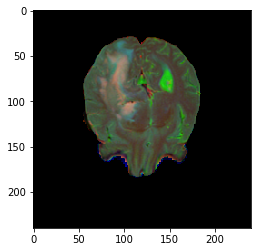

In [24]:
plt.imshow(image)

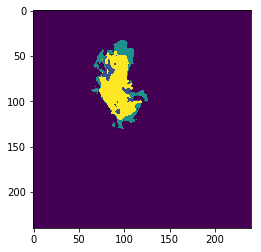

In [25]:
plt.imshow(label)

## Manipulations with features

In [ ]:
def check_tumor(data, col): 
    indexes = []
    counter=0
    for i,y in enumerate(data.loc[:, col]): 
        if len(np.unique(y)) == 4:
            print(i)
            indexes.append(i)
            counter += 1
    print('All done!The number of images with tumors is {} and number of images without tumor is {}'.format(counter, len(data.index)-counter))
    return indexes


def make_new_masks(data, indexes):
    
    for ind, y in enumerate(data.loc[:, 'X']):
        if ind in indexes:
            
            new_label=np.zeros((240, 240), dtype='uint8')
            
            label=data.loc[ind, 'Y']
            image=data.loc[ind, 'X']
            
            new_label[image[:,:,1]!=0]=1
            cool=new_label+label
        
            
            name=str(ind)+'.png'
            
            io.imsave('/mnt/e/Image Processing/Brats Project/data/masks/'+name, cool)
            print('{} DONE!'.format(ind))
            

In [ ]:
idx = check_tumor(df, 'Y')
make_new_masks(df, indexes = idx)

In [5]:
@jit
def check_tumor(data, col): 
    indexes = []
    counter=0
    for i,y in enumerate(data.loc[:, col]): 
        if len(np.unique(y)) == 4:
            print(i)
            indexes.append(i)
            counter += 1
    print('All done!The number of images with tumors is {} and number of images without tumor is {}'.format(counter, len(data.index)-counter))
    return indexes

In [6]:
#Create folder with images on which tumor is presented 
@jit
def leave_only_tumors(data, col, ind, im_or_label = 'masks/'):
    
    
    for index, image in enumerate(data.loc[:, col]):
        if index in ind: 
            name=str(index)+'.png'
            io.imsave('/mnt/e/Image Processing/Brats Project/data/'+im_or_label+name, image)     
            print('{}.{} saved to corresponding directory!'.format(index, im_or_label))
            
            
            
    print('Finally, {} {} created'.format(index, im_or_label))

In [7]:
indexes = check_tumor(df, 'Y')

leave_only_tumors(df, 'Y', ind=indexes)  #masks

leave_only_tumors(df, 'X',ind=indexes, im_or_label='images/') #images 

22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
76
77
78
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734


5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5840
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6437
6438
6439
6440
6441
6442
6443
6444
6445
6448
6449
6450
6451
6452
6453
6454
6455
6456
6457
6458
6459
6460
6461
6462
6463
6464
6465
6466
6467
6468


11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11649
11650
11651
11655
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11881
11882
11883
11884
11885
11886
1188

16689
16690
16691
16692
16693
16694
16695
16696
16697
16698
16699
16700
16701
16702
16703
16704
16705
16706
16707
16708
16709
16710
16711
16712
16713
16714
16715
16716
16717
16718
16719
16720
16721
16722
16723
16724
16725
16726
16727
16728
16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
16739
16740
16741
16742
16743
16744
16745
16746
16747
16748
16749
16797
16799
16800
16801
16802
16803
16804
16805
16806
16807
16808
16809
16810
16811
16812
16813
16814
16815
16816
16817
16818
16819
16820
16821
16822
16823
16824
16825
16826
16827
16828
16829
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
1710

21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21371
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21531
21532
21533
21534
21535
21536
21537
21538
21539
21540
21541
21542
21543
21544
21545
21546
21547
21548
21549
21550
21551
21552
21553
21554
21555
21556
21557
21558
21559
21560
21561
21562
21603
21604
21605
21606
21607
21608
21609
21610
21611
21612
21613
21614
21615
21616
21617
21618
21619
21620
21621
21622
21623
21624
21625
21626
21627
21628
21629
21630
21631
21632
21633
21634
2163

25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
25709
25710
25711
25712
25713
25714
25715
25716
25717
25718
25719
25720
25721
25722
25794
25795
25796
25797
25798
25799
25800
25801
25802
25803
25804
25805
25806
25807
25808
25809
25810
25811
25812
25813
25814
25815
25816
25817
25818
25819
25820
25821
25822
25823
25824
25825
25826
2582

32838
32839
32840
32841
32842
32843
32844
32845
32846
32847
32848
32849
32850
32851
32852
32853
32854
32855
32856
32857
32858
32859
32860
32861
32862
32863
32864
32865
32866
32867
32868
32869
32870
32871
32872
32873
32874
32875
32876
32877
33116
33117
33118
33119
33120
33121
33122
33123
33124
33125
33126
33127
33128
33129
33130
33131
33132
33133
33134
33135
33139
33140
33141
33142
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33358
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33382
33383
33469
33470
33471
33472
33473
33474
33475
33476
33481
33482
33483
33484
33485
33486
33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33686
3368

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26.png is a low 

22.masks/ saved to corresponding directory!
23.masks/ saved to corresponding directory!
24.masks/ saved to corresponding directory!
25.masks/ saved to corresponding directory!
26.masks/ saved to corresponding directory!
27.masks/ saved to corresponding directory!
28.masks/ saved to corresponding directory!
29.masks/ saved to corresponding directory!
30.masks/ saved to corresponding directory!
31.masks/ saved to corresponding directory!
32.masks/ saved to corresponding directory!
33.masks/ saved to corresponding directory!
34.masks/ saved to corresponding directory!
35.masks/ saved to corresponding directory!
36.masks/ saved to corresponding directory!
37.masks/ saved to corresponding directory!
38.masks/ saved to corresponding directory!
39.masks/ saved to corresponding directory!
40.masks/ saved to corresponding directory!
41.masks/ saved to corresponding directory!
42.masks/ saved to corresponding directory!
43.masks/ saved to corresponding directory!
44.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/68.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/69.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/70.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/71.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/72.png is a low 

185.masks/ saved to corresponding directory!
186.masks/ saved to corresponding directory!
187.masks/ saved to corresponding directory!
188.masks/ saved to corresponding directory!
189.masks/ saved to corresponding directory!
190.masks/ saved to corresponding directory!
191.masks/ saved to corresponding directory!
192.masks/ saved to corresponding directory!
193.masks/ saved to corresponding directory!
194.masks/ saved to corresponding directory!
195.masks/ saved to corresponding directory!
196.masks/ saved to corresponding directory!
197.masks/ saved to corresponding directory!
198.masks/ saved to corresponding directory!
199.masks/ saved to corresponding directory!
200.masks/ saved to corresponding directory!
201.masks/ saved to corresponding directory!
202.masks/ saved to corresponding directory!
203.masks/ saved to corresponding directory!
204.masks/ saved to corresponding directory!
205.masks/ saved to corresponding directory!
206.masks/ saved to corresponding directory!
207.masks/

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/314.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/315.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/316.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/317.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/318.png is a

342.masks/ saved to corresponding directory!
343.masks/ saved to corresponding directory!
344.masks/ saved to corresponding directory!
345.masks/ saved to corresponding directory!
346.masks/ saved to corresponding directory!
347.masks/ saved to corresponding directory!
348.masks/ saved to corresponding directory!
349.masks/ saved to corresponding directory!
350.masks/ saved to corresponding directory!
351.masks/ saved to corresponding directory!
352.masks/ saved to corresponding directory!
353.masks/ saved to corresponding directory!
354.masks/ saved to corresponding directory!
355.masks/ saved to corresponding directory!
356.masks/ saved to corresponding directory!
357.masks/ saved to corresponding directory!
464.masks/ saved to corresponding directory!
465.masks/ saved to corresponding directory!
466.masks/ saved to corresponding directory!
467.masks/ saved to corresponding directory!
468.masks/ saved to corresponding directory!
469.masks/ saved to corresponding directory!
470.masks/

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/563.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/564.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/565.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/566.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/567.png is a

595.masks/ saved to corresponding directory!
596.masks/ saved to corresponding directory!
702.masks/ saved to corresponding directory!
703.masks/ saved to corresponding directory!
704.masks/ saved to corresponding directory!
705.masks/ saved to corresponding directory!
706.masks/ saved to corresponding directory!
707.masks/ saved to corresponding directory!
708.masks/ saved to corresponding directory!
709.masks/ saved to corresponding directory!
710.masks/ saved to corresponding directory!
711.masks/ saved to corresponding directory!
712.masks/ saved to corresponding directory!
713.masks/ saved to corresponding directory!
714.masks/ saved to corresponding directory!
715.masks/ saved to corresponding directory!
716.masks/ saved to corresponding directory!
717.masks/ saved to corresponding directory!
718.masks/ saved to corresponding directory!
719.masks/ saved to corresponding directory!
720.masks/ saved to corresponding directory!
721.masks/ saved to corresponding directory!
722.masks/

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/742.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/743.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/744.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/745.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/746.png is a

853.masks/ saved to corresponding directory!
854.masks/ saved to corresponding directory!
855.masks/ saved to corresponding directory!
856.masks/ saved to corresponding directory!
857.masks/ saved to corresponding directory!
858.masks/ saved to corresponding directory!
859.masks/ saved to corresponding directory!
860.masks/ saved to corresponding directory!
861.masks/ saved to corresponding directory!
862.masks/ saved to corresponding directory!
863.masks/ saved to corresponding directory!
864.masks/ saved to corresponding directory!
865.masks/ saved to corresponding directory!
866.masks/ saved to corresponding directory!
867.masks/ saved to corresponding directory!
868.masks/ saved to corresponding directory!
964.masks/ saved to corresponding directory!
965.masks/ saved to corresponding directory!
966.masks/ saved to corresponding directory!
967.masks/ saved to corresponding directory!
968.masks/ saved to corresponding directory!
969.masks/ saved to corresponding directory!
970.masks/

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/993.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/994.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/995.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/996.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/997.png is a

1106.masks/ saved to corresponding directory!
1107.masks/ saved to corresponding directory!
1108.masks/ saved to corresponding directory!
1109.masks/ saved to corresponding directory!
1110.masks/ saved to corresponding directory!
1111.masks/ saved to corresponding directory!
1112.masks/ saved to corresponding directory!
1113.masks/ saved to corresponding directory!
1114.masks/ saved to corresponding directory!
1115.masks/ saved to corresponding directory!
1116.masks/ saved to corresponding directory!
1117.masks/ saved to corresponding directory!
1118.masks/ saved to corresponding directory!
1119.masks/ saved to corresponding directory!
1120.masks/ saved to corresponding directory!
1121.masks/ saved to corresponding directory!
1122.masks/ saved to corresponding directory!
1123.masks/ saved to corresponding directory!
1124.masks/ saved to corresponding directory!
1125.masks/ saved to corresponding directory!
1126.masks/ saved to corresponding directory!
1127.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1150.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1151.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1152.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1153.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1154.png

1252.masks/ saved to corresponding directory!
1253.masks/ saved to corresponding directory!
1254.masks/ saved to corresponding directory!
1255.masks/ saved to corresponding directory!
1256.masks/ saved to corresponding directory!
1257.masks/ saved to corresponding directory!
1258.masks/ saved to corresponding directory!
1259.masks/ saved to corresponding directory!
1260.masks/ saved to corresponding directory!
1261.masks/ saved to corresponding directory!
1262.masks/ saved to corresponding directory!
1263.masks/ saved to corresponding directory!
1264.masks/ saved to corresponding directory!
1326.masks/ saved to corresponding directory!
1327.masks/ saved to corresponding directory!
1328.masks/ saved to corresponding directory!
1329.masks/ saved to corresponding directory!
1330.masks/ saved to corresponding directory!
1331.masks/ saved to corresponding directory!
1332.masks/ saved to corresponding directory!
1333.masks/ saved to corresponding directory!
1334.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1359.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1360.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1361.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1362.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1363.png

1467.masks/ saved to corresponding directory!
1468.masks/ saved to corresponding directory!
1469.masks/ saved to corresponding directory!
1470.masks/ saved to corresponding directory!
1471.masks/ saved to corresponding directory!
1472.masks/ saved to corresponding directory!
1473.masks/ saved to corresponding directory!
1474.masks/ saved to corresponding directory!
1475.masks/ saved to corresponding directory!
1476.masks/ saved to corresponding directory!
1477.masks/ saved to corresponding directory!
1478.masks/ saved to corresponding directory!
1479.masks/ saved to corresponding directory!
1480.masks/ saved to corresponding directory!
1481.masks/ saved to corresponding directory!
1482.masks/ saved to corresponding directory!
1483.masks/ saved to corresponding directory!
1484.masks/ saved to corresponding directory!
1485.masks/ saved to corresponding directory!
1486.masks/ saved to corresponding directory!
1487.masks/ saved to corresponding directory!
1488.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1515.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1516.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1517.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1518.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1519.png

1659.masks/ saved to corresponding directory!
1660.masks/ saved to corresponding directory!
1661.masks/ saved to corresponding directory!
1662.masks/ saved to corresponding directory!
1663.masks/ saved to corresponding directory!
1664.masks/ saved to corresponding directory!
1665.masks/ saved to corresponding directory!
1666.masks/ saved to corresponding directory!
1667.masks/ saved to corresponding directory!
1668.masks/ saved to corresponding directory!
1669.masks/ saved to corresponding directory!
1670.masks/ saved to corresponding directory!
1773.masks/ saved to corresponding directory!
1774.masks/ saved to corresponding directory!
1775.masks/ saved to corresponding directory!
1776.masks/ saved to corresponding directory!
1777.masks/ saved to corresponding directory!
1778.masks/ saved to corresponding directory!
1779.masks/ saved to corresponding directory!
1780.masks/ saved to corresponding directory!
1781.masks/ saved to corresponding directory!
1782.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1860.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1861.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1862.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1863.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1864.png

2031.masks/ saved to corresponding directory!
2032.masks/ saved to corresponding directory!
2033.masks/ saved to corresponding directory!
2034.masks/ saved to corresponding directory!
2035.masks/ saved to corresponding directory!
2036.masks/ saved to corresponding directory!
2037.masks/ saved to corresponding directory!
2038.masks/ saved to corresponding directory!
2039.masks/ saved to corresponding directory!
2040.masks/ saved to corresponding directory!
2041.masks/ saved to corresponding directory!
2042.masks/ saved to corresponding directory!
2043.masks/ saved to corresponding directory!
2044.masks/ saved to corresponding directory!
2045.masks/ saved to corresponding directory!
2046.masks/ saved to corresponding directory!
2047.masks/ saved to corresponding directory!
2048.masks/ saved to corresponding directory!
2049.masks/ saved to corresponding directory!
2050.masks/ saved to corresponding directory!
2051.masks/ saved to corresponding directory!
2052.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2130.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2131.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2132.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2133.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2134.png

2257.masks/ saved to corresponding directory!
2258.masks/ saved to corresponding directory!
2259.masks/ saved to corresponding directory!
2260.masks/ saved to corresponding directory!
2261.masks/ saved to corresponding directory!
2262.masks/ saved to corresponding directory!
2263.masks/ saved to corresponding directory!
2264.masks/ saved to corresponding directory!
2265.masks/ saved to corresponding directory!
2266.masks/ saved to corresponding directory!
2267.masks/ saved to corresponding directory!
2268.masks/ saved to corresponding directory!
2269.masks/ saved to corresponding directory!
2270.masks/ saved to corresponding directory!
2271.masks/ saved to corresponding directory!
2272.masks/ saved to corresponding directory!
2273.masks/ saved to corresponding directory!
2283.masks/ saved to corresponding directory!
2284.masks/ saved to corresponding directory!
2285.masks/ saved to corresponding directory!
2286.masks/ saved to corresponding directory!
2287.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2314.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2315.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2316.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2317.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2318.png

2435.masks/ saved to corresponding directory!
2436.masks/ saved to corresponding directory!
2437.masks/ saved to corresponding directory!
2438.masks/ saved to corresponding directory!
2439.masks/ saved to corresponding directory!
2440.masks/ saved to corresponding directory!
2441.masks/ saved to corresponding directory!
2442.masks/ saved to corresponding directory!
2443.masks/ saved to corresponding directory!
2444.masks/ saved to corresponding directory!
2445.masks/ saved to corresponding directory!
2446.masks/ saved to corresponding directory!
2447.masks/ saved to corresponding directory!
2448.masks/ saved to corresponding directory!
2449.masks/ saved to corresponding directory!
2450.masks/ saved to corresponding directory!
2451.masks/ saved to corresponding directory!
2452.masks/ saved to corresponding directory!
2453.masks/ saved to corresponding directory!
2544.masks/ saved to corresponding directory!
2545.masks/ saved to corresponding directory!
2546.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2572.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2573.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2574.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2575.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2576.png

2645.masks/ saved to corresponding directory!
2646.masks/ saved to corresponding directory!
2647.masks/ saved to corresponding directory!
2648.masks/ saved to corresponding directory!
2649.masks/ saved to corresponding directory!
2650.masks/ saved to corresponding directory!
2651.masks/ saved to corresponding directory!
2652.masks/ saved to corresponding directory!
2653.masks/ saved to corresponding directory!
2654.masks/ saved to corresponding directory!
2655.masks/ saved to corresponding directory!
2656.masks/ saved to corresponding directory!
2657.masks/ saved to corresponding directory!
2658.masks/ saved to corresponding directory!
2659.masks/ saved to corresponding directory!
2660.masks/ saved to corresponding directory!
2661.masks/ saved to corresponding directory!
2662.masks/ saved to corresponding directory!
2663.masks/ saved to corresponding directory!
2664.masks/ saved to corresponding directory!
2665.masks/ saved to corresponding directory!
2666.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2778.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2779.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2780.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2781.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2782.png

3046.masks/ saved to corresponding directory!
3047.masks/ saved to corresponding directory!
3048.masks/ saved to corresponding directory!
3049.masks/ saved to corresponding directory!
3050.masks/ saved to corresponding directory!
3051.masks/ saved to corresponding directory!
3052.masks/ saved to corresponding directory!
3053.masks/ saved to corresponding directory!
3054.masks/ saved to corresponding directory!
3055.masks/ saved to corresponding directory!
3056.masks/ saved to corresponding directory!
3057.masks/ saved to corresponding directory!
3058.masks/ saved to corresponding directory!
3059.masks/ saved to corresponding directory!
3060.masks/ saved to corresponding directory!
3061.masks/ saved to corresponding directory!
3062.masks/ saved to corresponding directory!
3063.masks/ saved to corresponding directory!
3064.masks/ saved to corresponding directory!
3065.masks/ saved to corresponding directory!
3066.masks/ saved to corresponding directory!
3067.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3198.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3199.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3200.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3201.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3202.png

3316.masks/ saved to corresponding directory!
3317.masks/ saved to corresponding directory!
3318.masks/ saved to corresponding directory!
3319.masks/ saved to corresponding directory!
3320.masks/ saved to corresponding directory!
3321.masks/ saved to corresponding directory!
3322.masks/ saved to corresponding directory!
3323.masks/ saved to corresponding directory!
3324.masks/ saved to corresponding directory!
3325.masks/ saved to corresponding directory!
3326.masks/ saved to corresponding directory!
3327.masks/ saved to corresponding directory!
3328.masks/ saved to corresponding directory!
3329.masks/ saved to corresponding directory!
3330.masks/ saved to corresponding directory!
3331.masks/ saved to corresponding directory!
3332.masks/ saved to corresponding directory!
3333.masks/ saved to corresponding directory!
3334.masks/ saved to corresponding directory!
3335.masks/ saved to corresponding directory!
3336.masks/ saved to corresponding directory!
3337.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3358.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3359.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3360.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3361.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3411.png

3539.masks/ saved to corresponding directory!
3540.masks/ saved to corresponding directory!
3541.masks/ saved to corresponding directory!
3542.masks/ saved to corresponding directory!
3543.masks/ saved to corresponding directory!
3544.masks/ saved to corresponding directory!
3545.masks/ saved to corresponding directory!
3670.masks/ saved to corresponding directory!
3671.masks/ saved to corresponding directory!
3672.masks/ saved to corresponding directory!
3673.masks/ saved to corresponding directory!
3674.masks/ saved to corresponding directory!
3675.masks/ saved to corresponding directory!
3676.masks/ saved to corresponding directory!
3677.masks/ saved to corresponding directory!
3678.masks/ saved to corresponding directory!
3679.masks/ saved to corresponding directory!
3680.masks/ saved to corresponding directory!
3681.masks/ saved to corresponding directory!
3682.masks/ saved to corresponding directory!
3683.masks/ saved to corresponding directory!
3684.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3701.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3702.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3703.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3704.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3705.png

3851.masks/ saved to corresponding directory!
3852.masks/ saved to corresponding directory!
3853.masks/ saved to corresponding directory!
3854.masks/ saved to corresponding directory!
3855.masks/ saved to corresponding directory!
3943.masks/ saved to corresponding directory!
3944.masks/ saved to corresponding directory!
3945.masks/ saved to corresponding directory!
3946.masks/ saved to corresponding directory!
3947.masks/ saved to corresponding directory!
3948.masks/ saved to corresponding directory!
3949.masks/ saved to corresponding directory!
3950.masks/ saved to corresponding directory!
3951.masks/ saved to corresponding directory!
3952.masks/ saved to corresponding directory!
3953.masks/ saved to corresponding directory!
3954.masks/ saved to corresponding directory!
3955.masks/ saved to corresponding directory!
3956.masks/ saved to corresponding directory!
3957.masks/ saved to corresponding directory!
3958.masks/ saved to corresponding directory!
3959.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3989.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3990.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3991.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3992.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3993.png

4220.masks/ saved to corresponding directory!
4221.masks/ saved to corresponding directory!
4222.masks/ saved to corresponding directory!
4223.masks/ saved to corresponding directory!
4224.masks/ saved to corresponding directory!
4225.masks/ saved to corresponding directory!
4226.masks/ saved to corresponding directory!
4227.masks/ saved to corresponding directory!
4228.masks/ saved to corresponding directory!
4229.masks/ saved to corresponding directory!
4230.masks/ saved to corresponding directory!
4231.masks/ saved to corresponding directory!
4232.masks/ saved to corresponding directory!
4233.masks/ saved to corresponding directory!
4234.masks/ saved to corresponding directory!
4235.masks/ saved to corresponding directory!
4236.masks/ saved to corresponding directory!
4237.masks/ saved to corresponding directory!
4238.masks/ saved to corresponding directory!
4239.masks/ saved to corresponding directory!
4240.masks/ saved to corresponding directory!
4241.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4325.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4326.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4327.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4328.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4329.png

4474.masks/ saved to corresponding directory!
4475.masks/ saved to corresponding directory!
4476.masks/ saved to corresponding directory!
4477.masks/ saved to corresponding directory!
4478.masks/ saved to corresponding directory!
4479.masks/ saved to corresponding directory!
4480.masks/ saved to corresponding directory!
4481.masks/ saved to corresponding directory!
4482.masks/ saved to corresponding directory!
4483.masks/ saved to corresponding directory!
4484.masks/ saved to corresponding directory!
4485.masks/ saved to corresponding directory!
4486.masks/ saved to corresponding directory!
4487.masks/ saved to corresponding directory!
4488.masks/ saved to corresponding directory!
4489.masks/ saved to corresponding directory!
4490.masks/ saved to corresponding directory!
4491.masks/ saved to corresponding directory!
4492.masks/ saved to corresponding directory!
4493.masks/ saved to corresponding directory!
4494.masks/ saved to corresponding directory!
4495.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4630.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4631.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4632.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4633.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4634.png

4735.masks/ saved to corresponding directory!
4736.masks/ saved to corresponding directory!
4737.masks/ saved to corresponding directory!
4738.masks/ saved to corresponding directory!
4739.masks/ saved to corresponding directory!
4740.masks/ saved to corresponding directory!
4741.masks/ saved to corresponding directory!
4742.masks/ saved to corresponding directory!
4743.masks/ saved to corresponding directory!
4744.masks/ saved to corresponding directory!
4745.masks/ saved to corresponding directory!
4746.masks/ saved to corresponding directory!
4747.masks/ saved to corresponding directory!
4748.masks/ saved to corresponding directory!
4749.masks/ saved to corresponding directory!
4750.masks/ saved to corresponding directory!
4751.masks/ saved to corresponding directory!
4752.masks/ saved to corresponding directory!
4753.masks/ saved to corresponding directory!
4754.masks/ saved to corresponding directory!
4755.masks/ saved to corresponding directory!
4869.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4975.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4976.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4977.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4978.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/4979.png

5100.masks/ saved to corresponding directory!
5101.masks/ saved to corresponding directory!
5102.masks/ saved to corresponding directory!
5103.masks/ saved to corresponding directory!
5104.masks/ saved to corresponding directory!
5105.masks/ saved to corresponding directory!
5106.masks/ saved to corresponding directory!
5107.masks/ saved to corresponding directory!
5108.masks/ saved to corresponding directory!
5109.masks/ saved to corresponding directory!
5110.masks/ saved to corresponding directory!
5111.masks/ saved to corresponding directory!
5112.masks/ saved to corresponding directory!
5113.masks/ saved to corresponding directory!
5114.masks/ saved to corresponding directory!
5115.masks/ saved to corresponding directory!
5116.masks/ saved to corresponding directory!
5117.masks/ saved to corresponding directory!
5118.masks/ saved to corresponding directory!
5119.masks/ saved to corresponding directory!
5120.masks/ saved to corresponding directory!
5121.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5280.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5281.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5282.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5283.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5284.png

5401.masks/ saved to corresponding directory!
5402.masks/ saved to corresponding directory!
5403.masks/ saved to corresponding directory!
5404.masks/ saved to corresponding directory!
5405.masks/ saved to corresponding directory!
5406.masks/ saved to corresponding directory!
5407.masks/ saved to corresponding directory!
5408.masks/ saved to corresponding directory!
5409.masks/ saved to corresponding directory!
5410.masks/ saved to corresponding directory!
5411.masks/ saved to corresponding directory!
5412.masks/ saved to corresponding directory!
5413.masks/ saved to corresponding directory!
5414.masks/ saved to corresponding directory!
5415.masks/ saved to corresponding directory!
5416.masks/ saved to corresponding directory!
5417.masks/ saved to corresponding directory!
5418.masks/ saved to corresponding directory!
5419.masks/ saved to corresponding directory!
5420.masks/ saved to corresponding directory!
5421.masks/ saved to corresponding directory!
5422.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5538.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5539.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5540.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5541.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5542.png

5630.masks/ saved to corresponding directory!
5631.masks/ saved to corresponding directory!
5632.masks/ saved to corresponding directory!
5633.masks/ saved to corresponding directory!
5634.masks/ saved to corresponding directory!
5635.masks/ saved to corresponding directory!
5643.masks/ saved to corresponding directory!
5645.masks/ saved to corresponding directory!
5646.masks/ saved to corresponding directory!
5656.masks/ saved to corresponding directory!
5657.masks/ saved to corresponding directory!
5658.masks/ saved to corresponding directory!
5659.masks/ saved to corresponding directory!
5660.masks/ saved to corresponding directory!
5661.masks/ saved to corresponding directory!
5662.masks/ saved to corresponding directory!
5663.masks/ saved to corresponding directory!
5664.masks/ saved to corresponding directory!
5665.masks/ saved to corresponding directory!
5666.masks/ saved to corresponding directory!
5667.masks/ saved to corresponding directory!
5668.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5692.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5693.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5694.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5695.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5696.png

5821.masks/ saved to corresponding directory!
5822.masks/ saved to corresponding directory!
5823.masks/ saved to corresponding directory!
5824.masks/ saved to corresponding directory!
5825.masks/ saved to corresponding directory!
5826.masks/ saved to corresponding directory!
5827.masks/ saved to corresponding directory!
5828.masks/ saved to corresponding directory!
5829.masks/ saved to corresponding directory!
5830.masks/ saved to corresponding directory!
5831.masks/ saved to corresponding directory!
5832.masks/ saved to corresponding directory!
5833.masks/ saved to corresponding directory!
5834.masks/ saved to corresponding directory!
5835.masks/ saved to corresponding directory!
5836.masks/ saved to corresponding directory!
5837.masks/ saved to corresponding directory!
5838.masks/ saved to corresponding directory!
5840.masks/ saved to corresponding directory!
5876.masks/ saved to corresponding directory!
5877.masks/ saved to corresponding directory!
5878.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5899.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5900.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5901.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5902.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/5903.png

6026.masks/ saved to corresponding directory!
6027.masks/ saved to corresponding directory!
6028.masks/ saved to corresponding directory!
6029.masks/ saved to corresponding directory!
6030.masks/ saved to corresponding directory!
6031.masks/ saved to corresponding directory!
6032.masks/ saved to corresponding directory!
6033.masks/ saved to corresponding directory!
6034.masks/ saved to corresponding directory!
6035.masks/ saved to corresponding directory!
6036.masks/ saved to corresponding directory!
6037.masks/ saved to corresponding directory!
6038.masks/ saved to corresponding directory!
6039.masks/ saved to corresponding directory!
6040.masks/ saved to corresponding directory!
6041.masks/ saved to corresponding directory!
6042.masks/ saved to corresponding directory!
6043.masks/ saved to corresponding directory!
6044.masks/ saved to corresponding directory!
6045.masks/ saved to corresponding directory!
6046.masks/ saved to corresponding directory!
6047.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6148.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6149.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6150.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6151.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6152.png

6308.masks/ saved to corresponding directory!
6309.masks/ saved to corresponding directory!
6310.masks/ saved to corresponding directory!
6311.masks/ saved to corresponding directory!
6312.masks/ saved to corresponding directory!
6313.masks/ saved to corresponding directory!
6437.masks/ saved to corresponding directory!
6438.masks/ saved to corresponding directory!
6439.masks/ saved to corresponding directory!
6440.masks/ saved to corresponding directory!
6441.masks/ saved to corresponding directory!
6442.masks/ saved to corresponding directory!
6443.masks/ saved to corresponding directory!
6444.masks/ saved to corresponding directory!
6445.masks/ saved to corresponding directory!
6448.masks/ saved to corresponding directory!
6449.masks/ saved to corresponding directory!
6450.masks/ saved to corresponding directory!
6451.masks/ saved to corresponding directory!
6452.masks/ saved to corresponding directory!
6453.masks/ saved to corresponding directory!
6454.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6469.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6470.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6471.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6472.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6473.png

6580.masks/ saved to corresponding directory!
6581.masks/ saved to corresponding directory!
6582.masks/ saved to corresponding directory!
6583.masks/ saved to corresponding directory!
6584.masks/ saved to corresponding directory!
6585.masks/ saved to corresponding directory!
6586.masks/ saved to corresponding directory!
6587.masks/ saved to corresponding directory!
6588.masks/ saved to corresponding directory!
6589.masks/ saved to corresponding directory!
6590.masks/ saved to corresponding directory!
6591.masks/ saved to corresponding directory!
6592.masks/ saved to corresponding directory!
6593.masks/ saved to corresponding directory!
6594.masks/ saved to corresponding directory!
6595.masks/ saved to corresponding directory!
6596.masks/ saved to corresponding directory!
6597.masks/ saved to corresponding directory!
6598.masks/ saved to corresponding directory!
6599.masks/ saved to corresponding directory!
6600.masks/ saved to corresponding directory!
6601.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6724.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6725.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6726.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6727.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6728.png

6834.masks/ saved to corresponding directory!
6835.masks/ saved to corresponding directory!
6836.masks/ saved to corresponding directory!
6837.masks/ saved to corresponding directory!
6838.masks/ saved to corresponding directory!
6839.masks/ saved to corresponding directory!
6840.masks/ saved to corresponding directory!
6841.masks/ saved to corresponding directory!
6842.masks/ saved to corresponding directory!
6843.masks/ saved to corresponding directory!
6844.masks/ saved to corresponding directory!
6845.masks/ saved to corresponding directory!
6846.masks/ saved to corresponding directory!
6847.masks/ saved to corresponding directory!
6848.masks/ saved to corresponding directory!
6849.masks/ saved to corresponding directory!
6850.masks/ saved to corresponding directory!
6851.masks/ saved to corresponding directory!
6852.masks/ saved to corresponding directory!
6853.masks/ saved to corresponding directory!
6854.masks/ saved to corresponding directory!
6855.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6961.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6962.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6963.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6964.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/6965.png

7000.masks/ saved to corresponding directory!
7001.masks/ saved to corresponding directory!
7002.masks/ saved to corresponding directory!
7003.masks/ saved to corresponding directory!
7004.masks/ saved to corresponding directory!
7005.masks/ saved to corresponding directory!
7006.masks/ saved to corresponding directory!
7007.masks/ saved to corresponding directory!
7008.masks/ saved to corresponding directory!
7009.masks/ saved to corresponding directory!
7010.masks/ saved to corresponding directory!
7011.masks/ saved to corresponding directory!
7012.masks/ saved to corresponding directory!
7013.masks/ saved to corresponding directory!
7014.masks/ saved to corresponding directory!
7047.masks/ saved to corresponding directory!
7048.masks/ saved to corresponding directory!
7049.masks/ saved to corresponding directory!
7050.masks/ saved to corresponding directory!
7051.masks/ saved to corresponding directory!
7052.masks/ saved to corresponding directory!
7053.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7070.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7071.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7072.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7073.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7074.png

7227.masks/ saved to corresponding directory!
7228.masks/ saved to corresponding directory!
7229.masks/ saved to corresponding directory!
7230.masks/ saved to corresponding directory!
7231.masks/ saved to corresponding directory!
7233.masks/ saved to corresponding directory!
7234.masks/ saved to corresponding directory!
7235.masks/ saved to corresponding directory!
7328.masks/ saved to corresponding directory!
7329.masks/ saved to corresponding directory!
7330.masks/ saved to corresponding directory!
7331.masks/ saved to corresponding directory!
7332.masks/ saved to corresponding directory!
7333.masks/ saved to corresponding directory!
7334.masks/ saved to corresponding directory!
7335.masks/ saved to corresponding directory!
7336.masks/ saved to corresponding directory!
7337.masks/ saved to corresponding directory!
7338.masks/ saved to corresponding directory!
7339.masks/ saved to corresponding directory!
7340.masks/ saved to corresponding directory!
7341.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7457.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7458.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7459.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7460.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7461.png

7498.masks/ saved to corresponding directory!
7499.masks/ saved to corresponding directory!
7500.masks/ saved to corresponding directory!
7501.masks/ saved to corresponding directory!
7502.masks/ saved to corresponding directory!
7503.masks/ saved to corresponding directory!
7504.masks/ saved to corresponding directory!
7505.masks/ saved to corresponding directory!
7506.masks/ saved to corresponding directory!
7507.masks/ saved to corresponding directory!
7508.masks/ saved to corresponding directory!
7509.masks/ saved to corresponding directory!
7593.masks/ saved to corresponding directory!
7594.masks/ saved to corresponding directory!
7595.masks/ saved to corresponding directory!
7596.masks/ saved to corresponding directory!
7597.masks/ saved to corresponding directory!
7598.masks/ saved to corresponding directory!
7599.masks/ saved to corresponding directory!
7600.masks/ saved to corresponding directory!
7601.masks/ saved to corresponding directory!
7602.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7621.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7622.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7623.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7624.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7625.png

7725.masks/ saved to corresponding directory!
7726.masks/ saved to corresponding directory!
7727.masks/ saved to corresponding directory!
7728.masks/ saved to corresponding directory!
7821.masks/ saved to corresponding directory!
7822.masks/ saved to corresponding directory!
7823.masks/ saved to corresponding directory!
7824.masks/ saved to corresponding directory!
7825.masks/ saved to corresponding directory!
7826.masks/ saved to corresponding directory!
7827.masks/ saved to corresponding directory!
7828.masks/ saved to corresponding directory!
7829.masks/ saved to corresponding directory!
7830.masks/ saved to corresponding directory!
7831.masks/ saved to corresponding directory!
7832.masks/ saved to corresponding directory!
7833.masks/ saved to corresponding directory!
7834.masks/ saved to corresponding directory!
7835.masks/ saved to corresponding directory!
7836.masks/ saved to corresponding directory!
7837.masks/ saved to corresponding directory!
7838.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7854.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7855.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7856.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7857.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/7858.png

8017.masks/ saved to corresponding directory!
8018.masks/ saved to corresponding directory!
8019.masks/ saved to corresponding directory!
8020.masks/ saved to corresponding directory!
8021.masks/ saved to corresponding directory!
8022.masks/ saved to corresponding directory!
8023.masks/ saved to corresponding directory!
8024.masks/ saved to corresponding directory!
8025.masks/ saved to corresponding directory!
8026.masks/ saved to corresponding directory!
8027.masks/ saved to corresponding directory!
8093.masks/ saved to corresponding directory!
8094.masks/ saved to corresponding directory!
8095.masks/ saved to corresponding directory!
8096.masks/ saved to corresponding directory!
8097.masks/ saved to corresponding directory!
8098.masks/ saved to corresponding directory!
8099.masks/ saved to corresponding directory!
8100.masks/ saved to corresponding directory!
8101.masks/ saved to corresponding directory!
8102.masks/ saved to corresponding directory!
8103.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8279.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8290.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8291.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8292.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8293.png

8383.masks/ saved to corresponding directory!
8384.masks/ saved to corresponding directory!
8385.masks/ saved to corresponding directory!
8386.masks/ saved to corresponding directory!
8387.masks/ saved to corresponding directory!
8388.masks/ saved to corresponding directory!
8389.masks/ saved to corresponding directory!
8390.masks/ saved to corresponding directory!
8391.masks/ saved to corresponding directory!
8392.masks/ saved to corresponding directory!
8393.masks/ saved to corresponding directory!
8394.masks/ saved to corresponding directory!
8395.masks/ saved to corresponding directory!
8396.masks/ saved to corresponding directory!
8397.masks/ saved to corresponding directory!
8398.masks/ saved to corresponding directory!
8399.masks/ saved to corresponding directory!
8400.masks/ saved to corresponding directory!
8401.masks/ saved to corresponding directory!
8402.masks/ saved to corresponding directory!
8403.masks/ saved to corresponding directory!
8404.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8418.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8419.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8420.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8473.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8474.png

8645.masks/ saved to corresponding directory!
8646.masks/ saved to corresponding directory!
8647.masks/ saved to corresponding directory!
8648.masks/ saved to corresponding directory!
8649.masks/ saved to corresponding directory!
8650.masks/ saved to corresponding directory!
8651.masks/ saved to corresponding directory!
8652.masks/ saved to corresponding directory!
8653.masks/ saved to corresponding directory!
8654.masks/ saved to corresponding directory!
8655.masks/ saved to corresponding directory!
8656.masks/ saved to corresponding directory!
8657.masks/ saved to corresponding directory!
8658.masks/ saved to corresponding directory!
8659.masks/ saved to corresponding directory!
8660.masks/ saved to corresponding directory!
8661.masks/ saved to corresponding directory!
8662.masks/ saved to corresponding directory!
8663.masks/ saved to corresponding directory!
8664.masks/ saved to corresponding directory!
8665.masks/ saved to corresponding directory!
8666.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8693.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8694.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8743.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8744.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/8745.png

8918.masks/ saved to corresponding directory!
8919.masks/ saved to corresponding directory!
8920.masks/ saved to corresponding directory!
8921.masks/ saved to corresponding directory!
8922.masks/ saved to corresponding directory!
8923.masks/ saved to corresponding directory!
8924.masks/ saved to corresponding directory!
8925.masks/ saved to corresponding directory!
9000.masks/ saved to corresponding directory!
9001.masks/ saved to corresponding directory!
9002.masks/ saved to corresponding directory!
9003.masks/ saved to corresponding directory!
9004.masks/ saved to corresponding directory!
9005.masks/ saved to corresponding directory!
9006.masks/ saved to corresponding directory!
9007.masks/ saved to corresponding directory!
9008.masks/ saved to corresponding directory!
9009.masks/ saved to corresponding directory!
9010.masks/ saved to corresponding directory!
9011.masks/ saved to corresponding directory!
9012.masks/ saved to corresponding directory!
9013.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9027.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9028.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9029.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9030.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9031.png

9185.masks/ saved to corresponding directory!
9186.masks/ saved to corresponding directory!
9187.masks/ saved to corresponding directory!
9188.masks/ saved to corresponding directory!
9189.masks/ saved to corresponding directory!
9190.masks/ saved to corresponding directory!
9191.masks/ saved to corresponding directory!
9192.masks/ saved to corresponding directory!
9193.masks/ saved to corresponding directory!
9194.masks/ saved to corresponding directory!
9195.masks/ saved to corresponding directory!
9196.masks/ saved to corresponding directory!
9197.masks/ saved to corresponding directory!
9198.masks/ saved to corresponding directory!
9199.masks/ saved to corresponding directory!
9200.masks/ saved to corresponding directory!
9201.masks/ saved to corresponding directory!
9202.masks/ saved to corresponding directory!
9203.masks/ saved to corresponding directory!
9204.masks/ saved to corresponding directory!
9205.masks/ saved to corresponding directory!
9206.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9320.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9321.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9322.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9323.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9324.png

9442.masks/ saved to corresponding directory!
9443.masks/ saved to corresponding directory!
9444.masks/ saved to corresponding directory!
9445.masks/ saved to corresponding directory!
9446.masks/ saved to corresponding directory!
9447.masks/ saved to corresponding directory!
9448.masks/ saved to corresponding directory!
9449.masks/ saved to corresponding directory!
9450.masks/ saved to corresponding directory!
9451.masks/ saved to corresponding directory!
9452.masks/ saved to corresponding directory!
9454.masks/ saved to corresponding directory!
9455.masks/ saved to corresponding directory!
9531.masks/ saved to corresponding directory!
9532.masks/ saved to corresponding directory!
9533.masks/ saved to corresponding directory!
9534.masks/ saved to corresponding directory!
9535.masks/ saved to corresponding directory!
9536.masks/ saved to corresponding directory!
9537.masks/ saved to corresponding directory!
9538.masks/ saved to corresponding directory!
9539.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9552.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9553.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9554.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9555.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9556.png

9682.masks/ saved to corresponding directory!
9683.masks/ saved to corresponding directory!
9684.masks/ saved to corresponding directory!
9685.masks/ saved to corresponding directory!
9686.masks/ saved to corresponding directory!
9687.masks/ saved to corresponding directory!
9688.masks/ saved to corresponding directory!
9689.masks/ saved to corresponding directory!
9690.masks/ saved to corresponding directory!
9691.masks/ saved to corresponding directory!
9692.masks/ saved to corresponding directory!
9693.masks/ saved to corresponding directory!
9694.masks/ saved to corresponding directory!
9695.masks/ saved to corresponding directory!
9696.masks/ saved to corresponding directory!
9697.masks/ saved to corresponding directory!
9698.masks/ saved to corresponding directory!
9699.masks/ saved to corresponding directory!
9700.masks/ saved to corresponding directory!
9701.masks/ saved to corresponding directory!
9702.masks/ saved to corresponding directory!
9703.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9831.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9832.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9833.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9834.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/9835.png

9965.masks/ saved to corresponding directory!
9966.masks/ saved to corresponding directory!
9967.masks/ saved to corresponding directory!
9968.masks/ saved to corresponding directory!
9969.masks/ saved to corresponding directory!
9970.masks/ saved to corresponding directory!
9971.masks/ saved to corresponding directory!
9972.masks/ saved to corresponding directory!
9973.masks/ saved to corresponding directory!
9974.masks/ saved to corresponding directory!
9975.masks/ saved to corresponding directory!
9976.masks/ saved to corresponding directory!
9977.masks/ saved to corresponding directory!
9978.masks/ saved to corresponding directory!
9979.masks/ saved to corresponding directory!
9980.masks/ saved to corresponding directory!
9981.masks/ saved to corresponding directory!
9982.masks/ saved to corresponding directory!
9983.masks/ saved to corresponding directory!
9984.masks/ saved to corresponding directory!
9985.masks/ saved to corresponding directory!
9986.masks/ saved to corresponding

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10066.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10067.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10068.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10069.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1007

10305.masks/ saved to corresponding directory!
10306.masks/ saved to corresponding directory!
10307.masks/ saved to corresponding directory!
10308.masks/ saved to corresponding directory!
10309.masks/ saved to corresponding directory!
10310.masks/ saved to corresponding directory!
10311.masks/ saved to corresponding directory!
10312.masks/ saved to corresponding directory!
10313.masks/ saved to corresponding directory!
10314.masks/ saved to corresponding directory!
10315.masks/ saved to corresponding directory!
10316.masks/ saved to corresponding directory!
10317.masks/ saved to corresponding directory!
10318.masks/ saved to corresponding directory!
10319.masks/ saved to corresponding directory!
10320.masks/ saved to corresponding directory!
10321.masks/ saved to corresponding directory!
10322.masks/ saved to corresponding directory!
10323.masks/ saved to corresponding directory!
10324.masks/ saved to corresponding directory!
10325.masks/ saved to corresponding directory!
10326.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10344.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10440.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10441.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10442.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1044

10602.masks/ saved to corresponding directory!
10603.masks/ saved to corresponding directory!
10604.masks/ saved to corresponding directory!
10605.masks/ saved to corresponding directory!
10606.masks/ saved to corresponding directory!
10607.masks/ saved to corresponding directory!
10608.masks/ saved to corresponding directory!
10609.masks/ saved to corresponding directory!
10610.masks/ saved to corresponding directory!
10611.masks/ saved to corresponding directory!
10612.masks/ saved to corresponding directory!
10613.masks/ saved to corresponding directory!
10614.masks/ saved to corresponding directory!
10615.masks/ saved to corresponding directory!
10616.masks/ saved to corresponding directory!
10617.masks/ saved to corresponding directory!
10618.masks/ saved to corresponding directory!
10619.masks/ saved to corresponding directory!
10620.masks/ saved to corresponding directory!
10621.masks/ saved to corresponding directory!
10622.masks/ saved to corresponding directory!
10623.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10728.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10729.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10730.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10731.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1073

10842.masks/ saved to corresponding directory!
10843.masks/ saved to corresponding directory!
10844.masks/ saved to corresponding directory!
10845.masks/ saved to corresponding directory!
10846.masks/ saved to corresponding directory!
10847.masks/ saved to corresponding directory!
10848.masks/ saved to corresponding directory!
10849.masks/ saved to corresponding directory!
10850.masks/ saved to corresponding directory!
10851.masks/ saved to corresponding directory!
10852.masks/ saved to corresponding directory!
10853.masks/ saved to corresponding directory!
10854.masks/ saved to corresponding directory!
10855.masks/ saved to corresponding directory!
10856.masks/ saved to corresponding directory!
10857.masks/ saved to corresponding directory!
10858.masks/ saved to corresponding directory!
10859.masks/ saved to corresponding directory!
10860.masks/ saved to corresponding directory!
10861.masks/ saved to corresponding directory!
10967.masks/ saved to corresponding directory!
10968.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10983.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/10984.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11113.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11114.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1111

11149.masks/ saved to corresponding directory!
11150.masks/ saved to corresponding directory!
11151.masks/ saved to corresponding directory!
11152.masks/ saved to corresponding directory!
11153.masks/ saved to corresponding directory!
11154.masks/ saved to corresponding directory!
11155.masks/ saved to corresponding directory!
11156.masks/ saved to corresponding directory!
11157.masks/ saved to corresponding directory!
11158.masks/ saved to corresponding directory!
11159.masks/ saved to corresponding directory!
11160.masks/ saved to corresponding directory!
11161.masks/ saved to corresponding directory!
11248.masks/ saved to corresponding directory!
11252.masks/ saved to corresponding directory!
11254.masks/ saved to corresponding directory!
11255.masks/ saved to corresponding directory!
11256.masks/ saved to corresponding directory!
11257.masks/ saved to corresponding directory!
11258.masks/ saved to corresponding directory!
11259.masks/ saved to corresponding directory!
11260.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11276.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11277.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11278.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11279.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1128

11369.masks/ saved to corresponding directory!
11370.masks/ saved to corresponding directory!
11371.masks/ saved to corresponding directory!
11372.masks/ saved to corresponding directory!
11373.masks/ saved to corresponding directory!
11374.masks/ saved to corresponding directory!
11375.masks/ saved to corresponding directory!
11376.masks/ saved to corresponding directory!
11377.masks/ saved to corresponding directory!
11378.masks/ saved to corresponding directory!
11379.masks/ saved to corresponding directory!
11380.masks/ saved to corresponding directory!
11381.masks/ saved to corresponding directory!
11382.masks/ saved to corresponding directory!
11383.masks/ saved to corresponding directory!
11384.masks/ saved to corresponding directory!
11385.masks/ saved to corresponding directory!
11386.masks/ saved to corresponding directory!
11387.masks/ saved to corresponding directory!
11388.masks/ saved to corresponding directory!
11389.masks/ saved to corresponding directory!
11390.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11518.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11519.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11520.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11521.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1152

11610.masks/ saved to corresponding directory!
11611.masks/ saved to corresponding directory!
11612.masks/ saved to corresponding directory!
11613.masks/ saved to corresponding directory!
11614.masks/ saved to corresponding directory!
11615.masks/ saved to corresponding directory!
11616.masks/ saved to corresponding directory!
11617.masks/ saved to corresponding directory!
11618.masks/ saved to corresponding directory!
11619.masks/ saved to corresponding directory!
11620.masks/ saved to corresponding directory!
11621.masks/ saved to corresponding directory!
11622.masks/ saved to corresponding directory!
11623.masks/ saved to corresponding directory!
11624.masks/ saved to corresponding directory!
11625.masks/ saved to corresponding directory!
11626.masks/ saved to corresponding directory!
11627.masks/ saved to corresponding directory!
11649.masks/ saved to corresponding directory!
11650.masks/ saved to corresponding directory!
11651.masks/ saved to corresponding directory!
11655.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11678.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11679.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11680.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11681.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1168

11798.masks/ saved to corresponding directory!
11799.masks/ saved to corresponding directory!
11800.masks/ saved to corresponding directory!
11801.masks/ saved to corresponding directory!
11802.masks/ saved to corresponding directory!
11803.masks/ saved to corresponding directory!
11804.masks/ saved to corresponding directory!
11805.masks/ saved to corresponding directory!
11806.masks/ saved to corresponding directory!
11807.masks/ saved to corresponding directory!
11808.masks/ saved to corresponding directory!
11809.masks/ saved to corresponding directory!
11810.masks/ saved to corresponding directory!
11811.masks/ saved to corresponding directory!
11812.masks/ saved to corresponding directory!
11813.masks/ saved to corresponding directory!
11814.masks/ saved to corresponding directory!
11815.masks/ saved to corresponding directory!
11816.masks/ saved to corresponding directory!
11817.masks/ saved to corresponding directory!
11881.masks/ saved to corresponding directory!
11882.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11893.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11894.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11895.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/11896.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1189

12029.masks/ saved to corresponding directory!
12030.masks/ saved to corresponding directory!
12031.masks/ saved to corresponding directory!
12032.masks/ saved to corresponding directory!
12033.masks/ saved to corresponding directory!
12034.masks/ saved to corresponding directory!
12035.masks/ saved to corresponding directory!
12036.masks/ saved to corresponding directory!
12037.masks/ saved to corresponding directory!
12038.masks/ saved to corresponding directory!
12039.masks/ saved to corresponding directory!
12040.masks/ saved to corresponding directory!
12041.masks/ saved to corresponding directory!
12042.masks/ saved to corresponding directory!
12043.masks/ saved to corresponding directory!
12044.masks/ saved to corresponding directory!
12142.masks/ saved to corresponding directory!
12143.masks/ saved to corresponding directory!
12144.masks/ saved to corresponding directory!
12145.masks/ saved to corresponding directory!
12146.masks/ saved to corresponding directory!
12147.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12164.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12165.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12166.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12167.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1216

12279.masks/ saved to corresponding directory!
12280.masks/ saved to corresponding directory!
12281.masks/ saved to corresponding directory!
12282.masks/ saved to corresponding directory!
12283.masks/ saved to corresponding directory!
12284.masks/ saved to corresponding directory!
12285.masks/ saved to corresponding directory!
12286.masks/ saved to corresponding directory!
12287.masks/ saved to corresponding directory!
12288.masks/ saved to corresponding directory!
12289.masks/ saved to corresponding directory!
12290.masks/ saved to corresponding directory!
12291.masks/ saved to corresponding directory!
12292.masks/ saved to corresponding directory!
12293.masks/ saved to corresponding directory!
12294.masks/ saved to corresponding directory!
12295.masks/ saved to corresponding directory!
12296.masks/ saved to corresponding directory!
12297.masks/ saved to corresponding directory!
12298.masks/ saved to corresponding directory!
12299.masks/ saved to corresponding directory!
12300.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12314.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12315.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12316.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12317.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1231

12452.masks/ saved to corresponding directory!
12453.masks/ saved to corresponding directory!
12454.masks/ saved to corresponding directory!
12455.masks/ saved to corresponding directory!
12456.masks/ saved to corresponding directory!
12457.masks/ saved to corresponding directory!
12458.masks/ saved to corresponding directory!
12517.masks/ saved to corresponding directory!
12518.masks/ saved to corresponding directory!
12519.masks/ saved to corresponding directory!
12520.masks/ saved to corresponding directory!
12521.masks/ saved to corresponding directory!
12522.masks/ saved to corresponding directory!
12523.masks/ saved to corresponding directory!
12524.masks/ saved to corresponding directory!
12525.masks/ saved to corresponding directory!
12526.masks/ saved to corresponding directory!
12527.masks/ saved to corresponding directory!
12528.masks/ saved to corresponding directory!
12529.masks/ saved to corresponding directory!
12530.masks/ saved to corresponding directory!
12531.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12647.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12648.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12649.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/12650.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1265

12841.masks/ saved to corresponding directory!
12842.masks/ saved to corresponding directory!
12843.masks/ saved to corresponding directory!
12844.masks/ saved to corresponding directory!
12845.masks/ saved to corresponding directory!
12846.masks/ saved to corresponding directory!
12847.masks/ saved to corresponding directory!
12848.masks/ saved to corresponding directory!
12849.masks/ saved to corresponding directory!
12850.masks/ saved to corresponding directory!
12851.masks/ saved to corresponding directory!
12852.masks/ saved to corresponding directory!
12853.masks/ saved to corresponding directory!
12854.masks/ saved to corresponding directory!
12855.masks/ saved to corresponding directory!
12915.masks/ saved to corresponding directory!
12916.masks/ saved to corresponding directory!
12917.masks/ saved to corresponding directory!
12918.masks/ saved to corresponding directory!
12919.masks/ saved to corresponding directory!
12920.masks/ saved to corresponding directory!
12921.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13073.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13074.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13075.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13076.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1307

13185.masks/ saved to corresponding directory!
13186.masks/ saved to corresponding directory!
13187.masks/ saved to corresponding directory!
13188.masks/ saved to corresponding directory!
13189.masks/ saved to corresponding directory!
13190.masks/ saved to corresponding directory!
13191.masks/ saved to corresponding directory!
13192.masks/ saved to corresponding directory!
13193.masks/ saved to corresponding directory!
13194.masks/ saved to corresponding directory!
13195.masks/ saved to corresponding directory!
13196.masks/ saved to corresponding directory!
13197.masks/ saved to corresponding directory!
13198.masks/ saved to corresponding directory!
13304.masks/ saved to corresponding directory!
13305.masks/ saved to corresponding directory!
13306.masks/ saved to corresponding directory!
13307.masks/ saved to corresponding directory!
13308.masks/ saved to corresponding directory!
13309.masks/ saved to corresponding directory!
13310.masks/ saved to corresponding directory!
13311.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13325.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13326.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13327.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13328.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1332

13447.masks/ saved to corresponding directory!
13448.masks/ saved to corresponding directory!
13449.masks/ saved to corresponding directory!
13450.masks/ saved to corresponding directory!
13451.masks/ saved to corresponding directory!
13452.masks/ saved to corresponding directory!
13453.masks/ saved to corresponding directory!
13593.masks/ saved to corresponding directory!
13594.masks/ saved to corresponding directory!
13595.masks/ saved to corresponding directory!
13596.masks/ saved to corresponding directory!
13597.masks/ saved to corresponding directory!
13598.masks/ saved to corresponding directory!
13599.masks/ saved to corresponding directory!
13600.masks/ saved to corresponding directory!
13601.masks/ saved to corresponding directory!
13602.masks/ saved to corresponding directory!
13603.masks/ saved to corresponding directory!
13604.masks/ saved to corresponding directory!
13605.masks/ saved to corresponding directory!
13606.masks/ saved to corresponding directory!
13607.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13617.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13618.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13619.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/13620.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1362

13961.masks/ saved to corresponding directory!
13962.masks/ saved to corresponding directory!
13963.masks/ saved to corresponding directory!
13964.masks/ saved to corresponding directory!
13965.masks/ saved to corresponding directory!
13966.masks/ saved to corresponding directory!
13967.masks/ saved to corresponding directory!
13968.masks/ saved to corresponding directory!
13969.masks/ saved to corresponding directory!
13970.masks/ saved to corresponding directory!
13971.masks/ saved to corresponding directory!
13972.masks/ saved to corresponding directory!
13973.masks/ saved to corresponding directory!
13974.masks/ saved to corresponding directory!
13975.masks/ saved to corresponding directory!
13976.masks/ saved to corresponding directory!
13977.masks/ saved to corresponding directory!
14115.masks/ saved to corresponding directory!
14116.masks/ saved to corresponding directory!
14117.masks/ saved to corresponding directory!
14118.masks/ saved to corresponding directory!
14119.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14131.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14132.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14133.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14134.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1413

14225.masks/ saved to corresponding directory!
14226.masks/ saved to corresponding directory!
14227.masks/ saved to corresponding directory!
14228.masks/ saved to corresponding directory!
14229.masks/ saved to corresponding directory!
14230.masks/ saved to corresponding directory!
14231.masks/ saved to corresponding directory!
14232.masks/ saved to corresponding directory!
14233.masks/ saved to corresponding directory!
14234.masks/ saved to corresponding directory!
14235.masks/ saved to corresponding directory!
14236.masks/ saved to corresponding directory!
14237.masks/ saved to corresponding directory!
14238.masks/ saved to corresponding directory!
14239.masks/ saved to corresponding directory!
14240.masks/ saved to corresponding directory!
14241.masks/ saved to corresponding directory!
14242.masks/ saved to corresponding directory!
14243.masks/ saved to corresponding directory!
14244.masks/ saved to corresponding directory!
14340.masks/ saved to corresponding directory!
14341.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14353.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14354.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14355.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14356.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1435

14502.masks/ saved to corresponding directory!
14503.masks/ saved to corresponding directory!
14504.masks/ saved to corresponding directory!
14505.masks/ saved to corresponding directory!
14506.masks/ saved to corresponding directory!
14507.masks/ saved to corresponding directory!
14508.masks/ saved to corresponding directory!
14509.masks/ saved to corresponding directory!
14510.masks/ saved to corresponding directory!
14511.masks/ saved to corresponding directory!
14512.masks/ saved to corresponding directory!
14513.masks/ saved to corresponding directory!
14514.masks/ saved to corresponding directory!
14515.masks/ saved to corresponding directory!
14516.masks/ saved to corresponding directory!
14517.masks/ saved to corresponding directory!
14518.masks/ saved to corresponding directory!
14519.masks/ saved to corresponding directory!
14520.masks/ saved to corresponding directory!
14521.masks/ saved to corresponding directory!
14522.masks/ saved to corresponding directory!
14523.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14536.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14537.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14538.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14539.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1454

14656.masks/ saved to corresponding directory!
14657.masks/ saved to corresponding directory!
14757.masks/ saved to corresponding directory!
14758.masks/ saved to corresponding directory!
14759.masks/ saved to corresponding directory!
14760.masks/ saved to corresponding directory!
14761.masks/ saved to corresponding directory!
14762.masks/ saved to corresponding directory!
14763.masks/ saved to corresponding directory!
14764.masks/ saved to corresponding directory!
14765.masks/ saved to corresponding directory!
14766.masks/ saved to corresponding directory!
14767.masks/ saved to corresponding directory!
14768.masks/ saved to corresponding directory!
14769.masks/ saved to corresponding directory!
14770.masks/ saved to corresponding directory!
14771.masks/ saved to corresponding directory!
14772.masks/ saved to corresponding directory!
14773.masks/ saved to corresponding directory!
14774.masks/ saved to corresponding directory!
14775.masks/ saved to corresponding directory!
14776.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14890.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14891.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14892.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/14893.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1489

14926.masks/ saved to corresponding directory!
14927.masks/ saved to corresponding directory!
14928.masks/ saved to corresponding directory!
14929.masks/ saved to corresponding directory!
14930.masks/ saved to corresponding directory!
14931.masks/ saved to corresponding directory!
14933.masks/ saved to corresponding directory!
14992.masks/ saved to corresponding directory!
14993.masks/ saved to corresponding directory!
14994.masks/ saved to corresponding directory!
14995.masks/ saved to corresponding directory!
14996.masks/ saved to corresponding directory!
14997.masks/ saved to corresponding directory!
14998.masks/ saved to corresponding directory!
14999.masks/ saved to corresponding directory!
15000.masks/ saved to corresponding directory!
15001.masks/ saved to corresponding directory!
15002.masks/ saved to corresponding directory!
15003.masks/ saved to corresponding directory!
15004.masks/ saved to corresponding directory!
15005.masks/ saved to corresponding directory!
15006.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15014.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15015.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15016.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15017.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1501

15167.masks/ saved to corresponding directory!
15168.masks/ saved to corresponding directory!
15169.masks/ saved to corresponding directory!
15170.masks/ saved to corresponding directory!
15171.masks/ saved to corresponding directory!
15172.masks/ saved to corresponding directory!
15173.masks/ saved to corresponding directory!
15174.masks/ saved to corresponding directory!
15175.masks/ saved to corresponding directory!
15176.masks/ saved to corresponding directory!
15177.masks/ saved to corresponding directory!
15178.masks/ saved to corresponding directory!
15179.masks/ saved to corresponding directory!
15180.masks/ saved to corresponding directory!
15181.masks/ saved to corresponding directory!
15182.masks/ saved to corresponding directory!
15183.masks/ saved to corresponding directory!
15184.masks/ saved to corresponding directory!
15185.masks/ saved to corresponding directory!
15186.masks/ saved to corresponding directory!
15187.masks/ saved to corresponding directory!
15188.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15270.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15271.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15272.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15273.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1527

15369.masks/ saved to corresponding directory!
15370.masks/ saved to corresponding directory!
15371.masks/ saved to corresponding directory!
15372.masks/ saved to corresponding directory!
15373.masks/ saved to corresponding directory!
15374.masks/ saved to corresponding directory!
15375.masks/ saved to corresponding directory!
15376.masks/ saved to corresponding directory!
15377.masks/ saved to corresponding directory!
15378.masks/ saved to corresponding directory!
15379.masks/ saved to corresponding directory!
15380.masks/ saved to corresponding directory!
15381.masks/ saved to corresponding directory!
15382.masks/ saved to corresponding directory!
15383.masks/ saved to corresponding directory!
15384.masks/ saved to corresponding directory!
15385.masks/ saved to corresponding directory!
15386.masks/ saved to corresponding directory!
15387.masks/ saved to corresponding directory!
15388.masks/ saved to corresponding directory!
15389.masks/ saved to corresponding directory!
15390.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15520.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15521.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15522.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15523.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1552

15566.masks/ saved to corresponding directory!
15567.masks/ saved to corresponding directory!
15655.masks/ saved to corresponding directory!
15656.masks/ saved to corresponding directory!
15657.masks/ saved to corresponding directory!
15664.masks/ saved to corresponding directory!
15665.masks/ saved to corresponding directory!
15666.masks/ saved to corresponding directory!
15667.masks/ saved to corresponding directory!
15668.masks/ saved to corresponding directory!
15669.masks/ saved to corresponding directory!
15670.masks/ saved to corresponding directory!
15671.masks/ saved to corresponding directory!
15672.masks/ saved to corresponding directory!
15673.masks/ saved to corresponding directory!
15674.masks/ saved to corresponding directory!
15675.masks/ saved to corresponding directory!
15676.masks/ saved to corresponding directory!
15677.masks/ saved to corresponding directory!
15678.masks/ saved to corresponding directory!
15679.masks/ saved to corresponding directory!
15680.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15697.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15698.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15699.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15700.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1570

15815.masks/ saved to corresponding directory!
15816.masks/ saved to corresponding directory!
15817.masks/ saved to corresponding directory!
15818.masks/ saved to corresponding directory!
15819.masks/ saved to corresponding directory!
15820.masks/ saved to corresponding directory!
15821.masks/ saved to corresponding directory!
15822.masks/ saved to corresponding directory!
15823.masks/ saved to corresponding directory!
15824.masks/ saved to corresponding directory!
15825.masks/ saved to corresponding directory!
15826.masks/ saved to corresponding directory!
15827.masks/ saved to corresponding directory!
15828.masks/ saved to corresponding directory!
15829.masks/ saved to corresponding directory!
15830.masks/ saved to corresponding directory!
15910.masks/ saved to corresponding directory!
15911.masks/ saved to corresponding directory!
15912.masks/ saved to corresponding directory!
15913.masks/ saved to corresponding directory!
15914.masks/ saved to corresponding directory!
15915.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15933.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15934.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15935.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/15936.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1593

16181.masks/ saved to corresponding directory!
16182.masks/ saved to corresponding directory!
16183.masks/ saved to corresponding directory!
16184.masks/ saved to corresponding directory!
16185.masks/ saved to corresponding directory!
16186.masks/ saved to corresponding directory!
16187.masks/ saved to corresponding directory!
16188.masks/ saved to corresponding directory!
16189.masks/ saved to corresponding directory!
16190.masks/ saved to corresponding directory!
16191.masks/ saved to corresponding directory!
16192.masks/ saved to corresponding directory!
16193.masks/ saved to corresponding directory!
16194.masks/ saved to corresponding directory!
16195.masks/ saved to corresponding directory!
16196.masks/ saved to corresponding directory!
16197.masks/ saved to corresponding directory!
16198.masks/ saved to corresponding directory!
16199.masks/ saved to corresponding directory!
16200.masks/ saved to corresponding directory!
16201.masks/ saved to corresponding directory!
16202.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16218.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16219.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16220.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16221.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1628

16450.masks/ saved to corresponding directory!
16451.masks/ saved to corresponding directory!
16452.masks/ saved to corresponding directory!
16453.masks/ saved to corresponding directory!
16454.masks/ saved to corresponding directory!
16455.masks/ saved to corresponding directory!
16456.masks/ saved to corresponding directory!
16457.masks/ saved to corresponding directory!
16458.masks/ saved to corresponding directory!
16459.masks/ saved to corresponding directory!
16460.masks/ saved to corresponding directory!
16461.masks/ saved to corresponding directory!
16462.masks/ saved to corresponding directory!
16463.masks/ saved to corresponding directory!
16464.masks/ saved to corresponding directory!
16465.masks/ saved to corresponding directory!
16537.masks/ saved to corresponding directory!
16538.masks/ saved to corresponding directory!
16539.masks/ saved to corresponding directory!
16540.masks/ saved to corresponding directory!
16541.masks/ saved to corresponding directory!
16542.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16554.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16555.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16556.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16557.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1655

16707.masks/ saved to corresponding directory!
16708.masks/ saved to corresponding directory!
16709.masks/ saved to corresponding directory!
16710.masks/ saved to corresponding directory!
16711.masks/ saved to corresponding directory!
16712.masks/ saved to corresponding directory!
16713.masks/ saved to corresponding directory!
16714.masks/ saved to corresponding directory!
16715.masks/ saved to corresponding directory!
16716.masks/ saved to corresponding directory!
16717.masks/ saved to corresponding directory!
16718.masks/ saved to corresponding directory!
16719.masks/ saved to corresponding directory!
16720.masks/ saved to corresponding directory!
16721.masks/ saved to corresponding directory!
16722.masks/ saved to corresponding directory!
16723.masks/ saved to corresponding directory!
16724.masks/ saved to corresponding directory!
16725.masks/ saved to corresponding directory!
16726.masks/ saved to corresponding directory!
16727.masks/ saved to corresponding directory!
16728.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16744.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16745.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16746.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16747.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1674

16931.masks/ saved to corresponding directory!
16932.masks/ saved to corresponding directory!
16933.masks/ saved to corresponding directory!
16934.masks/ saved to corresponding directory!
16935.masks/ saved to corresponding directory!
16936.masks/ saved to corresponding directory!
16937.masks/ saved to corresponding directory!
16938.masks/ saved to corresponding directory!
16939.masks/ saved to corresponding directory!
16940.masks/ saved to corresponding directory!
16941.masks/ saved to corresponding directory!
16942.masks/ saved to corresponding directory!
16943.masks/ saved to corresponding directory!
16944.masks/ saved to corresponding directory!
16945.masks/ saved to corresponding directory!
16946.masks/ saved to corresponding directory!
16947.masks/ saved to corresponding directory!
16948.masks/ saved to corresponding directory!
16949.masks/ saved to corresponding directory!
16950.masks/ saved to corresponding directory!
16951.masks/ saved to corresponding directory!
16952.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16968.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/16969.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17077.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17078.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1707

17116.masks/ saved to corresponding directory!
17117.masks/ saved to corresponding directory!
17118.masks/ saved to corresponding directory!
17119.masks/ saved to corresponding directory!
17120.masks/ saved to corresponding directory!
17121.masks/ saved to corresponding directory!
17122.masks/ saved to corresponding directory!
17123.masks/ saved to corresponding directory!
17124.masks/ saved to corresponding directory!
17125.masks/ saved to corresponding directory!
17126.masks/ saved to corresponding directory!
17127.masks/ saved to corresponding directory!
17128.masks/ saved to corresponding directory!
17129.masks/ saved to corresponding directory!
17130.masks/ saved to corresponding directory!
17131.masks/ saved to corresponding directory!
17132.masks/ saved to corresponding directory!
17133.masks/ saved to corresponding directory!
17228.masks/ saved to corresponding directory!
17229.masks/ saved to corresponding directory!
17230.masks/ saved to corresponding directory!
17231.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17243.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17244.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17245.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17246.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1724

17369.masks/ saved to corresponding directory!
17370.masks/ saved to corresponding directory!
17371.masks/ saved to corresponding directory!
17372.masks/ saved to corresponding directory!
17373.masks/ saved to corresponding directory!
17374.masks/ saved to corresponding directory!
17375.masks/ saved to corresponding directory!
17376.masks/ saved to corresponding directory!
17377.masks/ saved to corresponding directory!
17378.masks/ saved to corresponding directory!
17379.masks/ saved to corresponding directory!
17380.masks/ saved to corresponding directory!
17381.masks/ saved to corresponding directory!
17382.masks/ saved to corresponding directory!
17383.masks/ saved to corresponding directory!
17384.masks/ saved to corresponding directory!
17385.masks/ saved to corresponding directory!
17386.masks/ saved to corresponding directory!
17387.masks/ saved to corresponding directory!
17388.masks/ saved to corresponding directory!
17389.masks/ saved to corresponding directory!
17390.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17496.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17497.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17498.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17499.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1750

17709.masks/ saved to corresponding directory!
17710.masks/ saved to corresponding directory!
17711.masks/ saved to corresponding directory!
17712.masks/ saved to corresponding directory!
17713.masks/ saved to corresponding directory!
17714.masks/ saved to corresponding directory!
17715.masks/ saved to corresponding directory!
17716.masks/ saved to corresponding directory!
17717.masks/ saved to corresponding directory!
17718.masks/ saved to corresponding directory!
17719.masks/ saved to corresponding directory!
17720.masks/ saved to corresponding directory!
17721.masks/ saved to corresponding directory!
17722.masks/ saved to corresponding directory!
17723.masks/ saved to corresponding directory!
17724.masks/ saved to corresponding directory!
17725.masks/ saved to corresponding directory!
17726.masks/ saved to corresponding directory!
17727.masks/ saved to corresponding directory!
17728.masks/ saved to corresponding directory!
17729.masks/ saved to corresponding directory!
17730.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17745.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17882.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17883.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/17885.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1788

18025.masks/ saved to corresponding directory!
18026.masks/ saved to corresponding directory!
18027.masks/ saved to corresponding directory!
18028.masks/ saved to corresponding directory!
18029.masks/ saved to corresponding directory!
18030.masks/ saved to corresponding directory!
18031.masks/ saved to corresponding directory!
18032.masks/ saved to corresponding directory!
18033.masks/ saved to corresponding directory!
18034.masks/ saved to corresponding directory!
18120.masks/ saved to corresponding directory!
18121.masks/ saved to corresponding directory!
18122.masks/ saved to corresponding directory!
18123.masks/ saved to corresponding directory!
18124.masks/ saved to corresponding directory!
18125.masks/ saved to corresponding directory!
18126.masks/ saved to corresponding directory!
18127.masks/ saved to corresponding directory!
18128.masks/ saved to corresponding directory!
18129.masks/ saved to corresponding directory!
18130.masks/ saved to corresponding directory!
18131.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18147.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18148.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18149.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18150.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1815

18273.masks/ saved to corresponding directory!
18274.masks/ saved to corresponding directory!
18275.masks/ saved to corresponding directory!
18276.masks/ saved to corresponding directory!
18277.masks/ saved to corresponding directory!
18278.masks/ saved to corresponding directory!
18383.masks/ saved to corresponding directory!
18384.masks/ saved to corresponding directory!
18385.masks/ saved to corresponding directory!
18386.masks/ saved to corresponding directory!
18387.masks/ saved to corresponding directory!
18388.masks/ saved to corresponding directory!
18389.masks/ saved to corresponding directory!
18390.masks/ saved to corresponding directory!
18391.masks/ saved to corresponding directory!
18392.masks/ saved to corresponding directory!
18393.masks/ saved to corresponding directory!
18394.masks/ saved to corresponding directory!
18395.masks/ saved to corresponding directory!
18396.masks/ saved to corresponding directory!
18397.masks/ saved to corresponding directory!
18398.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18413.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18414.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18415.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18416.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1841

18616.masks/ saved to corresponding directory!
18617.masks/ saved to corresponding directory!
18618.masks/ saved to corresponding directory!
18619.masks/ saved to corresponding directory!
18620.masks/ saved to corresponding directory!
18621.masks/ saved to corresponding directory!
18622.masks/ saved to corresponding directory!
18623.masks/ saved to corresponding directory!
18624.masks/ saved to corresponding directory!
18625.masks/ saved to corresponding directory!
18626.masks/ saved to corresponding directory!
18627.masks/ saved to corresponding directory!
18628.masks/ saved to corresponding directory!
18629.masks/ saved to corresponding directory!
18630.masks/ saved to corresponding directory!
18631.masks/ saved to corresponding directory!
18632.masks/ saved to corresponding directory!
18633.masks/ saved to corresponding directory!
18634.masks/ saved to corresponding directory!
18635.masks/ saved to corresponding directory!
18636.masks/ saved to corresponding directory!
18637.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18651.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18652.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18653.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18654.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1865

18784.masks/ saved to corresponding directory!
18785.masks/ saved to corresponding directory!
18786.masks/ saved to corresponding directory!
18787.masks/ saved to corresponding directory!
18788.masks/ saved to corresponding directory!
18789.masks/ saved to corresponding directory!
18790.masks/ saved to corresponding directory!
18791.masks/ saved to corresponding directory!
18792.masks/ saved to corresponding directory!
18793.masks/ saved to corresponding directory!
18794.masks/ saved to corresponding directory!
18795.masks/ saved to corresponding directory!
18799.masks/ saved to corresponding directory!
18904.masks/ saved to corresponding directory!
18905.masks/ saved to corresponding directory!
18906.masks/ saved to corresponding directory!
18907.masks/ saved to corresponding directory!
18908.masks/ saved to corresponding directory!
18909.masks/ saved to corresponding directory!
18910.masks/ saved to corresponding directory!
18911.masks/ saved to corresponding directory!
18912.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18926.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18927.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18928.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/18929.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1893

19022.masks/ saved to corresponding directory!
19023.masks/ saved to corresponding directory!
19024.masks/ saved to corresponding directory!
19025.masks/ saved to corresponding directory!
19026.masks/ saved to corresponding directory!
19027.masks/ saved to corresponding directory!
19028.masks/ saved to corresponding directory!
19029.masks/ saved to corresponding directory!
19030.masks/ saved to corresponding directory!
19031.masks/ saved to corresponding directory!
19032.masks/ saved to corresponding directory!
19033.masks/ saved to corresponding directory!
19034.masks/ saved to corresponding directory!
19035.masks/ saved to corresponding directory!
19036.masks/ saved to corresponding directory!
19037.masks/ saved to corresponding directory!
19038.masks/ saved to corresponding directory!
19039.masks/ saved to corresponding directory!
19040.masks/ saved to corresponding directory!
19041.masks/ saved to corresponding directory!
19042.masks/ saved to corresponding directory!
19043.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19056.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19057.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19058.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19059.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1906

19173.masks/ saved to corresponding directory!
19174.masks/ saved to corresponding directory!
19175.masks/ saved to corresponding directory!
19176.masks/ saved to corresponding directory!
19177.masks/ saved to corresponding directory!
19178.masks/ saved to corresponding directory!
19179.masks/ saved to corresponding directory!
19180.masks/ saved to corresponding directory!
19181.masks/ saved to corresponding directory!
19182.masks/ saved to corresponding directory!
19183.masks/ saved to corresponding directory!
19184.masks/ saved to corresponding directory!
19185.masks/ saved to corresponding directory!
19186.masks/ saved to corresponding directory!
19187.masks/ saved to corresponding directory!
19188.masks/ saved to corresponding directory!
19189.masks/ saved to corresponding directory!
19190.masks/ saved to corresponding directory!
19191.masks/ saved to corresponding directory!
19278.masks/ saved to corresponding directory!
19280.masks/ saved to corresponding directory!
19281.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19288.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19289.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19290.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19291.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1929

19453.masks/ saved to corresponding directory!
19454.masks/ saved to corresponding directory!
19455.masks/ saved to corresponding directory!
19555.masks/ saved to corresponding directory!
19556.masks/ saved to corresponding directory!
19557.masks/ saved to corresponding directory!
19558.masks/ saved to corresponding directory!
19559.masks/ saved to corresponding directory!
19560.masks/ saved to corresponding directory!
19561.masks/ saved to corresponding directory!
19562.masks/ saved to corresponding directory!
19563.masks/ saved to corresponding directory!
19564.masks/ saved to corresponding directory!
19565.masks/ saved to corresponding directory!
19566.masks/ saved to corresponding directory!
19567.masks/ saved to corresponding directory!
19568.masks/ saved to corresponding directory!
19569.masks/ saved to corresponding directory!
19570.masks/ saved to corresponding directory!
19571.masks/ saved to corresponding directory!
19572.masks/ saved to corresponding directory!
19573.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19582.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19583.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19584.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19585.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1958

19682.masks/ saved to corresponding directory!
19683.masks/ saved to corresponding directory!
19684.masks/ saved to corresponding directory!
19685.masks/ saved to corresponding directory!
19686.masks/ saved to corresponding directory!
19687.masks/ saved to corresponding directory!
19688.masks/ saved to corresponding directory!
19689.masks/ saved to corresponding directory!
19690.masks/ saved to corresponding directory!
19691.masks/ saved to corresponding directory!
19692.masks/ saved to corresponding directory!
19693.masks/ saved to corresponding directory!
19694.masks/ saved to corresponding directory!
19695.masks/ saved to corresponding directory!
19696.masks/ saved to corresponding directory!
19697.masks/ saved to corresponding directory!
19698.masks/ saved to corresponding directory!
19699.masks/ saved to corresponding directory!
19700.masks/ saved to corresponding directory!
19701.masks/ saved to corresponding directory!
19702.masks/ saved to corresponding directory!
19703.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19814.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19815.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19816.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19817.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1981

19922.masks/ saved to corresponding directory!
19923.masks/ saved to corresponding directory!
19924.masks/ saved to corresponding directory!
19925.masks/ saved to corresponding directory!
19926.masks/ saved to corresponding directory!
19927.masks/ saved to corresponding directory!
19928.masks/ saved to corresponding directory!
19929.masks/ saved to corresponding directory!
19930.masks/ saved to corresponding directory!
19931.masks/ saved to corresponding directory!
19932.masks/ saved to corresponding directory!
19933.masks/ saved to corresponding directory!
19934.masks/ saved to corresponding directory!
19935.masks/ saved to corresponding directory!
19936.masks/ saved to corresponding directory!
19937.masks/ saved to corresponding directory!
19938.masks/ saved to corresponding directory!
19939.masks/ saved to corresponding directory!
19940.masks/ saved to corresponding directory!
19941.masks/ saved to corresponding directory!
19942.masks/ saved to corresponding directory!
19943.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19951.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19952.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19953.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/19954.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/1995

20067.masks/ saved to corresponding directory!
20068.masks/ saved to corresponding directory!
20069.masks/ saved to corresponding directory!
20070.masks/ saved to corresponding directory!
20071.masks/ saved to corresponding directory!
20072.masks/ saved to corresponding directory!
20073.masks/ saved to corresponding directory!
20074.masks/ saved to corresponding directory!
20210.masks/ saved to corresponding directory!
20211.masks/ saved to corresponding directory!
20212.masks/ saved to corresponding directory!
20213.masks/ saved to corresponding directory!
20214.masks/ saved to corresponding directory!
20215.masks/ saved to corresponding directory!
20216.masks/ saved to corresponding directory!
20217.masks/ saved to corresponding directory!
20218.masks/ saved to corresponding directory!
20219.masks/ saved to corresponding directory!
20220.masks/ saved to corresponding directory!
20221.masks/ saved to corresponding directory!
20222.masks/ saved to corresponding directory!
20223.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20229.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20230.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20231.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20232.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2023

20378.masks/ saved to corresponding directory!
20379.masks/ saved to corresponding directory!
20380.masks/ saved to corresponding directory!
20381.masks/ saved to corresponding directory!
20382.masks/ saved to corresponding directory!
20383.masks/ saved to corresponding directory!
20384.masks/ saved to corresponding directory!
20385.masks/ saved to corresponding directory!
20386.masks/ saved to corresponding directory!
20387.masks/ saved to corresponding directory!
20388.masks/ saved to corresponding directory!
20389.masks/ saved to corresponding directory!
20390.masks/ saved to corresponding directory!
20391.masks/ saved to corresponding directory!
20392.masks/ saved to corresponding directory!
20393.masks/ saved to corresponding directory!
20394.masks/ saved to corresponding directory!
20395.masks/ saved to corresponding directory!
20396.masks/ saved to corresponding directory!
20397.masks/ saved to corresponding directory!
20398.masks/ saved to corresponding directory!
20399.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20441.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20442.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20443.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20444.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2044

20697.masks/ saved to corresponding directory!
20700.masks/ saved to corresponding directory!
20701.masks/ saved to corresponding directory!
20702.masks/ saved to corresponding directory!
20703.masks/ saved to corresponding directory!
20704.masks/ saved to corresponding directory!
20705.masks/ saved to corresponding directory!
20706.masks/ saved to corresponding directory!
20707.masks/ saved to corresponding directory!
20708.masks/ saved to corresponding directory!
20709.masks/ saved to corresponding directory!
20710.masks/ saved to corresponding directory!
20711.masks/ saved to corresponding directory!
20712.masks/ saved to corresponding directory!
20713.masks/ saved to corresponding directory!
20714.masks/ saved to corresponding directory!
20715.masks/ saved to corresponding directory!
20716.masks/ saved to corresponding directory!
20717.masks/ saved to corresponding directory!
20718.masks/ saved to corresponding directory!
20719.masks/ saved to corresponding directory!
20720.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20725.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20726.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20727.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/20728.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2072

20855.masks/ saved to corresponding directory!
20856.masks/ saved to corresponding directory!
20857.masks/ saved to corresponding directory!
20858.masks/ saved to corresponding directory!
20859.masks/ saved to corresponding directory!
20988.masks/ saved to corresponding directory!
20989.masks/ saved to corresponding directory!
20990.masks/ saved to corresponding directory!
20991.masks/ saved to corresponding directory!
20992.masks/ saved to corresponding directory!
20993.masks/ saved to corresponding directory!
20994.masks/ saved to corresponding directory!
20995.masks/ saved to corresponding directory!
20996.masks/ saved to corresponding directory!
20997.masks/ saved to corresponding directory!
20998.masks/ saved to corresponding directory!
20999.masks/ saved to corresponding directory!
21000.masks/ saved to corresponding directory!
21001.masks/ saved to corresponding directory!
21002.masks/ saved to corresponding directory!
21003.masks/ saved to corresponding directory!
21004.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21008.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21009.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21010.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21011.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2101

21085.masks/ saved to corresponding directory!
21086.masks/ saved to corresponding directory!
21087.masks/ saved to corresponding directory!
21088.masks/ saved to corresponding directory!
21089.masks/ saved to corresponding directory!
21090.masks/ saved to corresponding directory!
21091.masks/ saved to corresponding directory!
21092.masks/ saved to corresponding directory!
21093.masks/ saved to corresponding directory!
21094.masks/ saved to corresponding directory!
21095.masks/ saved to corresponding directory!
21096.masks/ saved to corresponding directory!
21097.masks/ saved to corresponding directory!
21098.masks/ saved to corresponding directory!
21099.masks/ saved to corresponding directory!
21100.masks/ saved to corresponding directory!
21101.masks/ saved to corresponding directory!
21102.masks/ saved to corresponding directory!
21103.masks/ saved to corresponding directory!
21104.masks/ saved to corresponding directory!
21105.masks/ saved to corresponding directory!
21106.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21115.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21116.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21117.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21118.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2111

21260.masks/ saved to corresponding directory!
21261.masks/ saved to corresponding directory!
21262.masks/ saved to corresponding directory!
21263.masks/ saved to corresponding directory!
21264.masks/ saved to corresponding directory!
21265.masks/ saved to corresponding directory!
21266.masks/ saved to corresponding directory!
21267.masks/ saved to corresponding directory!
21268.masks/ saved to corresponding directory!
21269.masks/ saved to corresponding directory!
21270.masks/ saved to corresponding directory!
21271.masks/ saved to corresponding directory!
21352.masks/ saved to corresponding directory!
21353.masks/ saved to corresponding directory!
21354.masks/ saved to corresponding directory!
21355.masks/ saved to corresponding directory!
21356.masks/ saved to corresponding directory!
21357.masks/ saved to corresponding directory!
21358.masks/ saved to corresponding directory!
21359.masks/ saved to corresponding directory!
21360.masks/ saved to corresponding directory!
21361.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21367.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21368.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21369.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21370.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2137

21557.masks/ saved to corresponding directory!
21558.masks/ saved to corresponding directory!
21559.masks/ saved to corresponding directory!
21560.masks/ saved to corresponding directory!
21561.masks/ saved to corresponding directory!
21562.masks/ saved to corresponding directory!
21603.masks/ saved to corresponding directory!
21604.masks/ saved to corresponding directory!
21605.masks/ saved to corresponding directory!
21606.masks/ saved to corresponding directory!
21607.masks/ saved to corresponding directory!
21608.masks/ saved to corresponding directory!
21609.masks/ saved to corresponding directory!
21610.masks/ saved to corresponding directory!
21611.masks/ saved to corresponding directory!
21612.masks/ saved to corresponding directory!
21613.masks/ saved to corresponding directory!
21614.masks/ saved to corresponding directory!
21615.masks/ saved to corresponding directory!
21616.masks/ saved to corresponding directory!
21617.masks/ saved to corresponding directory!
21618.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21625.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21626.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21627.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21628.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2162

21795.masks/ saved to corresponding directory!
21796.masks/ saved to corresponding directory!
21797.masks/ saved to corresponding directory!
21798.masks/ saved to corresponding directory!
21799.masks/ saved to corresponding directory!
21800.masks/ saved to corresponding directory!
21801.masks/ saved to corresponding directory!
21904.masks/ saved to corresponding directory!
21905.masks/ saved to corresponding directory!
21906.masks/ saved to corresponding directory!
21907.masks/ saved to corresponding directory!
21908.masks/ saved to corresponding directory!
21909.masks/ saved to corresponding directory!
21910.masks/ saved to corresponding directory!
21911.masks/ saved to corresponding directory!
21912.masks/ saved to corresponding directory!
21913.masks/ saved to corresponding directory!
21914.masks/ saved to corresponding directory!
21915.masks/ saved to corresponding directory!
21916.masks/ saved to corresponding directory!
21917.masks/ saved to corresponding directory!
21918.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21920.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21921.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21922.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/21923.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2192

22059.masks/ saved to corresponding directory!
22060.masks/ saved to corresponding directory!
22061.masks/ saved to corresponding directory!
22062.masks/ saved to corresponding directory!
22063.masks/ saved to corresponding directory!
22132.masks/ saved to corresponding directory!
22133.masks/ saved to corresponding directory!
22134.masks/ saved to corresponding directory!
22135.masks/ saved to corresponding directory!
22136.masks/ saved to corresponding directory!
22137.masks/ saved to corresponding directory!
22138.masks/ saved to corresponding directory!
22139.masks/ saved to corresponding directory!
22140.masks/ saved to corresponding directory!
22141.masks/ saved to corresponding directory!
22142.masks/ saved to corresponding directory!
22143.masks/ saved to corresponding directory!
22144.masks/ saved to corresponding directory!
22145.masks/ saved to corresponding directory!
22146.masks/ saved to corresponding directory!
22147.masks/ saved to corresponding directory!
22148.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22152.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22153.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22154.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22155.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2215

22267.masks/ saved to corresponding directory!
22268.masks/ saved to corresponding directory!
22269.masks/ saved to corresponding directory!
22270.masks/ saved to corresponding directory!
22271.masks/ saved to corresponding directory!
22272.masks/ saved to corresponding directory!
22273.masks/ saved to corresponding directory!
22274.masks/ saved to corresponding directory!
22275.masks/ saved to corresponding directory!
22276.masks/ saved to corresponding directory!
22277.masks/ saved to corresponding directory!
22278.masks/ saved to corresponding directory!
22279.masks/ saved to corresponding directory!
22280.masks/ saved to corresponding directory!
22281.masks/ saved to corresponding directory!
22282.masks/ saved to corresponding directory!
22389.masks/ saved to corresponding directory!
22390.masks/ saved to corresponding directory!
22391.masks/ saved to corresponding directory!
22392.masks/ saved to corresponding directory!
22393.masks/ saved to corresponding directory!
22394.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22400.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22401.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22402.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22403.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2240

22546.masks/ saved to corresponding directory!
22547.masks/ saved to corresponding directory!
22548.masks/ saved to corresponding directory!
22549.masks/ saved to corresponding directory!
22550.masks/ saved to corresponding directory!
22551.masks/ saved to corresponding directory!
22552.masks/ saved to corresponding directory!
22553.masks/ saved to corresponding directory!
22554.masks/ saved to corresponding directory!
22555.masks/ saved to corresponding directory!
22556.masks/ saved to corresponding directory!
22557.masks/ saved to corresponding directory!
22558.masks/ saved to corresponding directory!
22559.masks/ saved to corresponding directory!
22560.masks/ saved to corresponding directory!
22561.masks/ saved to corresponding directory!
22562.masks/ saved to corresponding directory!
22563.masks/ saved to corresponding directory!
22564.masks/ saved to corresponding directory!
22565.masks/ saved to corresponding directory!
22566.masks/ saved to corresponding directory!
22567.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22679.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22682.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22683.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22684.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2268

22733.masks/ saved to corresponding directory!
22785.masks/ saved to corresponding directory!
22786.masks/ saved to corresponding directory!
22787.masks/ saved to corresponding directory!
22788.masks/ saved to corresponding directory!
22789.masks/ saved to corresponding directory!
22790.masks/ saved to corresponding directory!
22791.masks/ saved to corresponding directory!
22792.masks/ saved to corresponding directory!
22793.masks/ saved to corresponding directory!
22794.masks/ saved to corresponding directory!
22795.masks/ saved to corresponding directory!
22796.masks/ saved to corresponding directory!
22797.masks/ saved to corresponding directory!
22798.masks/ saved to corresponding directory!
22799.masks/ saved to corresponding directory!
22800.masks/ saved to corresponding directory!
22801.masks/ saved to corresponding directory!
22802.masks/ saved to corresponding directory!
22803.masks/ saved to corresponding directory!
22804.masks/ saved to corresponding directory!
22805.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22810.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22811.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22812.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/22813.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2281

23038.masks/ saved to corresponding directory!
23039.masks/ saved to corresponding directory!
23040.masks/ saved to corresponding directory!
23041.masks/ saved to corresponding directory!
23042.masks/ saved to corresponding directory!
23043.masks/ saved to corresponding directory!
23044.masks/ saved to corresponding directory!
23045.masks/ saved to corresponding directory!
23046.masks/ saved to corresponding directory!
23047.masks/ saved to corresponding directory!
23048.masks/ saved to corresponding directory!
23049.masks/ saved to corresponding directory!
23050.masks/ saved to corresponding directory!
23051.masks/ saved to corresponding directory!
23052.masks/ saved to corresponding directory!
23053.masks/ saved to corresponding directory!
23054.masks/ saved to corresponding directory!
23055.masks/ saved to corresponding directory!
23056.masks/ saved to corresponding directory!
23057.masks/ saved to corresponding directory!
23058.masks/ saved to corresponding directory!
23059.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23064.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23065.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23066.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23067.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2306

23304.masks/ saved to corresponding directory!
23305.masks/ saved to corresponding directory!
23306.masks/ saved to corresponding directory!
23307.masks/ saved to corresponding directory!
23308.masks/ saved to corresponding directory!
23309.masks/ saved to corresponding directory!
23310.masks/ saved to corresponding directory!
23311.masks/ saved to corresponding directory!
23312.masks/ saved to corresponding directory!
23313.masks/ saved to corresponding directory!
23314.masks/ saved to corresponding directory!
23315.masks/ saved to corresponding directory!
23316.masks/ saved to corresponding directory!
23317.masks/ saved to corresponding directory!
23318.masks/ saved to corresponding directory!
23319.masks/ saved to corresponding directory!
23320.masks/ saved to corresponding directory!
23321.masks/ saved to corresponding directory!
23322.masks/ saved to corresponding directory!
23323.masks/ saved to corresponding directory!
23324.masks/ saved to corresponding directory!
23325.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23327.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23328.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23329.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23330.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2333

23607.masks/ saved to corresponding directory!
23608.masks/ saved to corresponding directory!
23609.masks/ saved to corresponding directory!
23610.masks/ saved to corresponding directory!
23611.masks/ saved to corresponding directory!
23612.masks/ saved to corresponding directory!
23613.masks/ saved to corresponding directory!
23614.masks/ saved to corresponding directory!
23615.masks/ saved to corresponding directory!
23616.masks/ saved to corresponding directory!
23617.masks/ saved to corresponding directory!
23618.masks/ saved to corresponding directory!
23619.masks/ saved to corresponding directory!
23620.masks/ saved to corresponding directory!
23621.masks/ saved to corresponding directory!
23622.masks/ saved to corresponding directory!
23623.masks/ saved to corresponding directory!
23624.masks/ saved to corresponding directory!
23625.masks/ saved to corresponding directory!
23626.masks/ saved to corresponding directory!
23627.masks/ saved to corresponding directory!
23628.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23632.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23633.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23719.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23720.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2372

23897.masks/ saved to corresponding directory!
23898.masks/ saved to corresponding directory!
23899.masks/ saved to corresponding directory!
23900.masks/ saved to corresponding directory!
23901.masks/ saved to corresponding directory!
23902.masks/ saved to corresponding directory!
23903.masks/ saved to corresponding directory!
23904.masks/ saved to corresponding directory!
23905.masks/ saved to corresponding directory!
23946.masks/ saved to corresponding directory!
23947.masks/ saved to corresponding directory!
23948.masks/ saved to corresponding directory!
23949.masks/ saved to corresponding directory!
23950.masks/ saved to corresponding directory!
23951.masks/ saved to corresponding directory!
23952.masks/ saved to corresponding directory!
23953.masks/ saved to corresponding directory!
23954.masks/ saved to corresponding directory!
23955.masks/ saved to corresponding directory!
23956.masks/ saved to corresponding directory!
23957.masks/ saved to corresponding directory!
23958.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23963.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23964.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23965.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/23966.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2396

24095.masks/ saved to corresponding directory!
24096.masks/ saved to corresponding directory!
24097.masks/ saved to corresponding directory!
24098.masks/ saved to corresponding directory!
24099.masks/ saved to corresponding directory!
24100.masks/ saved to corresponding directory!
24101.masks/ saved to corresponding directory!
24102.masks/ saved to corresponding directory!
24103.masks/ saved to corresponding directory!
24104.masks/ saved to corresponding directory!
24105.masks/ saved to corresponding directory!
24106.masks/ saved to corresponding directory!
24107.masks/ saved to corresponding directory!
24108.masks/ saved to corresponding directory!
24109.masks/ saved to corresponding directory!
24110.masks/ saved to corresponding directory!
24111.masks/ saved to corresponding directory!
24112.masks/ saved to corresponding directory!
24113.masks/ saved to corresponding directory!
24114.masks/ saved to corresponding directory!
24115.masks/ saved to corresponding directory!
24116.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24119.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24120.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24121.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24122.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2412

24263.masks/ saved to corresponding directory!
24264.masks/ saved to corresponding directory!
24265.masks/ saved to corresponding directory!
24266.masks/ saved to corresponding directory!
24267.masks/ saved to corresponding directory!
24268.masks/ saved to corresponding directory!
24269.masks/ saved to corresponding directory!
24370.masks/ saved to corresponding directory!
24371.masks/ saved to corresponding directory!
24372.masks/ saved to corresponding directory!
24373.masks/ saved to corresponding directory!
24374.masks/ saved to corresponding directory!
24375.masks/ saved to corresponding directory!
24376.masks/ saved to corresponding directory!
24377.masks/ saved to corresponding directory!
24378.masks/ saved to corresponding directory!
24379.masks/ saved to corresponding directory!
24380.masks/ saved to corresponding directory!
24381.masks/ saved to corresponding directory!
24382.masks/ saved to corresponding directory!
24383.masks/ saved to corresponding directory!
24384.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24388.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24389.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24390.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24391.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2439

24488.masks/ saved to corresponding directory!
24489.masks/ saved to corresponding directory!
24490.masks/ saved to corresponding directory!
24491.masks/ saved to corresponding directory!
24492.masks/ saved to corresponding directory!
24493.masks/ saved to corresponding directory!
24494.masks/ saved to corresponding directory!
24495.masks/ saved to corresponding directory!
24496.masks/ saved to corresponding directory!
24497.masks/ saved to corresponding directory!
24498.masks/ saved to corresponding directory!
24499.masks/ saved to corresponding directory!
24500.masks/ saved to corresponding directory!
24501.masks/ saved to corresponding directory!
24502.masks/ saved to corresponding directory!
24503.masks/ saved to corresponding directory!
24504.masks/ saved to corresponding directory!
24505.masks/ saved to corresponding directory!
24506.masks/ saved to corresponding directory!
24507.masks/ saved to corresponding directory!
24508.masks/ saved to corresponding directory!
24509.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24600.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24601.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24602.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24603.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2460

24717.masks/ saved to corresponding directory!
24718.masks/ saved to corresponding directory!
24719.masks/ saved to corresponding directory!
24720.masks/ saved to corresponding directory!
24721.masks/ saved to corresponding directory!
24722.masks/ saved to corresponding directory!
24723.masks/ saved to corresponding directory!
24724.masks/ saved to corresponding directory!
24725.masks/ saved to corresponding directory!
24726.masks/ saved to corresponding directory!
24727.masks/ saved to corresponding directory!
24728.masks/ saved to corresponding directory!
24729.masks/ saved to corresponding directory!
24730.masks/ saved to corresponding directory!
24731.masks/ saved to corresponding directory!
24732.masks/ saved to corresponding directory!
24733.masks/ saved to corresponding directory!
24734.masks/ saved to corresponding directory!
24735.masks/ saved to corresponding directory!
24736.masks/ saved to corresponding directory!
24737.masks/ saved to corresponding directory!
24738.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24744.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24745.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24746.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24747.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2474

24869.masks/ saved to corresponding directory!
24870.masks/ saved to corresponding directory!
24871.masks/ saved to corresponding directory!
24872.masks/ saved to corresponding directory!
24873.masks/ saved to corresponding directory!
24874.masks/ saved to corresponding directory!
24875.masks/ saved to corresponding directory!
24876.masks/ saved to corresponding directory!
24877.masks/ saved to corresponding directory!
24878.masks/ saved to corresponding directory!
24879.masks/ saved to corresponding directory!
24880.masks/ saved to corresponding directory!
24881.masks/ saved to corresponding directory!
24882.masks/ saved to corresponding directory!
24883.masks/ saved to corresponding directory!
24884.masks/ saved to corresponding directory!
24885.masks/ saved to corresponding directory!
24886.masks/ saved to corresponding directory!
24990.masks/ saved to corresponding directory!
24991.masks/ saved to corresponding directory!
24992.masks/ saved to corresponding directory!
24993.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24996.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24997.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24998.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/24999.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2500

25169.masks/ saved to corresponding directory!
25170.masks/ saved to corresponding directory!
25171.masks/ saved to corresponding directory!
25172.masks/ saved to corresponding directory!
25173.masks/ saved to corresponding directory!
25174.masks/ saved to corresponding directory!
25175.masks/ saved to corresponding directory!
25176.masks/ saved to corresponding directory!
25177.masks/ saved to corresponding directory!
25178.masks/ saved to corresponding directory!
25179.masks/ saved to corresponding directory!
25180.masks/ saved to corresponding directory!
25181.masks/ saved to corresponding directory!
25182.masks/ saved to corresponding directory!
25183.masks/ saved to corresponding directory!
25184.masks/ saved to corresponding directory!
25185.masks/ saved to corresponding directory!
25186.masks/ saved to corresponding directory!
25187.masks/ saved to corresponding directory!
25188.masks/ saved to corresponding directory!
25189.masks/ saved to corresponding directory!
25190.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25194.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25195.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25196.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25197.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2519

25324.masks/ saved to corresponding directory!
25325.masks/ saved to corresponding directory!
25326.masks/ saved to corresponding directory!
25389.masks/ saved to corresponding directory!
25390.masks/ saved to corresponding directory!
25391.masks/ saved to corresponding directory!
25392.masks/ saved to corresponding directory!
25393.masks/ saved to corresponding directory!
25394.masks/ saved to corresponding directory!
25395.masks/ saved to corresponding directory!
25396.masks/ saved to corresponding directory!
25397.masks/ saved to corresponding directory!
25398.masks/ saved to corresponding directory!
25399.masks/ saved to corresponding directory!
25400.masks/ saved to corresponding directory!
25401.masks/ saved to corresponding directory!
25402.masks/ saved to corresponding directory!
25403.masks/ saved to corresponding directory!
25404.masks/ saved to corresponding directory!
25405.masks/ saved to corresponding directory!
25406.masks/ saved to corresponding directory!
25407.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25411.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25412.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25413.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25414.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2541

25536.masks/ saved to corresponding directory!
25537.masks/ saved to corresponding directory!
25538.masks/ saved to corresponding directory!
25539.masks/ saved to corresponding directory!
25540.masks/ saved to corresponding directory!
25541.masks/ saved to corresponding directory!
25542.masks/ saved to corresponding directory!
25543.masks/ saved to corresponding directory!
25544.masks/ saved to corresponding directory!
25545.masks/ saved to corresponding directory!
25546.masks/ saved to corresponding directory!
25547.masks/ saved to corresponding directory!
25548.masks/ saved to corresponding directory!
25549.masks/ saved to corresponding directory!
25550.masks/ saved to corresponding directory!
25551.masks/ saved to corresponding directory!
25552.masks/ saved to corresponding directory!
25553.masks/ saved to corresponding directory!
25554.masks/ saved to corresponding directory!
25555.masks/ saved to corresponding directory!
25556.masks/ saved to corresponding directory!
25557.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25557.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25558.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25559.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25560.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2556

25720.masks/ saved to corresponding directory!
25721.masks/ saved to corresponding directory!
25722.masks/ saved to corresponding directory!
25794.masks/ saved to corresponding directory!
25795.masks/ saved to corresponding directory!
25796.masks/ saved to corresponding directory!
25797.masks/ saved to corresponding directory!
25798.masks/ saved to corresponding directory!
25799.masks/ saved to corresponding directory!
25800.masks/ saved to corresponding directory!
25801.masks/ saved to corresponding directory!
25802.masks/ saved to corresponding directory!
25803.masks/ saved to corresponding directory!
25804.masks/ saved to corresponding directory!
25805.masks/ saved to corresponding directory!
25806.masks/ saved to corresponding directory!
25807.masks/ saved to corresponding directory!
25808.masks/ saved to corresponding directory!
25809.masks/ saved to corresponding directory!
25810.masks/ saved to corresponding directory!
25811.masks/ saved to corresponding directory!
25812.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25815.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25816.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25817.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25818.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2581

25920.masks/ saved to corresponding directory!
25921.masks/ saved to corresponding directory!
25922.masks/ saved to corresponding directory!
25923.masks/ saved to corresponding directory!
25924.masks/ saved to corresponding directory!
25925.masks/ saved to corresponding directory!
25926.masks/ saved to corresponding directory!
25927.masks/ saved to corresponding directory!
25928.masks/ saved to corresponding directory!
25929.masks/ saved to corresponding directory!
25930.masks/ saved to corresponding directory!
25931.masks/ saved to corresponding directory!
25932.masks/ saved to corresponding directory!
25933.masks/ saved to corresponding directory!
25934.masks/ saved to corresponding directory!
25935.masks/ saved to corresponding directory!
25936.masks/ saved to corresponding directory!
25937.masks/ saved to corresponding directory!
25938.masks/ saved to corresponding directory!
25939.masks/ saved to corresponding directory!
25940.masks/ saved to corresponding directory!
25941.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25941.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25942.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25943.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/25944.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2594

26070.masks/ saved to corresponding directory!
26071.masks/ saved to corresponding directory!
26072.masks/ saved to corresponding directory!
26073.masks/ saved to corresponding directory!
26074.masks/ saved to corresponding directory!
26075.masks/ saved to corresponding directory!
26076.masks/ saved to corresponding directory!
26077.masks/ saved to corresponding directory!
26078.masks/ saved to corresponding directory!
26079.masks/ saved to corresponding directory!
26080.masks/ saved to corresponding directory!
26081.masks/ saved to corresponding directory!
26082.masks/ saved to corresponding directory!
26083.masks/ saved to corresponding directory!
26084.masks/ saved to corresponding directory!
26085.masks/ saved to corresponding directory!
26086.masks/ saved to corresponding directory!
26087.masks/ saved to corresponding directory!
26088.masks/ saved to corresponding directory!
26089.masks/ saved to corresponding directory!
26090.masks/ saved to corresponding directory!
26181.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26181.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26182.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26183.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26184.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2618

26333.masks/ saved to corresponding directory!
26334.masks/ saved to corresponding directory!
26335.masks/ saved to corresponding directory!
26336.masks/ saved to corresponding directory!
26337.masks/ saved to corresponding directory!
26338.masks/ saved to corresponding directory!
26339.masks/ saved to corresponding directory!
26340.masks/ saved to corresponding directory!
26341.masks/ saved to corresponding directory!
26342.masks/ saved to corresponding directory!
26343.masks/ saved to corresponding directory!
26344.masks/ saved to corresponding directory!
26345.masks/ saved to corresponding directory!
26346.masks/ saved to corresponding directory!
26347.masks/ saved to corresponding directory!
26348.masks/ saved to corresponding directory!
26349.masks/ saved to corresponding directory!
26442.masks/ saved to corresponding directory!
26443.masks/ saved to corresponding directory!
26444.masks/ saved to corresponding directory!
26445.masks/ saved to corresponding directory!
26446.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26448.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26449.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26450.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26451.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2645

26558.masks/ saved to corresponding directory!
26559.masks/ saved to corresponding directory!
26560.masks/ saved to corresponding directory!
26561.masks/ saved to corresponding directory!
26562.masks/ saved to corresponding directory!
26563.masks/ saved to corresponding directory!
26564.masks/ saved to corresponding directory!
26565.masks/ saved to corresponding directory!
26566.masks/ saved to corresponding directory!
26567.masks/ saved to corresponding directory!
26568.masks/ saved to corresponding directory!
26569.masks/ saved to corresponding directory!
26570.masks/ saved to corresponding directory!
26571.masks/ saved to corresponding directory!
26572.masks/ saved to corresponding directory!
26573.masks/ saved to corresponding directory!
26574.masks/ saved to corresponding directory!
26575.masks/ saved to corresponding directory!
26576.masks/ saved to corresponding directory!
26577.masks/ saved to corresponding directory!
26578.masks/ saved to corresponding directory!
26579.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26582.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26583.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26584.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26585.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2658

26815.masks/ saved to corresponding directory!
26816.masks/ saved to corresponding directory!
26817.masks/ saved to corresponding directory!
26818.masks/ saved to corresponding directory!
26819.masks/ saved to corresponding directory!
26820.masks/ saved to corresponding directory!
26821.masks/ saved to corresponding directory!
26822.masks/ saved to corresponding directory!
26823.masks/ saved to corresponding directory!
26824.masks/ saved to corresponding directory!
26825.masks/ saved to corresponding directory!
26826.masks/ saved to corresponding directory!
26827.masks/ saved to corresponding directory!
26828.masks/ saved to corresponding directory!
26829.masks/ saved to corresponding directory!
26830.masks/ saved to corresponding directory!
26831.masks/ saved to corresponding directory!
26832.masks/ saved to corresponding directory!
26833.masks/ saved to corresponding directory!
26834.masks/ saved to corresponding directory!
26835.masks/ saved to corresponding directory!
26836.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26839.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26840.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26841.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/26842.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2684

27120.masks/ saved to corresponding directory!
27121.masks/ saved to corresponding directory!
27122.masks/ saved to corresponding directory!
27123.masks/ saved to corresponding directory!
27124.masks/ saved to corresponding directory!
27125.masks/ saved to corresponding directory!
27126.masks/ saved to corresponding directory!
27127.masks/ saved to corresponding directory!
27128.masks/ saved to corresponding directory!
27129.masks/ saved to corresponding directory!
27130.masks/ saved to corresponding directory!
27131.masks/ saved to corresponding directory!
27132.masks/ saved to corresponding directory!
27133.masks/ saved to corresponding directory!
27207.masks/ saved to corresponding directory!
27208.masks/ saved to corresponding directory!
27210.masks/ saved to corresponding directory!
27211.masks/ saved to corresponding directory!
27212.masks/ saved to corresponding directory!
27213.masks/ saved to corresponding directory!
27214.masks/ saved to corresponding directory!
27215.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27214.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27215.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27216.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27217.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2721

27350.masks/ saved to corresponding directory!
27351.masks/ saved to corresponding directory!
27352.masks/ saved to corresponding directory!
27353.masks/ saved to corresponding directory!
27354.masks/ saved to corresponding directory!
27355.masks/ saved to corresponding directory!
27356.masks/ saved to corresponding directory!
27357.masks/ saved to corresponding directory!
27358.masks/ saved to corresponding directory!
27359.masks/ saved to corresponding directory!
27360.masks/ saved to corresponding directory!
27361.masks/ saved to corresponding directory!
27362.masks/ saved to corresponding directory!
27363.masks/ saved to corresponding directory!
27364.masks/ saved to corresponding directory!
27365.masks/ saved to corresponding directory!
27366.masks/ saved to corresponding directory!
27367.masks/ saved to corresponding directory!
27368.masks/ saved to corresponding directory!
27369.masks/ saved to corresponding directory!
27986.masks/ saved to corresponding directory!
27987.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27986.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27987.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27988.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/27989.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2799

28266.masks/ saved to corresponding directory!
28267.masks/ saved to corresponding directory!
28268.masks/ saved to corresponding directory!
28269.masks/ saved to corresponding directory!
28270.masks/ saved to corresponding directory!
28271.masks/ saved to corresponding directory!
28272.masks/ saved to corresponding directory!
28273.masks/ saved to corresponding directory!
28274.masks/ saved to corresponding directory!
28275.masks/ saved to corresponding directory!
28276.masks/ saved to corresponding directory!
28277.masks/ saved to corresponding directory!
28278.masks/ saved to corresponding directory!
28279.masks/ saved to corresponding directory!
28280.masks/ saved to corresponding directory!
28281.masks/ saved to corresponding directory!
28282.masks/ saved to corresponding directory!
28283.masks/ saved to corresponding directory!
28284.masks/ saved to corresponding directory!
28285.masks/ saved to corresponding directory!
28286.masks/ saved to corresponding directory!
28287.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28304.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28305.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28306.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28307.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2830

28667.masks/ saved to corresponding directory!
28668.masks/ saved to corresponding directory!
28669.masks/ saved to corresponding directory!
28670.masks/ saved to corresponding directory!
28671.masks/ saved to corresponding directory!
28672.masks/ saved to corresponding directory!
28673.masks/ saved to corresponding directory!
28674.masks/ saved to corresponding directory!
28675.masks/ saved to corresponding directory!
28676.masks/ saved to corresponding directory!
28677.masks/ saved to corresponding directory!
28678.masks/ saved to corresponding directory!
28679.masks/ saved to corresponding directory!
28680.masks/ saved to corresponding directory!
28681.masks/ saved to corresponding directory!
28682.masks/ saved to corresponding directory!
28683.masks/ saved to corresponding directory!
28684.masks/ saved to corresponding directory!
28685.masks/ saved to corresponding directory!
28686.masks/ saved to corresponding directory!
28687.masks/ saved to corresponding directory!
28688.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28705.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28706.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28707.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/28708.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2870

29050.masks/ saved to corresponding directory!
29051.masks/ saved to corresponding directory!
29052.masks/ saved to corresponding directory!
29053.masks/ saved to corresponding directory!
29054.masks/ saved to corresponding directory!
29055.masks/ saved to corresponding directory!
29056.masks/ saved to corresponding directory!
29057.masks/ saved to corresponding directory!
29058.masks/ saved to corresponding directory!
29059.masks/ saved to corresponding directory!
29060.masks/ saved to corresponding directory!
29200.masks/ saved to corresponding directory!
29201.masks/ saved to corresponding directory!
29202.masks/ saved to corresponding directory!
29203.masks/ saved to corresponding directory!
29204.masks/ saved to corresponding directory!
29205.masks/ saved to corresponding directory!
29206.masks/ saved to corresponding directory!
29207.masks/ saved to corresponding directory!
29208.masks/ saved to corresponding directory!
29209.masks/ saved to corresponding directory!
29210.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/29457.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/29459.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/29460.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/29461.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/2946

29963.masks/ saved to corresponding directory!
29964.masks/ saved to corresponding directory!
29965.masks/ saved to corresponding directory!
29966.masks/ saved to corresponding directory!
29967.masks/ saved to corresponding directory!
29968.masks/ saved to corresponding directory!
29969.masks/ saved to corresponding directory!
29970.masks/ saved to corresponding directory!
29971.masks/ saved to corresponding directory!
29972.masks/ saved to corresponding directory!
29973.masks/ saved to corresponding directory!
29974.masks/ saved to corresponding directory!
29975.masks/ saved to corresponding directory!
29976.masks/ saved to corresponding directory!
29977.masks/ saved to corresponding directory!
29978.masks/ saved to corresponding directory!
30107.masks/ saved to corresponding directory!
30108.masks/ saved to corresponding directory!
30109.masks/ saved to corresponding directory!
30110.masks/ saved to corresponding directory!
30111.masks/ saved to corresponding directory!
30112.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30126.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30127.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30128.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30129.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3013

30405.masks/ saved to corresponding directory!
30406.masks/ saved to corresponding directory!
30407.masks/ saved to corresponding directory!
30408.masks/ saved to corresponding directory!
30410.masks/ saved to corresponding directory!
30411.masks/ saved to corresponding directory!
30452.masks/ saved to corresponding directory!
30453.masks/ saved to corresponding directory!
30454.masks/ saved to corresponding directory!
30455.masks/ saved to corresponding directory!
30456.masks/ saved to corresponding directory!
30457.masks/ saved to corresponding directory!
30458.masks/ saved to corresponding directory!
30459.masks/ saved to corresponding directory!
30460.masks/ saved to corresponding directory!
30461.masks/ saved to corresponding directory!
30462.masks/ saved to corresponding directory!
30463.masks/ saved to corresponding directory!
30464.masks/ saved to corresponding directory!
30465.masks/ saved to corresponding directory!
30466.masks/ saved to corresponding directory!
30467.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30727.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30729.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30730.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/30733.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3073

30868.masks/ saved to corresponding directory!
30869.masks/ saved to corresponding directory!
30870.masks/ saved to corresponding directory!
30871.masks/ saved to corresponding directory!
30872.masks/ saved to corresponding directory!
30873.masks/ saved to corresponding directory!
30874.masks/ saved to corresponding directory!
30875.masks/ saved to corresponding directory!
30876.masks/ saved to corresponding directory!
30877.masks/ saved to corresponding directory!
30878.masks/ saved to corresponding directory!
30879.masks/ saved to corresponding directory!
30880.masks/ saved to corresponding directory!
30881.masks/ saved to corresponding directory!
30882.masks/ saved to corresponding directory!
30883.masks/ saved to corresponding directory!
30884.masks/ saved to corresponding directory!
30885.masks/ saved to corresponding directory!
30886.masks/ saved to corresponding directory!
30887.masks/ saved to corresponding directory!
31001.masks/ saved to corresponding directory!
31002.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31016.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31017.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31018.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31019.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3102

31415.masks/ saved to corresponding directory!
31416.masks/ saved to corresponding directory!
31417.masks/ saved to corresponding directory!
31418.masks/ saved to corresponding directory!
31419.masks/ saved to corresponding directory!
31420.masks/ saved to corresponding directory!
31421.masks/ saved to corresponding directory!
31422.masks/ saved to corresponding directory!
31423.masks/ saved to corresponding directory!
31424.masks/ saved to corresponding directory!
31425.masks/ saved to corresponding directory!
31426.masks/ saved to corresponding directory!
31427.masks/ saved to corresponding directory!
31428.masks/ saved to corresponding directory!
31429.masks/ saved to corresponding directory!
31430.masks/ saved to corresponding directory!
31431.masks/ saved to corresponding directory!
31432.masks/ saved to corresponding directory!
31433.masks/ saved to corresponding directory!
31434.masks/ saved to corresponding directory!
31435.masks/ saved to corresponding directory!
31436.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31449.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31450.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31451.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/31452.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3155

32023.masks/ saved to corresponding directory!
32024.masks/ saved to corresponding directory!
32025.masks/ saved to corresponding directory!
32026.masks/ saved to corresponding directory!
32027.masks/ saved to corresponding directory!
32028.masks/ saved to corresponding directory!
32029.masks/ saved to corresponding directory!
32030.masks/ saved to corresponding directory!
32031.masks/ saved to corresponding directory!
32032.masks/ saved to corresponding directory!
32033.masks/ saved to corresponding directory!
32034.masks/ saved to corresponding directory!
32035.masks/ saved to corresponding directory!
32036.masks/ saved to corresponding directory!
32037.masks/ saved to corresponding directory!
32038.masks/ saved to corresponding directory!
32039.masks/ saved to corresponding directory!
32040.masks/ saved to corresponding directory!
32041.masks/ saved to corresponding directory!
32042.masks/ saved to corresponding directory!
32043.masks/ saved to corresponding directory!
32173.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32186.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32187.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32188.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32189.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3219

32476.masks/ saved to corresponding directory!
32477.masks/ saved to corresponding directory!
32478.masks/ saved to corresponding directory!
32479.masks/ saved to corresponding directory!
32480.masks/ saved to corresponding directory!
32557.masks/ saved to corresponding directory!
32558.masks/ saved to corresponding directory!
32559.masks/ saved to corresponding directory!
32560.masks/ saved to corresponding directory!
32561.masks/ saved to corresponding directory!
32562.masks/ saved to corresponding directory!
32566.masks/ saved to corresponding directory!
32567.masks/ saved to corresponding directory!
32568.masks/ saved to corresponding directory!
32569.masks/ saved to corresponding directory!
32570.masks/ saved to corresponding directory!
32571.masks/ saved to corresponding directory!
32572.masks/ saved to corresponding directory!
32573.masks/ saved to corresponding directory!
32574.masks/ saved to corresponding directory!
32575.masks/ saved to corresponding directory!
32576.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32585.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32586.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32587.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32588.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3258

32673.masks/ saved to corresponding directory!
32674.masks/ saved to corresponding directory!
32675.masks/ saved to corresponding directory!
32676.masks/ saved to corresponding directory!
32677.masks/ saved to corresponding directory!
32678.masks/ saved to corresponding directory!
32679.masks/ saved to corresponding directory!
32680.masks/ saved to corresponding directory!
32681.masks/ saved to corresponding directory!
32682.masks/ saved to corresponding directory!
32683.masks/ saved to corresponding directory!
32684.masks/ saved to corresponding directory!
32685.masks/ saved to corresponding directory!
32686.masks/ saved to corresponding directory!
32687.masks/ saved to corresponding directory!
32688.masks/ saved to corresponding directory!
32689.masks/ saved to corresponding directory!
32690.masks/ saved to corresponding directory!
32807.masks/ saved to corresponding directory!
32808.masks/ saved to corresponding directory!
32809.masks/ saved to corresponding directory!
32810.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32817.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32818.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32819.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/32820.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3282

32862.masks/ saved to corresponding directory!
32863.masks/ saved to corresponding directory!
32864.masks/ saved to corresponding directory!
32865.masks/ saved to corresponding directory!
32866.masks/ saved to corresponding directory!
32867.masks/ saved to corresponding directory!
32868.masks/ saved to corresponding directory!
32869.masks/ saved to corresponding directory!
32870.masks/ saved to corresponding directory!
32871.masks/ saved to corresponding directory!
32872.masks/ saved to corresponding directory!
32873.masks/ saved to corresponding directory!
32874.masks/ saved to corresponding directory!
32875.masks/ saved to corresponding directory!
32876.masks/ saved to corresponding directory!
32877.masks/ saved to corresponding directory!
33116.masks/ saved to corresponding directory!
33117.masks/ saved to corresponding directory!
33118.masks/ saved to corresponding directory!
33119.masks/ saved to corresponding directory!
33120.masks/ saved to corresponding directory!
33121.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33124.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33125.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33126.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33127.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3312

33358.masks/ saved to corresponding directory!
33360.masks/ saved to corresponding directory!
33361.masks/ saved to corresponding directory!
33362.masks/ saved to corresponding directory!
33363.masks/ saved to corresponding directory!
33364.masks/ saved to corresponding directory!
33365.masks/ saved to corresponding directory!
33366.masks/ saved to corresponding directory!
33367.masks/ saved to corresponding directory!
33368.masks/ saved to corresponding directory!
33369.masks/ saved to corresponding directory!
33370.masks/ saved to corresponding directory!
33371.masks/ saved to corresponding directory!
33372.masks/ saved to corresponding directory!
33373.masks/ saved to corresponding directory!
33374.masks/ saved to corresponding directory!
33375.masks/ saved to corresponding directory!
33376.masks/ saved to corresponding directory!
33377.masks/ saved to corresponding directory!
33378.masks/ saved to corresponding directory!
33379.masks/ saved to corresponding directory!
33380.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33472.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33473.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33474.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33475.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3347

33699.masks/ saved to corresponding directory!
33700.masks/ saved to corresponding directory!
33701.masks/ saved to corresponding directory!
33702.masks/ saved to corresponding directory!
33703.masks/ saved to corresponding directory!
33704.masks/ saved to corresponding directory!
33705.masks/ saved to corresponding directory!
33706.masks/ saved to corresponding directory!
33707.masks/ saved to corresponding directory!
33708.masks/ saved to corresponding directory!
33709.masks/ saved to corresponding directory!
33710.masks/ saved to corresponding directory!
33711.masks/ saved to corresponding directory!
33712.masks/ saved to corresponding directory!
33713.masks/ saved to corresponding directory!
33714.masks/ saved to corresponding directory!
33715.masks/ saved to corresponding directory!
33716.masks/ saved to corresponding directory!
33717.masks/ saved to corresponding directory!
33718.masks/ saved to corresponding directory!
33719.masks/ saved to corresponding directory!
33720.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33726.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33727.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33728.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/33729.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3373

34040.masks/ saved to corresponding directory!
34129.masks/ saved to corresponding directory!
34130.masks/ saved to corresponding directory!
34131.masks/ saved to corresponding directory!
34132.masks/ saved to corresponding directory!
34133.masks/ saved to corresponding directory!
34134.masks/ saved to corresponding directory!
34135.masks/ saved to corresponding directory!
34136.masks/ saved to corresponding directory!
34137.masks/ saved to corresponding directory!
34138.masks/ saved to corresponding directory!
34139.masks/ saved to corresponding directory!
34140.masks/ saved to corresponding directory!
34141.masks/ saved to corresponding directory!
34142.masks/ saved to corresponding directory!
34143.masks/ saved to corresponding directory!
34144.masks/ saved to corresponding directory!
34145.masks/ saved to corresponding directory!
34146.masks/ saved to corresponding directory!
34147.masks/ saved to corresponding directory!
34148.masks/ saved to corresponding directory!
34149.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34151.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34152.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34153.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34154.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3415

34644.masks/ saved to corresponding directory!
34645.masks/ saved to corresponding directory!
34646.masks/ saved to corresponding directory!
34647.masks/ saved to corresponding directory!
34648.masks/ saved to corresponding directory!
34649.masks/ saved to corresponding directory!
34650.masks/ saved to corresponding directory!
34651.masks/ saved to corresponding directory!
34652.masks/ saved to corresponding directory!
34653.masks/ saved to corresponding directory!
34654.masks/ saved to corresponding directory!
34655.masks/ saved to corresponding directory!
34656.masks/ saved to corresponding directory!
34657.masks/ saved to corresponding directory!
34658.masks/ saved to corresponding directory!
34659.masks/ saved to corresponding directory!
34660.masks/ saved to corresponding directory!
34661.masks/ saved to corresponding directory!
34662.masks/ saved to corresponding directory!
34663.masks/ saved to corresponding directory!
34664.masks/ saved to corresponding directory!
34665.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34669.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34670.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34671.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/34672.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3467

35171.masks/ saved to corresponding directory!
35172.masks/ saved to corresponding directory!
35173.masks/ saved to corresponding directory!
35174.masks/ saved to corresponding directory!
35175.masks/ saved to corresponding directory!
35176.masks/ saved to corresponding directory!
35177.masks/ saved to corresponding directory!
35178.masks/ saved to corresponding directory!
35179.masks/ saved to corresponding directory!
35180.masks/ saved to corresponding directory!
35271.masks/ saved to corresponding directory!
35284.masks/ saved to corresponding directory!
35285.masks/ saved to corresponding directory!
35292.masks/ saved to corresponding directory!
35297.masks/ saved to corresponding directory!
35298.masks/ saved to corresponding directory!
35299.masks/ saved to corresponding directory!
35300.masks/ saved to corresponding directory!
35301.masks/ saved to corresponding directory!
35302.masks/ saved to corresponding directory!
35303.masks/ saved to corresponding directory!
35304.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35302.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35303.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35304.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35305.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3530

35812.masks/ saved to corresponding directory!
35813.masks/ saved to corresponding directory!
35814.masks/ saved to corresponding directory!
35815.masks/ saved to corresponding directory!
35816.masks/ saved to corresponding directory!
35817.masks/ saved to corresponding directory!
35818.masks/ saved to corresponding directory!
35819.masks/ saved to corresponding directory!
35820.masks/ saved to corresponding directory!
35821.masks/ saved to corresponding directory!
35822.masks/ saved to corresponding directory!
35823.masks/ saved to corresponding directory!
35824.masks/ saved to corresponding directory!
35825.masks/ saved to corresponding directory!
35826.masks/ saved to corresponding directory!
35827.masks/ saved to corresponding directory!
35828.masks/ saved to corresponding directory!
35931.masks/ saved to corresponding directory!
35932.masks/ saved to corresponding directory!
35933.masks/ saved to corresponding directory!
35934.masks/ saved to corresponding directory!
35935.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35931.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35932.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35933.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/35934.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3593

36458.masks/ saved to corresponding directory!
36459.masks/ saved to corresponding directory!
36460.masks/ saved to corresponding directory!
36461.masks/ saved to corresponding directory!
36462.masks/ saved to corresponding directory!
36463.masks/ saved to corresponding directory!
36464.masks/ saved to corresponding directory!
36465.masks/ saved to corresponding directory!
36466.masks/ saved to corresponding directory!
36467.masks/ saved to corresponding directory!
36468.masks/ saved to corresponding directory!
36469.masks/ saved to corresponding directory!
36470.masks/ saved to corresponding directory!
36471.masks/ saved to corresponding directory!
36472.masks/ saved to corresponding directory!
36473.masks/ saved to corresponding directory!
36474.masks/ saved to corresponding directory!
36475.masks/ saved to corresponding directory!
36476.masks/ saved to corresponding directory!
36477.masks/ saved to corresponding directory!
36478.masks/ saved to corresponding directory!
36479.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36480.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36481.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36482.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36483.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3648

36888.masks/ saved to corresponding directory!
36889.masks/ saved to corresponding directory!
36890.masks/ saved to corresponding directory!
36891.masks/ saved to corresponding directory!
36892.masks/ saved to corresponding directory!
36893.masks/ saved to corresponding directory!
36894.masks/ saved to corresponding directory!
36895.masks/ saved to corresponding directory!
36896.masks/ saved to corresponding directory!
36897.masks/ saved to corresponding directory!
36898.masks/ saved to corresponding directory!
36899.masks/ saved to corresponding directory!
36900.masks/ saved to corresponding directory!
36974.masks/ saved to corresponding directory!
36975.masks/ saved to corresponding directory!
36976.masks/ saved to corresponding directory!
36977.masks/ saved to corresponding directory!
36978.masks/ saved to corresponding directory!
36979.masks/ saved to corresponding directory!
36980.masks/ saved to corresponding directory!
36981.masks/ saved to corresponding directory!
36982.masks/ 

/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36980.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36981.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36982.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/36983.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/andrii/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /mnt/e/Image Processing/Brats Project/data/masks/3698

22.images/ saved to corresponding directory!
23.images/ saved to corresponding directory!
24.images/ saved to corresponding directory!
25.images/ saved to corresponding directory!
26.images/ saved to corresponding directory!
27.images/ saved to corresponding directory!
28.images/ saved to corresponding directory!
29.images/ saved to corresponding directory!
30.images/ saved to corresponding directory!
31.images/ saved to corresponding directory!
32.images/ saved to corresponding directory!
33.images/ saved to corresponding directory!
34.images/ saved to corresponding directory!
35.images/ saved to corresponding directory!
36.images/ saved to corresponding directory!
37.images/ saved to corresponding directory!
38.images/ saved to corresponding directory!
39.images/ saved to corresponding directory!
40.images/ saved to corresponding directory!
41.images/ saved to corresponding directory!
42.images/ saved to corresponding directory!
43.images/ saved to corresponding directory!
44.images/

484.images/ saved to corresponding directory!
485.images/ saved to corresponding directory!
486.images/ saved to corresponding directory!
553.images/ saved to corresponding directory!
554.images/ saved to corresponding directory!
555.images/ saved to corresponding directory!
556.images/ saved to corresponding directory!
557.images/ saved to corresponding directory!
558.images/ saved to corresponding directory!
559.images/ saved to corresponding directory!
560.images/ saved to corresponding directory!
561.images/ saved to corresponding directory!
562.images/ saved to corresponding directory!
563.images/ saved to corresponding directory!
564.images/ saved to corresponding directory!
565.images/ saved to corresponding directory!
566.images/ saved to corresponding directory!
567.images/ saved to corresponding directory!
568.images/ saved to corresponding directory!
569.images/ saved to corresponding directory!
570.images/ saved to corresponding directory!
571.images/ saved to corresponding

1110.images/ saved to corresponding directory!
1111.images/ saved to corresponding directory!
1112.images/ saved to corresponding directory!
1113.images/ saved to corresponding directory!
1114.images/ saved to corresponding directory!
1115.images/ saved to corresponding directory!
1116.images/ saved to corresponding directory!
1117.images/ saved to corresponding directory!
1118.images/ saved to corresponding directory!
1119.images/ saved to corresponding directory!
1120.images/ saved to corresponding directory!
1121.images/ saved to corresponding directory!
1122.images/ saved to corresponding directory!
1123.images/ saved to corresponding directory!
1124.images/ saved to corresponding directory!
1125.images/ saved to corresponding directory!
1126.images/ saved to corresponding directory!
1127.images/ saved to corresponding directory!
1128.images/ saved to corresponding directory!
1129.images/ saved to corresponding directory!
1130.images/ saved to corresponding directory!
1131.images/ 

1509.images/ saved to corresponding directory!
1510.images/ saved to corresponding directory!
1511.images/ saved to corresponding directory!
1512.images/ saved to corresponding directory!
1513.images/ saved to corresponding directory!
1514.images/ saved to corresponding directory!
1515.images/ saved to corresponding directory!
1516.images/ saved to corresponding directory!
1517.images/ saved to corresponding directory!
1518.images/ saved to corresponding directory!
1519.images/ saved to corresponding directory!
1520.images/ saved to corresponding directory!
1521.images/ saved to corresponding directory!
1522.images/ saved to corresponding directory!
1523.images/ saved to corresponding directory!
1524.images/ saved to corresponding directory!
1525.images/ saved to corresponding directory!
1526.images/ saved to corresponding directory!
1527.images/ saved to corresponding directory!
1528.images/ saved to corresponding directory!
1529.images/ saved to corresponding directory!
1639.images/ 

2249.images/ saved to corresponding directory!
2250.images/ saved to corresponding directory!
2251.images/ saved to corresponding directory!
2252.images/ saved to corresponding directory!
2253.images/ saved to corresponding directory!
2254.images/ saved to corresponding directory!
2255.images/ saved to corresponding directory!
2256.images/ saved to corresponding directory!
2257.images/ saved to corresponding directory!
2258.images/ saved to corresponding directory!
2259.images/ saved to corresponding directory!
2260.images/ saved to corresponding directory!
2261.images/ saved to corresponding directory!
2262.images/ saved to corresponding directory!
2263.images/ saved to corresponding directory!
2264.images/ saved to corresponding directory!
2265.images/ saved to corresponding directory!
2266.images/ saved to corresponding directory!
2267.images/ saved to corresponding directory!
2268.images/ saved to corresponding directory!
2269.images/ saved to corresponding directory!
2270.images/ 

2667.images/ saved to corresponding directory!
2757.images/ saved to corresponding directory!
2758.images/ saved to corresponding directory!
2759.images/ saved to corresponding directory!
2760.images/ saved to corresponding directory!
2761.images/ saved to corresponding directory!
2762.images/ saved to corresponding directory!
2763.images/ saved to corresponding directory!
2764.images/ saved to corresponding directory!
2765.images/ saved to corresponding directory!
2766.images/ saved to corresponding directory!
2767.images/ saved to corresponding directory!
2768.images/ saved to corresponding directory!
2769.images/ saved to corresponding directory!
2770.images/ saved to corresponding directory!
2771.images/ saved to corresponding directory!
2772.images/ saved to corresponding directory!
2773.images/ saved to corresponding directory!
2774.images/ saved to corresponding directory!
2775.images/ saved to corresponding directory!
2776.images/ saved to corresponding directory!
2777.images/ 

3361.images/ saved to corresponding directory!
3411.images/ saved to corresponding directory!
3412.images/ saved to corresponding directory!
3414.images/ saved to corresponding directory!
3415.images/ saved to corresponding directory!
3416.images/ saved to corresponding directory!
3417.images/ saved to corresponding directory!
3418.images/ saved to corresponding directory!
3419.images/ saved to corresponding directory!
3420.images/ saved to corresponding directory!
3421.images/ saved to corresponding directory!
3422.images/ saved to corresponding directory!
3423.images/ saved to corresponding directory!
3424.images/ saved to corresponding directory!
3425.images/ saved to corresponding directory!
3426.images/ saved to corresponding directory!
3427.images/ saved to corresponding directory!
3428.images/ saved to corresponding directory!
3429.images/ saved to corresponding directory!
3430.images/ saved to corresponding directory!
3431.images/ saved to corresponding directory!
3432.images/ 

4220.images/ saved to corresponding directory!
4221.images/ saved to corresponding directory!
4222.images/ saved to corresponding directory!
4223.images/ saved to corresponding directory!
4224.images/ saved to corresponding directory!
4225.images/ saved to corresponding directory!
4226.images/ saved to corresponding directory!
4227.images/ saved to corresponding directory!
4228.images/ saved to corresponding directory!
4229.images/ saved to corresponding directory!
4230.images/ saved to corresponding directory!
4231.images/ saved to corresponding directory!
4232.images/ saved to corresponding directory!
4233.images/ saved to corresponding directory!
4234.images/ saved to corresponding directory!
4235.images/ saved to corresponding directory!
4236.images/ saved to corresponding directory!
4237.images/ saved to corresponding directory!
4238.images/ saved to corresponding directory!
4239.images/ saved to corresponding directory!
4240.images/ saved to corresponding directory!
4241.images/ 

4973.images/ saved to corresponding directory!
4974.images/ saved to corresponding directory!
4975.images/ saved to corresponding directory!
4976.images/ saved to corresponding directory!
4977.images/ saved to corresponding directory!
4978.images/ saved to corresponding directory!
4979.images/ saved to corresponding directory!
4980.images/ saved to corresponding directory!
4981.images/ saved to corresponding directory!
4982.images/ saved to corresponding directory!
4983.images/ saved to corresponding directory!
4984.images/ saved to corresponding directory!
4985.images/ saved to corresponding directory!
4986.images/ saved to corresponding directory!
4987.images/ saved to corresponding directory!
4988.images/ saved to corresponding directory!
4989.images/ saved to corresponding directory!
4990.images/ saved to corresponding directory!
4991.images/ saved to corresponding directory!
4992.images/ saved to corresponding directory!
4993.images/ saved to corresponding directory!
4994.images/ 

5629.images/ saved to corresponding directory!
5630.images/ saved to corresponding directory!
5631.images/ saved to corresponding directory!
5632.images/ saved to corresponding directory!
5633.images/ saved to corresponding directory!
5634.images/ saved to corresponding directory!
5635.images/ saved to corresponding directory!
5643.images/ saved to corresponding directory!
5645.images/ saved to corresponding directory!
5646.images/ saved to corresponding directory!
5656.images/ saved to corresponding directory!
5657.images/ saved to corresponding directory!
5658.images/ saved to corresponding directory!
5659.images/ saved to corresponding directory!
5660.images/ saved to corresponding directory!
5661.images/ saved to corresponding directory!
5662.images/ saved to corresponding directory!
5663.images/ saved to corresponding directory!
5664.images/ saved to corresponding directory!
5665.images/ saved to corresponding directory!
5666.images/ saved to corresponding directory!
5667.images/ 

6141.images/ saved to corresponding directory!
6142.images/ saved to corresponding directory!
6143.images/ saved to corresponding directory!
6144.images/ saved to corresponding directory!
6145.images/ saved to corresponding directory!
6146.images/ saved to corresponding directory!
6147.images/ saved to corresponding directory!
6148.images/ saved to corresponding directory!
6149.images/ saved to corresponding directory!
6150.images/ saved to corresponding directory!
6151.images/ saved to corresponding directory!
6152.images/ saved to corresponding directory!
6153.images/ saved to corresponding directory!
6154.images/ saved to corresponding directory!
6155.images/ saved to corresponding directory!
6156.images/ saved to corresponding directory!
6157.images/ saved to corresponding directory!
6158.images/ saved to corresponding directory!
6159.images/ saved to corresponding directory!
6160.images/ saved to corresponding directory!
6161.images/ saved to corresponding directory!
6162.images/ 

6843.images/ saved to corresponding directory!
6844.images/ saved to corresponding directory!
6845.images/ saved to corresponding directory!
6846.images/ saved to corresponding directory!
6847.images/ saved to corresponding directory!
6848.images/ saved to corresponding directory!
6849.images/ saved to corresponding directory!
6850.images/ saved to corresponding directory!
6851.images/ saved to corresponding directory!
6852.images/ saved to corresponding directory!
6853.images/ saved to corresponding directory!
6854.images/ saved to corresponding directory!
6855.images/ saved to corresponding directory!
6856.images/ saved to corresponding directory!
6857.images/ saved to corresponding directory!
6858.images/ saved to corresponding directory!
6859.images/ saved to corresponding directory!
6860.images/ saved to corresponding directory!
6861.images/ saved to corresponding directory!
6862.images/ saved to corresponding directory!
6863.images/ saved to corresponding directory!
6864.images/ 

7480.images/ saved to corresponding directory!
7481.images/ saved to corresponding directory!
7482.images/ saved to corresponding directory!
7483.images/ saved to corresponding directory!
7484.images/ saved to corresponding directory!
7485.images/ saved to corresponding directory!
7486.images/ saved to corresponding directory!
7487.images/ saved to corresponding directory!
7488.images/ saved to corresponding directory!
7489.images/ saved to corresponding directory!
7490.images/ saved to corresponding directory!
7491.images/ saved to corresponding directory!
7492.images/ saved to corresponding directory!
7493.images/ saved to corresponding directory!
7494.images/ saved to corresponding directory!
7496.images/ saved to corresponding directory!
7497.images/ saved to corresponding directory!
7498.images/ saved to corresponding directory!
7499.images/ saved to corresponding directory!
7500.images/ saved to corresponding directory!
7501.images/ saved to corresponding directory!
7502.images/ 

8097.images/ saved to corresponding directory!
8098.images/ saved to corresponding directory!
8099.images/ saved to corresponding directory!
8100.images/ saved to corresponding directory!
8101.images/ saved to corresponding directory!
8102.images/ saved to corresponding directory!
8103.images/ saved to corresponding directory!
8104.images/ saved to corresponding directory!
8105.images/ saved to corresponding directory!
8106.images/ saved to corresponding directory!
8107.images/ saved to corresponding directory!
8108.images/ saved to corresponding directory!
8109.images/ saved to corresponding directory!
8110.images/ saved to corresponding directory!
8111.images/ saved to corresponding directory!
8112.images/ saved to corresponding directory!
8113.images/ saved to corresponding directory!
8114.images/ saved to corresponding directory!
8115.images/ saved to corresponding directory!
8279.images/ saved to corresponding directory!
8290.images/ saved to corresponding directory!
8291.images/ 

8915.images/ saved to corresponding directory!
8916.images/ saved to corresponding directory!
8917.images/ saved to corresponding directory!
8918.images/ saved to corresponding directory!
8919.images/ saved to corresponding directory!
8920.images/ saved to corresponding directory!
8921.images/ saved to corresponding directory!
8922.images/ saved to corresponding directory!
8923.images/ saved to corresponding directory!
8924.images/ saved to corresponding directory!
8925.images/ saved to corresponding directory!
9000.images/ saved to corresponding directory!
9001.images/ saved to corresponding directory!
9002.images/ saved to corresponding directory!
9003.images/ saved to corresponding directory!
9004.images/ saved to corresponding directory!
9005.images/ saved to corresponding directory!
9006.images/ saved to corresponding directory!
9007.images/ saved to corresponding directory!
9008.images/ saved to corresponding directory!
9009.images/ saved to corresponding directory!
9010.images/ 

9545.images/ saved to corresponding directory!
9546.images/ saved to corresponding directory!
9547.images/ saved to corresponding directory!
9548.images/ saved to corresponding directory!
9549.images/ saved to corresponding directory!
9550.images/ saved to corresponding directory!
9551.images/ saved to corresponding directory!
9552.images/ saved to corresponding directory!
9553.images/ saved to corresponding directory!
9554.images/ saved to corresponding directory!
9555.images/ saved to corresponding directory!
9556.images/ saved to corresponding directory!
9557.images/ saved to corresponding directory!
9558.images/ saved to corresponding directory!
9559.images/ saved to corresponding directory!
9560.images/ saved to corresponding directory!
9561.images/ saved to corresponding directory!
9562.images/ saved to corresponding directory!
9563.images/ saved to corresponding directory!
9564.images/ saved to corresponding directory!
9565.images/ saved to corresponding directory!
9566.images/ 

10198.images/ saved to corresponding directory!
10199.images/ saved to corresponding directory!
10200.images/ saved to corresponding directory!
10201.images/ saved to corresponding directory!
10202.images/ saved to corresponding directory!
10203.images/ saved to corresponding directory!
10204.images/ saved to corresponding directory!
10205.images/ saved to corresponding directory!
10304.images/ saved to corresponding directory!
10305.images/ saved to corresponding directory!
10306.images/ saved to corresponding directory!
10307.images/ saved to corresponding directory!
10308.images/ saved to corresponding directory!
10309.images/ saved to corresponding directory!
10310.images/ saved to corresponding directory!
10311.images/ saved to corresponding directory!
10312.images/ saved to corresponding directory!
10313.images/ saved to corresponding directory!
10314.images/ saved to corresponding directory!
10315.images/ saved to corresponding directory!
10316.images/ saved to corresponding dir

10976.images/ saved to corresponding directory!
10977.images/ saved to corresponding directory!
10978.images/ saved to corresponding directory!
10979.images/ saved to corresponding directory!
10980.images/ saved to corresponding directory!
10981.images/ saved to corresponding directory!
10982.images/ saved to corresponding directory!
10983.images/ saved to corresponding directory!
10984.images/ saved to corresponding directory!
11113.images/ saved to corresponding directory!
11114.images/ saved to corresponding directory!
11115.images/ saved to corresponding directory!
11116.images/ saved to corresponding directory!
11117.images/ saved to corresponding directory!
11118.images/ saved to corresponding directory!
11119.images/ saved to corresponding directory!
11120.images/ saved to corresponding directory!
11121.images/ saved to corresponding directory!
11122.images/ saved to corresponding directory!
11123.images/ saved to corresponding directory!
11124.images/ saved to corresponding dir

11614.images/ saved to corresponding directory!
11615.images/ saved to corresponding directory!
11616.images/ saved to corresponding directory!
11617.images/ saved to corresponding directory!
11618.images/ saved to corresponding directory!
11619.images/ saved to corresponding directory!
11620.images/ saved to corresponding directory!
11621.images/ saved to corresponding directory!
11622.images/ saved to corresponding directory!
11623.images/ saved to corresponding directory!
11624.images/ saved to corresponding directory!
11625.images/ saved to corresponding directory!
11626.images/ saved to corresponding directory!
11627.images/ saved to corresponding directory!
11649.images/ saved to corresponding directory!
11650.images/ saved to corresponding directory!
11651.images/ saved to corresponding directory!
11655.images/ saved to corresponding directory!
11657.images/ saved to corresponding directory!
11658.images/ saved to corresponding directory!
11659.images/ saved to corresponding dir

12173.images/ saved to corresponding directory!
12174.images/ saved to corresponding directory!
12175.images/ saved to corresponding directory!
12176.images/ saved to corresponding directory!
12177.images/ saved to corresponding directory!
12178.images/ saved to corresponding directory!
12179.images/ saved to corresponding directory!
12180.images/ saved to corresponding directory!
12181.images/ saved to corresponding directory!
12182.images/ saved to corresponding directory!
12183.images/ saved to corresponding directory!
12258.images/ saved to corresponding directory!
12259.images/ saved to corresponding directory!
12260.images/ saved to corresponding directory!
12261.images/ saved to corresponding directory!
12262.images/ saved to corresponding directory!
12263.images/ saved to corresponding directory!
12264.images/ saved to corresponding directory!
12265.images/ saved to corresponding directory!
12266.images/ saved to corresponding directory!
12267.images/ saved to corresponding dir

12915.images/ saved to corresponding directory!
12916.images/ saved to corresponding directory!
12917.images/ saved to corresponding directory!
12918.images/ saved to corresponding directory!
12919.images/ saved to corresponding directory!
12920.images/ saved to corresponding directory!
12921.images/ saved to corresponding directory!
12922.images/ saved to corresponding directory!
12923.images/ saved to corresponding directory!
12924.images/ saved to corresponding directory!
12925.images/ saved to corresponding directory!
12926.images/ saved to corresponding directory!
12927.images/ saved to corresponding directory!
12928.images/ saved to corresponding directory!
12929.images/ saved to corresponding directory!
12930.images/ saved to corresponding directory!
12931.images/ saved to corresponding directory!
12932.images/ saved to corresponding directory!
12933.images/ saved to corresponding directory!
12934.images/ saved to corresponding directory!
12935.images/ saved to corresponding dir

13957.images/ saved to corresponding directory!
13958.images/ saved to corresponding directory!
13959.images/ saved to corresponding directory!
13960.images/ saved to corresponding directory!
13961.images/ saved to corresponding directory!
13962.images/ saved to corresponding directory!
13963.images/ saved to corresponding directory!
13964.images/ saved to corresponding directory!
13965.images/ saved to corresponding directory!
13966.images/ saved to corresponding directory!
13967.images/ saved to corresponding directory!
13968.images/ saved to corresponding directory!
13969.images/ saved to corresponding directory!
13970.images/ saved to corresponding directory!
13971.images/ saved to corresponding directory!
13972.images/ saved to corresponding directory!
13973.images/ saved to corresponding directory!
13974.images/ saved to corresponding directory!
13975.images/ saved to corresponding directory!
13976.images/ saved to corresponding directory!
13977.images/ saved to corresponding dir

14545.images/ saved to corresponding directory!
14546.images/ saved to corresponding directory!
14547.images/ saved to corresponding directory!
14626.images/ saved to corresponding directory!
14627.images/ saved to corresponding directory!
14628.images/ saved to corresponding directory!
14629.images/ saved to corresponding directory!
14630.images/ saved to corresponding directory!
14631.images/ saved to corresponding directory!
14632.images/ saved to corresponding directory!
14633.images/ saved to corresponding directory!
14634.images/ saved to corresponding directory!
14635.images/ saved to corresponding directory!
14636.images/ saved to corresponding directory!
14637.images/ saved to corresponding directory!
14638.images/ saved to corresponding directory!
14639.images/ saved to corresponding directory!
14640.images/ saved to corresponding directory!
14641.images/ saved to corresponding directory!
14642.images/ saved to corresponding directory!
14643.images/ saved to corresponding dir

15198.images/ saved to corresponding directory!
15268.images/ saved to corresponding directory!
15270.images/ saved to corresponding directory!
15271.images/ saved to corresponding directory!
15272.images/ saved to corresponding directory!
15273.images/ saved to corresponding directory!
15274.images/ saved to corresponding directory!
15275.images/ saved to corresponding directory!
15276.images/ saved to corresponding directory!
15277.images/ saved to corresponding directory!
15278.images/ saved to corresponding directory!
15279.images/ saved to corresponding directory!
15280.images/ saved to corresponding directory!
15281.images/ saved to corresponding directory!
15282.images/ saved to corresponding directory!
15283.images/ saved to corresponding directory!
15284.images/ saved to corresponding directory!
15285.images/ saved to corresponding directory!
15286.images/ saved to corresponding directory!
15287.images/ saved to corresponding directory!
15288.images/ saved to corresponding dir

15793.images/ saved to corresponding directory!
15794.images/ saved to corresponding directory!
15795.images/ saved to corresponding directory!
15796.images/ saved to corresponding directory!
15797.images/ saved to corresponding directory!
15798.images/ saved to corresponding directory!
15799.images/ saved to corresponding directory!
15800.images/ saved to corresponding directory!
15801.images/ saved to corresponding directory!
15802.images/ saved to corresponding directory!
15803.images/ saved to corresponding directory!
15804.images/ saved to corresponding directory!
15805.images/ saved to corresponding directory!
15806.images/ saved to corresponding directory!
15807.images/ saved to corresponding directory!
15808.images/ saved to corresponding directory!
15809.images/ saved to corresponding directory!
15810.images/ saved to corresponding directory!
15811.images/ saved to corresponding directory!
15812.images/ saved to corresponding directory!
15813.images/ saved to corresponding dir

16454.images/ saved to corresponding directory!
16455.images/ saved to corresponding directory!
16456.images/ saved to corresponding directory!
16457.images/ saved to corresponding directory!
16458.images/ saved to corresponding directory!
16459.images/ saved to corresponding directory!
16460.images/ saved to corresponding directory!
16461.images/ saved to corresponding directory!
16462.images/ saved to corresponding directory!
16463.images/ saved to corresponding directory!
16464.images/ saved to corresponding directory!
16465.images/ saved to corresponding directory!
16537.images/ saved to corresponding directory!
16538.images/ saved to corresponding directory!
16539.images/ saved to corresponding directory!
16540.images/ saved to corresponding directory!
16541.images/ saved to corresponding directory!
16542.images/ saved to corresponding directory!
16543.images/ saved to corresponding directory!
16544.images/ saved to corresponding directory!
16545.images/ saved to corresponding dir

17082.images/ saved to corresponding directory!
17083.images/ saved to corresponding directory!
17084.images/ saved to corresponding directory!
17085.images/ saved to corresponding directory!
17086.images/ saved to corresponding directory!
17087.images/ saved to corresponding directory!
17088.images/ saved to corresponding directory!
17089.images/ saved to corresponding directory!
17090.images/ saved to corresponding directory!
17091.images/ saved to corresponding directory!
17092.images/ saved to corresponding directory!
17093.images/ saved to corresponding directory!
17094.images/ saved to corresponding directory!
17095.images/ saved to corresponding directory!
17096.images/ saved to corresponding directory!
17097.images/ saved to corresponding directory!
17098.images/ saved to corresponding directory!
17099.images/ saved to corresponding directory!
17100.images/ saved to corresponding directory!
17101.images/ saved to corresponding directory!
17102.images/ saved to corresponding dir

17718.images/ saved to corresponding directory!
17719.images/ saved to corresponding directory!
17720.images/ saved to corresponding directory!
17721.images/ saved to corresponding directory!
17722.images/ saved to corresponding directory!
17723.images/ saved to corresponding directory!
17724.images/ saved to corresponding directory!
17725.images/ saved to corresponding directory!
17726.images/ saved to corresponding directory!
17727.images/ saved to corresponding directory!
17728.images/ saved to corresponding directory!
17729.images/ saved to corresponding directory!
17730.images/ saved to corresponding directory!
17731.images/ saved to corresponding directory!
17732.images/ saved to corresponding directory!
17733.images/ saved to corresponding directory!
17734.images/ saved to corresponding directory!
17735.images/ saved to corresponding directory!
17736.images/ saved to corresponding directory!
17737.images/ saved to corresponding directory!
17738.images/ saved to corresponding dir

18402.images/ saved to corresponding directory!
18403.images/ saved to corresponding directory!
18404.images/ saved to corresponding directory!
18405.images/ saved to corresponding directory!
18406.images/ saved to corresponding directory!
18407.images/ saved to corresponding directory!
18408.images/ saved to corresponding directory!
18409.images/ saved to corresponding directory!
18410.images/ saved to corresponding directory!
18411.images/ saved to corresponding directory!
18412.images/ saved to corresponding directory!
18413.images/ saved to corresponding directory!
18414.images/ saved to corresponding directory!
18415.images/ saved to corresponding directory!
18416.images/ saved to corresponding directory!
18417.images/ saved to corresponding directory!
18418.images/ saved to corresponding directory!
18419.images/ saved to corresponding directory!
18420.images/ saved to corresponding directory!
18421.images/ saved to corresponding directory!
18422.images/ saved to corresponding dir

18934.images/ saved to corresponding directory!
18935.images/ saved to corresponding directory!
18936.images/ saved to corresponding directory!
18937.images/ saved to corresponding directory!
18938.images/ saved to corresponding directory!
18939.images/ saved to corresponding directory!
18940.images/ saved to corresponding directory!
18941.images/ saved to corresponding directory!
18942.images/ saved to corresponding directory!
18943.images/ saved to corresponding directory!
18944.images/ saved to corresponding directory!
18945.images/ saved to corresponding directory!
18946.images/ saved to corresponding directory!
18947.images/ saved to corresponding directory!
18948.images/ saved to corresponding directory!
19002.images/ saved to corresponding directory!
19003.images/ saved to corresponding directory!
19004.images/ saved to corresponding directory!
19005.images/ saved to corresponding directory!
19006.images/ saved to corresponding directory!
19007.images/ saved to corresponding dir

19444.images/ saved to corresponding directory!
19445.images/ saved to corresponding directory!
19446.images/ saved to corresponding directory!
19447.images/ saved to corresponding directory!
19448.images/ saved to corresponding directory!
19449.images/ saved to corresponding directory!
19450.images/ saved to corresponding directory!
19451.images/ saved to corresponding directory!
19453.images/ saved to corresponding directory!
19454.images/ saved to corresponding directory!
19455.images/ saved to corresponding directory!
19555.images/ saved to corresponding directory!
19556.images/ saved to corresponding directory!
19557.images/ saved to corresponding directory!
19558.images/ saved to corresponding directory!
19559.images/ saved to corresponding directory!
19560.images/ saved to corresponding directory!
19561.images/ saved to corresponding directory!
19562.images/ saved to corresponding directory!
19563.images/ saved to corresponding directory!
19564.images/ saved to corresponding dir

19956.images/ saved to corresponding directory!
19957.images/ saved to corresponding directory!
19958.images/ saved to corresponding directory!
19959.images/ saved to corresponding directory!
19960.images/ saved to corresponding directory!
19961.images/ saved to corresponding directory!
19962.images/ saved to corresponding directory!
19963.images/ saved to corresponding directory!
19964.images/ saved to corresponding directory!
19965.images/ saved to corresponding directory!
19966.images/ saved to corresponding directory!
19967.images/ saved to corresponding directory!
19968.images/ saved to corresponding directory!
19969.images/ saved to corresponding directory!
19970.images/ saved to corresponding directory!
20037.images/ saved to corresponding directory!
20038.images/ saved to corresponding directory!
20039.images/ saved to corresponding directory!
20040.images/ saved to corresponding directory!
20041.images/ saved to corresponding directory!
20042.images/ saved to corresponding dir

20710.images/ saved to corresponding directory!
20711.images/ saved to corresponding directory!
20712.images/ saved to corresponding directory!
20713.images/ saved to corresponding directory!
20714.images/ saved to corresponding directory!
20715.images/ saved to corresponding directory!
20716.images/ saved to corresponding directory!
20717.images/ saved to corresponding directory!
20718.images/ saved to corresponding directory!
20719.images/ saved to corresponding directory!
20720.images/ saved to corresponding directory!
20721.images/ saved to corresponding directory!
20722.images/ saved to corresponding directory!
20723.images/ saved to corresponding directory!
20724.images/ saved to corresponding directory!
20725.images/ saved to corresponding directory!
20726.images/ saved to corresponding directory!
20727.images/ saved to corresponding directory!
20728.images/ saved to corresponding directory!
20729.images/ saved to corresponding directory!
20730.images/ saved to corresponding dir

21123.images/ saved to corresponding directory!
21124.images/ saved to corresponding directory!
21125.images/ saved to corresponding directory!
21222.images/ saved to corresponding directory!
21223.images/ saved to corresponding directory!
21224.images/ saved to corresponding directory!
21225.images/ saved to corresponding directory!
21226.images/ saved to corresponding directory!
21227.images/ saved to corresponding directory!
21228.images/ saved to corresponding directory!
21229.images/ saved to corresponding directory!
21230.images/ saved to corresponding directory!
21231.images/ saved to corresponding directory!
21232.images/ saved to corresponding directory!
21233.images/ saved to corresponding directory!
21234.images/ saved to corresponding directory!
21235.images/ saved to corresponding directory!
21236.images/ saved to corresponding directory!
21237.images/ saved to corresponding directory!
21238.images/ saved to corresponding directory!
21239.images/ saved to corresponding dir

21784.images/ saved to corresponding directory!
21785.images/ saved to corresponding directory!
21786.images/ saved to corresponding directory!
21787.images/ saved to corresponding directory!
21788.images/ saved to corresponding directory!
21789.images/ saved to corresponding directory!
21790.images/ saved to corresponding directory!
21791.images/ saved to corresponding directory!
21792.images/ saved to corresponding directory!
21793.images/ saved to corresponding directory!
21794.images/ saved to corresponding directory!
21795.images/ saved to corresponding directory!
21796.images/ saved to corresponding directory!
21797.images/ saved to corresponding directory!
21798.images/ saved to corresponding directory!
21799.images/ saved to corresponding directory!
21800.images/ saved to corresponding directory!
21801.images/ saved to corresponding directory!
21904.images/ saved to corresponding directory!
21905.images/ saved to corresponding directory!
21906.images/ saved to corresponding dir

22390.images/ saved to corresponding directory!
22391.images/ saved to corresponding directory!
22392.images/ saved to corresponding directory!
22393.images/ saved to corresponding directory!
22394.images/ saved to corresponding directory!
22395.images/ saved to corresponding directory!
22396.images/ saved to corresponding directory!
22397.images/ saved to corresponding directory!
22398.images/ saved to corresponding directory!
22399.images/ saved to corresponding directory!
22400.images/ saved to corresponding directory!
22401.images/ saved to corresponding directory!
22402.images/ saved to corresponding directory!
22403.images/ saved to corresponding directory!
22404.images/ saved to corresponding directory!
22405.images/ saved to corresponding directory!
22406.images/ saved to corresponding directory!
22407.images/ saved to corresponding directory!
22408.images/ saved to corresponding directory!
22409.images/ saved to corresponding directory!
22410.images/ saved to corresponding dir

22922.images/ saved to corresponding directory!
22923.images/ saved to corresponding directory!
22924.images/ saved to corresponding directory!
22925.images/ saved to corresponding directory!
22926.images/ saved to corresponding directory!
22927.images/ saved to corresponding directory!
22928.images/ saved to corresponding directory!
22929.images/ saved to corresponding directory!
22930.images/ saved to corresponding directory!
22931.images/ saved to corresponding directory!
22932.images/ saved to corresponding directory!
22933.images/ saved to corresponding directory!
22934.images/ saved to corresponding directory!
22935.images/ saved to corresponding directory!
22936.images/ saved to corresponding directory!
23034.images/ saved to corresponding directory!
23035.images/ saved to corresponding directory!
23036.images/ saved to corresponding directory!
23037.images/ saved to corresponding directory!
23038.images/ saved to corresponding directory!
23039.images/ saved to corresponding dir

23723.images/ saved to corresponding directory!
23724.images/ saved to corresponding directory!
23725.images/ saved to corresponding directory!
23726.images/ saved to corresponding directory!
23727.images/ saved to corresponding directory!
23728.images/ saved to corresponding directory!
23729.images/ saved to corresponding directory!
23730.images/ saved to corresponding directory!
23731.images/ saved to corresponding directory!
23732.images/ saved to corresponding directory!
23733.images/ saved to corresponding directory!
23734.images/ saved to corresponding directory!
23735.images/ saved to corresponding directory!
23736.images/ saved to corresponding directory!
23864.images/ saved to corresponding directory!
23865.images/ saved to corresponding directory!
23866.images/ saved to corresponding directory!
23867.images/ saved to corresponding directory!
23868.images/ saved to corresponding directory!
23869.images/ saved to corresponding directory!
23870.images/ saved to corresponding dir

24232.images/ saved to corresponding directory!
24233.images/ saved to corresponding directory!
24234.images/ saved to corresponding directory!
24235.images/ saved to corresponding directory!
24236.images/ saved to corresponding directory!
24237.images/ saved to corresponding directory!
24238.images/ saved to corresponding directory!
24239.images/ saved to corresponding directory!
24240.images/ saved to corresponding directory!
24241.images/ saved to corresponding directory!
24242.images/ saved to corresponding directory!
24243.images/ saved to corresponding directory!
24244.images/ saved to corresponding directory!
24245.images/ saved to corresponding directory!
24246.images/ saved to corresponding directory!
24247.images/ saved to corresponding directory!
24248.images/ saved to corresponding directory!
24249.images/ saved to corresponding directory!
24250.images/ saved to corresponding directory!
24251.images/ saved to corresponding directory!
24252.images/ saved to corresponding dir

24646.images/ saved to corresponding directory!
24647.images/ saved to corresponding directory!
24648.images/ saved to corresponding directory!
24649.images/ saved to corresponding directory!
24650.images/ saved to corresponding directory!
24651.images/ saved to corresponding directory!
24715.images/ saved to corresponding directory!
24716.images/ saved to corresponding directory!
24717.images/ saved to corresponding directory!
24718.images/ saved to corresponding directory!
24719.images/ saved to corresponding directory!
24720.images/ saved to corresponding directory!
24721.images/ saved to corresponding directory!
24722.images/ saved to corresponding directory!
24723.images/ saved to corresponding directory!
24724.images/ saved to corresponding directory!
24725.images/ saved to corresponding directory!
24726.images/ saved to corresponding directory!
24727.images/ saved to corresponding directory!
24728.images/ saved to corresponding directory!
24729.images/ saved to corresponding dir

25205.images/ saved to corresponding directory!
25206.images/ saved to corresponding directory!
25207.images/ saved to corresponding directory!
25208.images/ saved to corresponding directory!
25287.images/ saved to corresponding directory!
25288.images/ saved to corresponding directory!
25289.images/ saved to corresponding directory!
25290.images/ saved to corresponding directory!
25291.images/ saved to corresponding directory!
25292.images/ saved to corresponding directory!
25293.images/ saved to corresponding directory!
25294.images/ saved to corresponding directory!
25295.images/ saved to corresponding directory!
25296.images/ saved to corresponding directory!
25297.images/ saved to corresponding directory!
25298.images/ saved to corresponding directory!
25299.images/ saved to corresponding directory!
25300.images/ saved to corresponding directory!
25301.images/ saved to corresponding directory!
25302.images/ saved to corresponding directory!
25303.images/ saved to corresponding dir

25705.images/ saved to corresponding directory!
25706.images/ saved to corresponding directory!
25707.images/ saved to corresponding directory!
25708.images/ saved to corresponding directory!
25709.images/ saved to corresponding directory!
25710.images/ saved to corresponding directory!
25711.images/ saved to corresponding directory!
25712.images/ saved to corresponding directory!
25713.images/ saved to corresponding directory!
25714.images/ saved to corresponding directory!
25715.images/ saved to corresponding directory!
25716.images/ saved to corresponding directory!
25717.images/ saved to corresponding directory!
25718.images/ saved to corresponding directory!
25719.images/ saved to corresponding directory!
25720.images/ saved to corresponding directory!
25721.images/ saved to corresponding directory!
25722.images/ saved to corresponding directory!
25794.images/ saved to corresponding directory!
25795.images/ saved to corresponding directory!
25796.images/ saved to corresponding dir

26182.images/ saved to corresponding directory!
26183.images/ saved to corresponding directory!
26184.images/ saved to corresponding directory!
26185.images/ saved to corresponding directory!
26186.images/ saved to corresponding directory!
26187.images/ saved to corresponding directory!
26188.images/ saved to corresponding directory!
26189.images/ saved to corresponding directory!
26190.images/ saved to corresponding directory!
26191.images/ saved to corresponding directory!
26192.images/ saved to corresponding directory!
26193.images/ saved to corresponding directory!
26194.images/ saved to corresponding directory!
26195.images/ saved to corresponding directory!
26196.images/ saved to corresponding directory!
26197.images/ saved to corresponding directory!
26198.images/ saved to corresponding directory!
26199.images/ saved to corresponding directory!
26200.images/ saved to corresponding directory!
26201.images/ saved to corresponding directory!
26202.images/ saved to corresponding dir

26686.images/ saved to corresponding directory!
26687.images/ saved to corresponding directory!
26688.images/ saved to corresponding directory!
26689.images/ saved to corresponding directory!
26690.images/ saved to corresponding directory!
26691.images/ saved to corresponding directory!
26692.images/ saved to corresponding directory!
26693.images/ saved to corresponding directory!
26694.images/ saved to corresponding directory!
26695.images/ saved to corresponding directory!
26696.images/ saved to corresponding directory!
26697.images/ saved to corresponding directory!
26698.images/ saved to corresponding directory!
26699.images/ saved to corresponding directory!
26700.images/ saved to corresponding directory!
26701.images/ saved to corresponding directory!
26702.images/ saved to corresponding directory!
26703.images/ saved to corresponding directory!
26704.images/ saved to corresponding directory!
26705.images/ saved to corresponding directory!
26814.images/ saved to corresponding dir

27986.images/ saved to corresponding directory!
27987.images/ saved to corresponding directory!
27988.images/ saved to corresponding directory!
27989.images/ saved to corresponding directory!
27990.images/ saved to corresponding directory!
27991.images/ saved to corresponding directory!
27992.images/ saved to corresponding directory!
27993.images/ saved to corresponding directory!
27994.images/ saved to corresponding directory!
27995.images/ saved to corresponding directory!
27996.images/ saved to corresponding directory!
27997.images/ saved to corresponding directory!
27998.images/ saved to corresponding directory!
27999.images/ saved to corresponding directory!
28000.images/ saved to corresponding directory!
28001.images/ saved to corresponding directory!
28002.images/ saved to corresponding directory!
28003.images/ saved to corresponding directory!
28004.images/ saved to corresponding directory!
28005.images/ saved to corresponding directory!
28006.images/ saved to corresponding dir

29209.images/ saved to corresponding directory!
29210.images/ saved to corresponding directory!
29211.images/ saved to corresponding directory!
29212.images/ saved to corresponding directory!
29213.images/ saved to corresponding directory!
29214.images/ saved to corresponding directory!
29215.images/ saved to corresponding directory!
29216.images/ saved to corresponding directory!
29217.images/ saved to corresponding directory!
29218.images/ saved to corresponding directory!
29219.images/ saved to corresponding directory!
29220.images/ saved to corresponding directory!
29221.images/ saved to corresponding directory!
29222.images/ saved to corresponding directory!
29223.images/ saved to corresponding directory!
29457.images/ saved to corresponding directory!
29459.images/ saved to corresponding directory!
29460.images/ saved to corresponding directory!
29461.images/ saved to corresponding directory!
29462.images/ saved to corresponding directory!
29463.images/ saved to corresponding dir

30875.images/ saved to corresponding directory!
30876.images/ saved to corresponding directory!
30877.images/ saved to corresponding directory!
30878.images/ saved to corresponding directory!
30879.images/ saved to corresponding directory!
30880.images/ saved to corresponding directory!
30881.images/ saved to corresponding directory!
30882.images/ saved to corresponding directory!
30883.images/ saved to corresponding directory!
30884.images/ saved to corresponding directory!
30885.images/ saved to corresponding directory!
30886.images/ saved to corresponding directory!
30887.images/ saved to corresponding directory!
31001.images/ saved to corresponding directory!
31002.images/ saved to corresponding directory!
31003.images/ saved to corresponding directory!
31004.images/ saved to corresponding directory!
31005.images/ saved to corresponding directory!
31006.images/ saved to corresponding directory!
31007.images/ saved to corresponding directory!
31008.images/ saved to corresponding dir

32447.images/ saved to corresponding directory!
32454.images/ saved to corresponding directory!
32455.images/ saved to corresponding directory!
32456.images/ saved to corresponding directory!
32457.images/ saved to corresponding directory!
32458.images/ saved to corresponding directory!
32459.images/ saved to corresponding directory!
32460.images/ saved to corresponding directory!
32461.images/ saved to corresponding directory!
32462.images/ saved to corresponding directory!
32463.images/ saved to corresponding directory!
32464.images/ saved to corresponding directory!
32465.images/ saved to corresponding directory!
32466.images/ saved to corresponding directory!
32467.images/ saved to corresponding directory!
32468.images/ saved to corresponding directory!
32469.images/ saved to corresponding directory!
32470.images/ saved to corresponding directory!
32471.images/ saved to corresponding directory!
32472.images/ saved to corresponding directory!
32473.images/ saved to corresponding dir

32877.images/ saved to corresponding directory!
33116.images/ saved to corresponding directory!
33117.images/ saved to corresponding directory!
33118.images/ saved to corresponding directory!
33119.images/ saved to corresponding directory!
33120.images/ saved to corresponding directory!
33121.images/ saved to corresponding directory!
33122.images/ saved to corresponding directory!
33123.images/ saved to corresponding directory!
33124.images/ saved to corresponding directory!
33125.images/ saved to corresponding directory!
33126.images/ saved to corresponding directory!
33127.images/ saved to corresponding directory!
33128.images/ saved to corresponding directory!
33129.images/ saved to corresponding directory!
33130.images/ saved to corresponding directory!
33131.images/ saved to corresponding directory!
33132.images/ saved to corresponding directory!
33133.images/ saved to corresponding directory!
33134.images/ saved to corresponding directory!
33135.images/ saved to corresponding dir

33878.images/ saved to corresponding directory!
33879.images/ saved to corresponding directory!
33880.images/ saved to corresponding directory!
33881.images/ saved to corresponding directory!
33882.images/ saved to corresponding directory!
33883.images/ saved to corresponding directory!
33884.images/ saved to corresponding directory!
33885.images/ saved to corresponding directory!
33886.images/ saved to corresponding directory!
33887.images/ saved to corresponding directory!
33888.images/ saved to corresponding directory!
33889.images/ saved to corresponding directory!
33890.images/ saved to corresponding directory!
33891.images/ saved to corresponding directory!
33892.images/ saved to corresponding directory!
34035.images/ saved to corresponding directory!
34036.images/ saved to corresponding directory!
34037.images/ saved to corresponding directory!
34038.images/ saved to corresponding directory!
34039.images/ saved to corresponding directory!
34040.images/ saved to corresponding dir

35313.images/ saved to corresponding directory!
35314.images/ saved to corresponding directory!
35315.images/ saved to corresponding directory!
35316.images/ saved to corresponding directory!
35317.images/ saved to corresponding directory!
35318.images/ saved to corresponding directory!
35319.images/ saved to corresponding directory!
35320.images/ saved to corresponding directory!
35321.images/ saved to corresponding directory!
35649.images/ saved to corresponding directory!
35650.images/ saved to corresponding directory!
35651.images/ saved to corresponding directory!
35652.images/ saved to corresponding directory!
35653.images/ saved to corresponding directory!
35654.images/ saved to corresponding directory!
35655.images/ saved to corresponding directory!
35656.images/ saved to corresponding directory!
35657.images/ saved to corresponding directory!
35658.images/ saved to corresponding directory!
35659.images/ saved to corresponding directory!
35660.images/ saved to corresponding dir

36978.images/ saved to corresponding directory!
36979.images/ saved to corresponding directory!
36980.images/ saved to corresponding directory!
36981.images/ saved to corresponding directory!
36982.images/ saved to corresponding directory!
36983.images/ saved to corresponding directory!
36984.images/ saved to corresponding directory!
36985.images/ saved to corresponding directory!
36986.images/ saved to corresponding directory!
36987.images/ saved to corresponding directory!
36988.images/ saved to corresponding directory!
36989.images/ saved to corresponding directory!
36990.images/ saved to corresponding directory!
36991.images/ saved to corresponding directory!
36992.images/ saved to corresponding directory!
36993.images/ saved to corresponding directory!
36994.images/ saved to corresponding directory!
36995.images/ saved to corresponding directory!
36996.images/ saved to corresponding directory!
36997.images/ saved to corresponding directory!
36998.images/ saved to corresponding dir

## Making different classes of images 

In [ ]:
for i,y in enumerate(df.loc[:, 'X']): 
    
    name=str(i)+'.png'
    io.imsave('/mnt/e/Image Processing/Brats Project/data/images_full/'+name, y)
    print("{} saved to PATH as {}".format(i, name))

In [ ]:
def make_class(data, cl,PATH, col='Y'):
    for i,y in enumerate(data.loc[:, col]):
            a=np.copy(y)
            a[a != cl] = 0
                        
            name=str(cl)+'_'+str(i)+'.png'
            io.imsave(PATH+name, a)
            print("{} saved to PATH as {}".format(i, name))

In [ ]:
make_class(df, cl=1, PATH='e://Image Processing/Brats Project/data/masks/1/')
make_class(df, cl=2, PATH='e://Image Processing/Brats Project/data/masks/2/')
make_class(df, cl=4, PATH='e://Image Processing/Brats Project/data/masks/4/')

In [ ]:
#separate arrays for each masks

def make_mask(data, col, clas):
    data[str(clas)]=0
    data[str(clas)]=data[str(clas)].apply(lambda x: np.empty((data.loc[0, col].shape), dtype='uint8'))
    
    for i,y in enumerate(data.loc[:, col]):
        
        a=np.copy(y)
        a[a != clas] = 0
        a[a == clas] = 1
        data.at[i, str(clas)] = a

In [ ]:
make_mask(df, 'Y', 1)
make_mask(df, 'Y', 2)
make_mask(df, 'Y', 4)

In [ ]:
final_df=df.loc[:, ['X', '1', '2', '4']]

In [ ]:
final_df.columns

In [ ]:
final_df.to_pickle('./im+masks.pkl')